# import 모음

In [ ]:
# basic 
import time
from datetime import datetime
import random
import math
import re
import os

#data analytics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 분류/학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier  # 가장 가까운 이웃을 찾는 것이 모델의 예측 방식
from sklearn.linear_model import LogisticRegression  # 선형 로지스틱회귀 알고리즘
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 앙상블
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

# 오차 행렬
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve

# 사이킷런 model_selection, 학습/테스트 데이터 분리
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import  StandardScaler

# 군집화
from sklearn.cluster import KMeans

In [ ]:
import matplotlib
matplotlib.rcParams['font.family'] ='nanum'
matplotlib.rcParams['axes.unicode_minus'] =False

In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


# 모델 학습 및 평가

## 데이터 불러오기

In [ ]:
train_set = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/train_set.csv').set_index('고객번호')
test_set = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/test_set.csv').set_index('고객번호')

In [ ]:
train_set

,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,총구매지수,...,패션잡화_구매지수,고가_방문지수,저가_방문지수,중가_방문지수,주말구매비중,식품구매비중,패션구매비중,취미구매비중,주거구매비중,target
고객번호,,,,,,,,,,,,,,,,,,,,,
1,0,1,6,0,3,0,1,5,5,1.0,...,1.4,-0.2,0.6,1.6,0.283251,0.155665,0.379806,0.010177,0.083182,0
2,0,2,6,0,3,0,1,5,5,1.4,...,5.8,-0.6,-0.2,-3.0,0.351225,0.163732,0.169182,0.021948,0.084830,0
3,0,1,6,0,0,0,2,3,1,0.0,...,0.0,-0.2,1.4,0.2,0.154793,0.826279,0.032180,0.000000,0.014356,1
4,1,1,6,0,2,0,4,2,3,0.6,...,2.6,4.0,2.6,3.2,0.213483,0.377934,0.258539,0.001814,0.076637,1
6,1,4,6,0,0,0,4,5,4,-0.2,...,-1.6,0.6,0.2,-1.2,0.164330,0.350055,0.111862,0.004740,0.191566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,1,0,2,1,0,1,5,5,1,0.4,...,-0.6,1.2,-0.8,0.4,0.352512,0.915767,0.010845,0.018486,0.000817,0
19334,0,7,3,1,3,0,1,4,3,3.0,...,1.4,5.4,4.0,1.6,0.254207,0.786155,0.015557,0.015574,0.044860,0
19335,1,14,3,1,0,0,2,3,3,-2.2,...,4.0,2.8,6.8,4.6,0.255032,0.429227,0.056053,0.062581,0.024764,1


In [ ]:
features = X = train_set.iloc[ : ,  : -1]
targets = y = train_set.iloc[ : , -1]

In [ ]:
targets

고객번호
1        0
2        0
3        1
4        1
6        1
        ..
19333    0
19334    0
19335    1
19336    1
19337    1
Name: target, Length: 18866, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
for i in train_set.columns:
  if train_set[i].dtype == int:
    train_set[i] = train_set[i].astype('category')
  else:
    pass
for i in test_set.columns:
  if test_set[i].dtype == int:
    test_set[i] = test_set[i].astype('category')
  else:
    pass

In [ ]:
train_set.info()

In [ ]:
train_set.describe()

,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,총구매지수,...,패션잡화_구매지수,고가_방문지수,저가_방문지수,중가_방문지수,주말구매비중,식품구매비중,패션구매비중,취미구매비중,주거구매비중,target
count,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,...,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,0.822962,4.843952,4.070391,0.331125,0.552316,0.349995,2.938355,3.031909,3.035408,1.149454,...,1.889643,1.438015,1.160288,1.790130,0.338230,0.466929,0.188891,0.038947,0.037471,0.544472
std,0.381711,5.002308,0.965685,0.470630,0.958975,0.476981,1.370688,1.402674,1.402817,1.866476,...,2.495200,2.097484,2.167911,2.864331,0.140133,0.242813,0.186139,0.056643,0.054194,0.498032
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-5.400000,...,-5.400000,-5.400000,-5.400000,-5.400000,0.000000,0.001705,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,-0.200000,0.000000,0.243358,0.246061,0.041981,0.005415,0.010597,0.000000
50%,1.000000,2.000000,4.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,1.000000,...,1.400000,1.200000,0.800000,1.400000,0.312267,0.490236,0.124730,0.018922,0.022139,1.000000
75%,1.000000,9.000000,5.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,2.200000,...,3.200000,2.600000,2.200000,3.600000,0.408042,0.676584,0.289778,0.048840,0.041838,1.000000
max,1.000000,17.000000,6.000000,1.000000,3.000000,1.000000,5.000000,5.000000,5.000000,12.600000,...,15.000000,12.400000,11.000000,12.200000,0.975494,0.997085,0.981327,0.848855,0.839250,1.000000


In [ ]:
train_set

,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,총구매지수,...,패션잡화_구매지수,고가_방문지수,저가_방문지수,중가_방문지수,주말구매비중,식품구매비중,패션구매비중,취미구매비중,주거구매비중,target
고객번호,,,,,,,,,,,,,,,,,,,,,
1,0,1,6,0,3,0,1,5,5,1.0,...,1.4,-0.2,0.6,1.6,0.283251,0.155665,0.379806,0.010177,0.083182,0
2,0,2,6,0,3,0,1,5,5,1.4,...,5.8,-0.6,-0.2,-3.0,0.351225,0.163732,0.169182,0.021948,0.084830,0
3,0,1,6,0,0,0,2,3,1,0.0,...,0.0,-0.2,1.4,0.2,0.154793,0.826279,0.032180,0.000000,0.014356,1
4,1,1,6,0,2,0,4,2,3,0.6,...,2.6,4.0,2.6,3.2,0.213483,0.377934,0.258539,0.001814,0.076637,1
6,1,4,6,0,0,0,4,5,4,-0.2,...,-1.6,0.6,0.2,-1.2,0.164330,0.350055,0.111862,0.004740,0.191566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,1,0,2,1,0,1,5,5,1,0.4,...,-0.6,1.2,-0.8,0.4,0.352512,0.915767,0.010845,0.018486,0.000817,0
19334,0,7,3,1,3,0,1,4,3,3.0,...,1.4,5.4,4.0,1.6,0.254207,0.786155,0.015557,0.015574,0.044860,0
19335,1,14,3,1,0,0,2,3,3,-2.2,...,4.0,2.8,6.8,4.6,0.255032,0.429227,0.056053,0.062581,0.024764,1


In [ ]:
train_set.columns

Index(['성별', '거주지역', '연령대', '멤버십유무', '경쟁사이용', '온라인유무', 'Recency_R', '구매횟수_F',
       '구매금액_M', '총구매지수', 'A_방문지수', 'B_방문지수', 'C_방문지수', 'D_방문지수', '가공식품_방문지수',
       '가구/인테리어_방문지수', '교육/문화용품_방문지수', '기타_방문지수', '디지털/가전_방문지수', '신선식품_방문지수',
       '음식점_방문지수', '의류_방문지수', '의약품/의료기기_방문지수', '일상용품_방문지수', '전문스포츠/레저_방문지수',
       '패션잡화_방문지수', 'A_구매지수', 'B_구매지수', 'C_구매지수', 'D_구매지수', '가공식품_구매지수',
       '가구/인테리어_구매지수', '교육/문화용품_구매지수', '기타_구매지수', '디지털/가전_구매지수', '신선식품_구매지수',
       '음식점_구매지수', '의류_구매지수', '의약품/의료기기_구매지수', '일상용품_구매지수', '전문스포츠/레저_구매지수',
       '패션잡화_구매지수', '고가_방문지수', '저가_방문지수', '중가_방문지수', '주말구매비중', '식품구매비중',
       '패션구매비중', '취미구매비중', '주거구매비중', 'target'],
      dtype='object')

## pycaret 사용

### 패키지 설치

In [ ]:
np.__version__

'1.19.5'

In [ ]:
!pip install pycaret

In [ ]:
!pip uninstall numpy 

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.8
    /usr/local/lib/python3.8/dist-packages/numpy-1.19.5.dist-info/*
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblasp-r0-09e95953.3.13.so
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.8/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.19.5


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.24.1 which is incompatible.
xarray-einstats 0.4.0 requires scipy>=1.6, but you have scipy 1.5.4 which is incompatible.
pandas-profiling 3.6.2 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.1 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.1 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.9 which is incompatible.


In [ ]:
# xgboost 삭제 후 1.1.0 버전으로 재설치
!pip uninstall xgboost

Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/xgboost-0.90.dist-info/*
    /usr/local/lib/python3.8/dist-packages/xgboost/*
    /usr/local/xgboost/libxgboost.so
Proceed (Y/n)? Y
  Successfully uninstalled xgboost-0.90


In [ ]:
!pip install xgboost==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 6.8 MB/s eta 0:00:00


In [ ]:
# 모델 중 catboost 설치
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 전체 모델 학습

In [ ]:
from pycaret.classification import *
clf = setup(data = train_set, target = 'target', session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(18866, 22)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7507,0.8315,0.7633,0.7769,0.7699,0.4980,0.4982,1.606
rf,Random Forest Classifier,0.7489,0.8258,0.7590,0.7766,0.7676,0.4946,0.4949,0.819
lightgbm,Light Gradient Boosting Machine,0.7475,0.8285,0.7573,0.7755,0.7662,0.4917,0.4920,0.215
lr,Logistic Regression,0.7444,0.8239,0.7813,0.7584,0.7696,0.4826,0.4831,0.563
ridge,Ridge Classifier,0.7430,0.0000,0.7827,0.7559,0.7690,0.4796,0.4801,0.025
lda,Linear Discriminant Analysis,0.7430,0.8225,0.7824,0.7560,0.7689,0.4796,0.4801,0.080
ada,Ada Boost Classifier,0.7420,0.8216,0.7686,0.7617,0.7650,0.4790,0.4791,0.394
et,Extra Trees Classifier,0.7378,0.8157,0.7614,0.7594,0.7603,0.4709,0.4710,0.785
svm,SVM - Linear Kernel,0.7231,0.0000,0.7373,0.7570,0.7424,0.4424,0.4487,0.101
knn,K Neighbors Classifier,0.7045,0.7641,0.7453,0.7228,0.7338,0.4020,0.4023,0.908


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
# top3 = compare_models(n_select=3)

In [ ]:
models()

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
evaluate_model(best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=<catboost.core.CatBoostClassifier object at 0x7f14c8010910>, fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### 각 모델별 비교

#### gbc

In [ ]:
# GradientBoostingClassifier
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7456,0.8326,0.7701,0.7658,0.7680,0.4866,0.4866
1,0.7373,0.8231,0.7562,0.7615,0.7589,0.4704,0.4704
2,0.7494,0.8225,0.7729,0.7697,0.7713,0.4943,0.4943
3,0.7676,0.8340,0.7673,0.7994,0.7830,0.5331,0.5336
4,0.7578,0.8322,0.7618,0.7880,0.7746,0.5129,0.5133
5,0.7615,0.8461,0.7645,0.7920,0.7780,0.5206,0.5210
6,0.7356,0.8172,0.7393,0.7680,0.7534,0.4687,0.4691
7,0.7508,0.8383,0.7767,0.7692,0.7729,0.4967,0.4968
8,0.7409,0.8340,0.7698,0.7592,0.7645,0.4766,0.4767


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 11
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


#### lightgbm

In [ ]:
# lightgbm
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7456,0.8349,0.7618,0.7703,0.7660,0.4874,0.4875
1,0.7441,0.8189,0.7576,0.7704,0.7640,0.4847,0.4848
2,0.7411,0.8211,0.7701,0.7596,0.7648,0.4769,0.4770
3,0.7585,0.8265,0.7562,0.7925,0.7739,0.5151,0.5157
4,0.7540,0.8321,0.7576,0.7848,0.7710,0.5054,0.5058
5,0.7532,0.8408,0.7604,0.7821,0.7711,0.5035,0.5038
6,0.7402,0.8204,0.7406,0.7739,0.7569,0.4781,0.4786
7,0.7386,0.8294,0.7559,0.7633,0.7596,0.4733,0.4733
8,0.7485,0.8304,0.7670,0.7713,0.7691,0.4929,0.4929


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# lightgbm 튜닝
tuned_lightgbm = tune_model(lightgbm, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7434,0.8349,0.7562,0.7701,0.7631,0.4832,0.4833
1,0.7441,0.8230,0.7562,0.7712,0.7636,0.4848,0.4849
2,0.7419,0.8253,0.7632,0.7642,0.7637,0.4793,0.4793
3,0.7646,0.8318,0.7604,0.7991,0.7793,0.5274,0.5281
4,0.7464,0.8329,0.7493,0.7784,0.7636,0.4903,0.4907
5,0.7578,0.8461,0.7507,0.7947,0.7721,0.5140,0.5150
6,0.7424,0.8214,0.7393,0.7781,0.7582,0.4830,0.4838
7,0.7538,0.8422,0.7753,0.7742,0.7748,0.5033,0.5033
8,0.7477,0.8326,0.7642,0.7717,0.7679,0.4916,0.4916


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


#### 랜덤포레스트

In [ ]:
# RandomForest
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7456,0.8309,0.7645,0.7688,0.7667,0.4871,0.4871
1,0.7464,0.8231,0.7548,0.7752,0.7649,0.4898,0.4900
2,0.7403,0.8264,0.7701,0.7585,0.7643,0.4753,0.4754
3,0.7623,0.8244,0.7562,0.7982,0.7767,0.5230,0.5239
4,0.7388,0.8191,0.7479,0.7681,0.7579,0.4745,0.4747
5,0.7540,0.8383,0.7632,0.7816,0.7722,0.5048,0.5050
6,0.7409,0.8167,0.7406,0.7750,0.7574,0.4797,0.4803
7,0.7553,0.8312,0.7725,0.7779,0.7752,0.5067,0.5068
8,0.7545,0.8281,0.7739,0.7761,0.7750,0.5050,0.5050


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf = tune_model(rf, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7472,0.8145,0.7618,0.7725,0.7671,0.4906,0.4907
1,0.7245,0.7943,0.7078,0.7696,0.7374,0.4486,0.4504
2,0.7229,0.8007,0.7438,0.7479,0.7458,0.4413,0.4414
3,0.7456,0.8075,0.7188,0.7960,0.7555,0.4919,0.4947
4,0.7139,0.7966,0.6759,0.7722,0.7208,0.4300,0.4340
5,0.7373,0.8182,0.7756,0.7517,0.7635,0.4683,0.4686
6,0.7227,0.7957,0.7295,0.7547,0.7419,0.4426,0.4429
7,0.7500,0.8125,0.7351,0.7922,0.7626,0.4994,0.5009
8,0.7295,0.8098,0.7767,0.7407,0.7583,0.4517,0.4524


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 14
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


#### LogisticRegression

In [ ]:
# LogisticRegression
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7403,0.8302,0.7784,0.7544,0.7662,0.4744,0.4747
1,0.7290,0.8154,0.7756,0.7407,0.7578,0.4506,0.4512
2,0.7434,0.8212,0.7922,0.7516,0.7714,0.4794,0.4802
3,0.7631,0.8243,0.7853,0.7821,0.7837,0.5218,0.5218
4,0.7449,0.8233,0.7742,0.7626,0.7684,0.4845,0.4846
5,0.7540,0.8335,0.7825,0.7708,0.7766,0.5029,0.5029
6,0.7462,0.8166,0.7712,0.7658,0.7685,0.4877,0.4877
7,0.7492,0.8261,0.8058,0.7526,0.7783,0.4905,0.4920
8,0.7333,0.8267,0.7809,0.7437,0.7618,0.4593,0.4600


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lr = tune_model(lr, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7426,0.8299,0.7299,0.7842,0.7561,0.4844,0.4858
1,0.7328,0.8156,0.7313,0.7686,0.7495,0.4636,0.4642
2,0.7532,0.8216,0.7548,0.7853,0.7698,0.5041,0.5046
3,0.7600,0.8265,0.7382,0.8064,0.7708,0.5200,0.5223
4,0.7403,0.8246,0.7313,0.7799,0.7548,0.4795,0.4806
5,0.7517,0.8369,0.7438,0.7897,0.7660,0.5020,0.5031
6,0.7455,0.8173,0.7323,0.7869,0.7586,0.4901,0.4915
7,0.7455,0.8259,0.7517,0.7754,0.7634,0.4881,0.4884
8,0.7409,0.8249,0.7379,0.7766,0.7568,0.4800,0.4807


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


#### catboost

In [ ]:
catboost = create_model('catboost')

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=catboost, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=True, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


ValueError: ignored

#### blending

In [ ]:
blender = blend_models([lightgbm, lr, rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7403,0.8218,0.7479,0.7682,0.7579,0.4780,0.4782
1,0.7600,0.8514,0.7772,0.7804,0.7788,0.5166,0.5166
2,0.7449,0.8250,0.7604,0.7679,0.7642,0.4864,0.4864
3,0.7388,0.8253,0.7510,0.7649,0.7579,0.4745,0.4746
4,0.7623,0.8464,0.7719,0.7872,0.7795,0.5217,0.5219
5,0.7320,0.8181,0.7816,0.7404,0.7605,0.4569,0.4577
6,0.7273,0.8073,0.7242,0.7625,0.7429,0.4529,0.4536
7,0.7455,0.8372,0.7841,0.7567,0.7702,0.4852,0.4855
8,0.7523,0.8350,0.7702,0.7734,0.7718,0.5009,0.5009


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=

#### stacking

In [ ]:
stacker = stack_models([lightgbm, lr, rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7479,0.8213,0.7521,0.7770,0.7643,0.4935,0.4938
1,0.7540,0.8486,0.7730,0.7741,0.7735,0.5043,0.5043
2,0.7449,0.8237,0.7577,0.7694,0.7635,0.4866,0.4867
3,0.7381,0.8258,0.7483,0.7653,0.7567,0.4732,0.4733
4,0.7661,0.8458,0.7816,0.7871,0.7844,0.5288,0.5288
5,0.7313,0.8187,0.7789,0.7407,0.7593,0.4556,0.4563
6,0.7227,0.8042,0.7173,0.7596,0.7378,0.4441,0.4449
7,0.7500,0.8323,0.7855,0.7622,0.7737,0.4946,0.4949
8,0.7500,0.8329,0.7688,0.7709,0.7699,0.4962,0.4962


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('lightgbm',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=123, reg_alpha=0.0,
                   

## 피처 엔지니어링

In [ ]:
# tuned_lr.coef_.flatten()

In [ ]:
f_importances1 = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(best_model.feature_importances_)}).sort_values(by='Value', ascending=False)
# f_importances2 = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(tuned_lightgbm.feature_importances_)}).sort_values(by='Value', ascending=False)
# f_importances3 = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(tuned_lr.coef_.flatten())}).sort_values(by='Value', ascending=False)

In [ ]:
f_importances1[:30]

,Feature,Value
0,변동지수,11.334841
17,A_구매지수,4.729173
37,식품구매비중,4.252361
33,고가_구매지수,4.167644
21,가공식품_구매지수,3.745484
38,패션구매비중,3.601402
30,일상용품_구매지수,2.915784
36,주말구매비중,2.681559
34,저가_구매지수,2.658576
35,중가_구매지수,2.530188


In [ ]:
a = get_config('X_train')

In [ ]:
a.drop(columns=f_importances1['Feature'], axis=1)

KeyError: ignored

## 평가

In [ ]:
unseen_predictions = predict_model(catboost, data=val)
unseen_predictions

NameError: ignored

In [ ]:
unseen_predictions = predict_model(rf, data=test_set)
unseen_predictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6923,0.7798,0.7823,0.6114,0.6864,0.3931,0.4046


,A_구매지수,총구매지수,식품구매비중,패션구매비중,주말구매비중,저가_방문지수,식품_구매지수,중가_방문지수,주거구매비중,B_구매지수,...,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,target,Label,Score
고객번호,,,,,,,,,,,,,,,,,,,,,
1,0.4,1.0,0.148453,0.383456,0.269713,0.6,-2.4,-0.8,0.075039,2.2,...,6,0,3,0,1,5,5,0,0,0.75
2,1.6,0.8,0.153350,0.155082,0.342867,-0.2,-1.0,-3.0,0.101468,0.4,...,6,0,3,0,2,4,5,0,0,0.74
3,0.4,0.0,0.824122,0.027519,0.193365,0.8,0.4,0.2,0.015713,0.0,...,6,0,0,0,1,2,1,0,1,0.73
4,0.8,0.0,0.380410,0.239774,0.217365,3.6,2.4,3.2,0.079003,4.4,...,6,0,2,0,4,3,3,0,1,0.84
6,1.4,-0.8,0.361846,0.132679,0.171126,1.2,4.2,0.8,0.192865,3.2,...,6,0,0,0,4,5,4,1,1,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,-0.2,0.4,0.919496,0.010197,0.343921,-1.4,1.4,-3.2,0.000768,-0.8,...,2,1,0,1,2,4,1,0,0,0.57
19334,2.0,3.0,0.759870,0.028213,0.278193,1.6,0.6,1.6,0.043414,-1.4,...,3,1,3,0,1,3,2,0,0,0.53
19335,1.2,0.8,0.423665,0.056592,0.251220,6.2,3.4,4.0,0.025561,2.2,...,3,1,0,0,3,3,3,1,1,0.87


## feature selection 

In [ ]:
clf1 = setup(data = train_set, target = 'target', session_id=111, feature_selection=True)

,Description,Value
0,session_id,111
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(18866, 51)"
5,Missing Values,False
6,Numeric Features,41
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('fix_perfect', Remove_100(target='target')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select',
                 Advanc

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7477,0.8251,0.7554,0.7750,0.7650,0.4927,0.4931,0.282
catboost,CatBoost Classifier,0.7460,0.8282,0.7604,0.7699,0.7650,0.4887,0.4889,8.567
gbc,Gradient Boosting Classifier,0.7447,0.8287,0.7592,0.7688,0.7638,0.4861,0.4865,3.223
rf,Random Forest Classifier,0.7413,0.8230,0.7564,0.7655,0.7608,0.4792,0.4795,1.431
lr,Logistic Regression,0.7391,0.8230,0.7736,0.7535,0.7633,0.4727,0.4731,1.098
lda,Linear Discriminant Analysis,0.7384,0.8213,0.7764,0.7512,0.7635,0.4710,0.4715,0.114
ridge,Ridge Classifier,0.7381,0.0000,0.7761,0.7510,0.7632,0.4705,0.4710,0.026
ada,Ada Boost Classifier,0.7362,0.8190,0.7630,0.7547,0.7587,0.4677,0.4680,0.699
et,Extra Trees Classifier,0.7347,0.8176,0.7632,0.7528,0.7578,0.4646,0.4649,1.069
xgboost,Extreme Gradient Boosting,0.7294,0.8090,0.7487,0.7526,0.7506,0.4550,0.4550,2.297


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=111, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=111, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
evaluate_model(best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=111, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
unseen_predictions = predict_model(best_model, data=val)
unseen_predictions

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=111, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6769,0.7768,0.7604,0.6047,0.6737,0.3618,0.3711


,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,변동지수,...,저가_구매지수,중가_구매지수,주말구매비중,식품구매비중,패션구매비중,취미구매비중,주거구매비중,target,Label,Score
고객번호,,,,,,,,,,,,,,,,,,,,,
11984,1,15,3,0,0,0,5,4,1,-0.6,...,1.0,0.6,0.306691,0.804449,0.004891,0.000631,0.013258,1,1,0.8517
12329,0,7,3,1,0,1,3,3,2,0.8,...,3.4,0.6,0.260544,0.537512,0.143916,0.034597,0.011617,0,1,0.8246
9340,1,12,3,0,1,1,2,4,4,1.0,...,-1.8,0.6,0.562315,0.304818,0.092867,0.103461,0.007589,0,0,0.6183
7950,0,1,3,1,0,0,5,3,3,4.2,...,4.0,-0.2,0.542356,0.309235,0.093276,0.222836,0.016218,0,0,0.7882
14201,1,1,4,0,3,0,4,4,4,1.2,...,1.0,0.6,0.216255,0.308933,0.312190,0.067467,0.021154,0,0,0.5359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19053,1,1,5,1,1,0,3,1,1,1.6,...,5.4,5.4,0.213015,0.534196,0.069211,0.025991,0.182947,1,1,0.9141
18501,1,2,5,1,1,0,4,5,3,-0.6,...,1.2,3.4,0.285457,0.755256,0.039086,0.008848,0.049475,1,1,0.9205
17395,0,1,4,1,0,1,4,1,1,-0.6,...,2.6,2.4,0.288444,0.937871,0.001870,0.004475,0.024309,1,1,0.9408


In [ ]:
train_set2 = train_set[['A_구매지수', '총구매지수', '식품구매비중', '패션구매비중', '주말구매비중',
                      '저가_방문지수', '식품_구매지수', '중가_방문지수', '주거구매비중', 'B_구매지수', 
                      '고가_방문지수', '식품_방문지수', '성별', '거주지역', '연령대', 'target']]

In [ ]:
test_set2= test_set[['A_구매지수', '총구매지수', '식품구매비중', '패션구매비중', '주말구매비중',
                      '저가_방문지수', '식품_구매지수', '중가_방문지수', '주거구매비중', 'B_구매지수', 
                      '고가_방문지수', '식품_방문지수', '성별', '거주지역', '연령대', 'target']]
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
clf = setup(data = train_set2, target = 'target', session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(18866, 16)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7466,0.8235,0.7569,0.7744,0.7654,0.4899,0.4902,0.865
gbc,Gradient Boosting Classifier,0.7461,0.8262,0.7604,0.7718,0.7660,0.4885,0.4888,1.251
lightgbm,Light Gradient Boosting Machine,0.7401,0.8233,0.7506,0.7685,0.7593,0.4770,0.4772,0.198
et,Extra Trees Classifier,0.7378,0.8157,0.7611,0.7597,0.7603,0.4710,0.4712,0.705
lr,Logistic Regression,0.7373,0.8168,0.7823,0.7485,0.7649,0.4676,0.4684,0.419
ada,Ada Boost Classifier,0.7358,0.8150,0.7684,0.7532,0.7606,0.4659,0.4662,0.326
ridge,Ridge Classifier,0.7350,0.0000,0.7842,0.7446,0.7638,0.4624,0.4634,0.023
lda,Linear Discriminant Analysis,0.7350,0.8161,0.7842,0.7446,0.7638,0.4624,0.4634,0.051
svm,SVM - Linear Kernel,0.7151,0.0000,0.7224,0.7528,0.7312,0.4277,0.4354,0.118
knn,K Neighbors Classifier,0.6879,0.7496,0.7325,0.7069,0.7194,0.3682,0.3685,0.460


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


### gbc

In [ ]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7456,0.8326,0.7645,0.7688,0.7667,0.4871,0.4871
1,0.7403,0.8125,0.7535,0.7673,0.7603,0.4771,0.4772
2,0.7381,0.8181,0.7701,0.7554,0.7627,0.4705,0.4706
3,0.7532,0.8260,0.7604,0.7821,0.7711,0.5035,0.5038
4,0.7509,0.8266,0.7562,0.7811,0.7685,0.4992,0.4995
5,0.7540,0.8404,0.7645,0.7808,0.7726,0.5047,0.5048
6,0.7371,0.8127,0.7379,0.7710,0.7541,0.4720,0.4726
7,0.7485,0.8329,0.7739,0.7675,0.7707,0.4922,0.4922
8,0.7424,0.8315,0.7739,0.7592,0.7665,0.4794,0.4795


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


### lightgbm

In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7570,0.8349,0.7729,0.7804,0.7766,0.5102,0.5103
1,0.7305,0.8057,0.7368,0.7622,0.7493,0.4581,0.4585
2,0.7313,0.8155,0.7548,0.7538,0.7543,0.4578,0.4578
3,0.7494,0.8216,0.7590,0.7773,0.7680,0.4957,0.4959
4,0.7441,0.8323,0.7438,0.7783,0.7606,0.4861,0.4867
5,0.7464,0.8361,0.7535,0.7760,0.7646,0.4899,0.4901
6,0.7273,0.8087,0.7198,0.7666,0.7425,0.4532,0.4543
7,0.7462,0.8329,0.7684,0.7673,0.7678,0.4880,0.4880
8,0.7356,0.8225,0.7601,0.7569,0.7585,0.4664,0.4664


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lightgbm = tune_model(lightgbm, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7434,0.8349,0.7562,0.7701,0.7631,0.4832,0.4833
1,0.7441,0.8230,0.7562,0.7712,0.7636,0.4848,0.4849
2,0.7419,0.8253,0.7632,0.7642,0.7637,0.4793,0.4793
3,0.7646,0.8318,0.7604,0.7991,0.7793,0.5274,0.5281
4,0.7464,0.8329,0.7493,0.7784,0.7636,0.4903,0.4907
5,0.7578,0.8461,0.7507,0.7947,0.7721,0.5140,0.5150
6,0.7424,0.8214,0.7393,0.7781,0.7582,0.4830,0.4838
7,0.7538,0.8422,0.7753,0.7742,0.7748,0.5033,0.5033
8,0.7477,0.8326,0.7642,0.7717,0.7679,0.4916,0.4916


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


### rf

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7547,0.8305,0.7756,0.7756,0.7756,0.5052,0.5052
1,0.7411,0.8126,0.7424,0.7746,0.7581,0.4799,0.4804
2,0.7335,0.8188,0.7632,0.7527,0.7579,0.4616,0.4617
3,0.7615,0.8247,0.7645,0.7920,0.7780,0.5206,0.5210
4,0.7434,0.8219,0.7424,0.7779,0.7597,0.4847,0.4853
5,0.7441,0.8342,0.7507,0.7743,0.7623,0.4854,0.4857
6,0.7356,0.8090,0.7351,0.7703,0.7523,0.4691,0.4697
7,0.7583,0.8358,0.7822,0.7769,0.7795,0.5122,0.5122
8,0.7417,0.8233,0.7698,0.7603,0.7650,0.4782,0.4783


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf = tune_model(rf, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7472,0.8145,0.7618,0.7725,0.7671,0.4906,0.4907
1,0.7245,0.7943,0.7078,0.7696,0.7374,0.4486,0.4504
2,0.7229,0.8007,0.7438,0.7479,0.7458,0.4413,0.4414
3,0.7456,0.8075,0.7188,0.7960,0.7555,0.4919,0.4947
4,0.7139,0.7966,0.6759,0.7722,0.7208,0.4300,0.4340
5,0.7373,0.8182,0.7756,0.7517,0.7635,0.4683,0.4686
6,0.7227,0.7957,0.7295,0.7547,0.7419,0.4426,0.4429
7,0.7500,0.8125,0.7351,0.7922,0.7626,0.4994,0.5009
8,0.7295,0.8098,0.7767,0.7407,0.7583,0.4517,0.4524


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 14
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


### lr

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7411,0.8245,0.8006,0.7448,0.7717,0.4736,0.4753
1,0.7275,0.8028,0.7756,0.7388,0.7568,0.4474,0.4480
2,0.7388,0.8194,0.7909,0.7464,0.7680,0.4699,0.4709
3,0.7631,0.8184,0.7978,0.7752,0.7863,0.5205,0.5208
4,0.7449,0.8172,0.7729,0.7633,0.7681,0.4847,0.4847
5,0.7411,0.8298,0.7853,0.7520,0.7683,0.4753,0.4759
6,0.7258,0.8076,0.7559,0.7456,0.7507,0.4460,0.4461
7,0.7333,0.8230,0.8031,0.7338,0.7669,0.4569,0.4594
8,0.7326,0.8161,0.7864,0.7402,0.7626,0.4571,0.4582


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lr = tune_model(lr, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7426,0.8299,0.7299,0.7842,0.7561,0.4844,0.4858
1,0.7328,0.8156,0.7313,0.7686,0.7495,0.4636,0.4642
2,0.7532,0.8216,0.7548,0.7853,0.7698,0.5041,0.5046
3,0.7600,0.8265,0.7382,0.8064,0.7708,0.5200,0.5223
4,0.7403,0.8246,0.7313,0.7799,0.7548,0.4795,0.4806
5,0.7517,0.8369,0.7438,0.7897,0.7660,0.5020,0.5031
6,0.7455,0.8173,0.7323,0.7869,0.7586,0.4901,0.4915
7,0.7455,0.8259,0.7517,0.7754,0.7634,0.4881,0.4884
8,0.7409,0.8249,0.7379,0.7766,0.7568,0.4800,0.4807


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


### catboost

In [ ]:
catboost = create_model('catboost')

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=catboost, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=True, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


ValueError: ignored

# 피처 축소

In [ ]:
train_set = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/new_train_set.csv').set_index('고객번호')
test_set = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/new_test_set.csv').set_index('고객번호')

In [ ]:
train_set

,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,총구매지수,...,주거구매비중,식품_구매지수,패션_구매지수,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target
고객번호,,,,,,,,,,,,,,,,,,,,,
1,0,1,6,0,3,0,1,5,5,1.0,...,0.083182,0.0,1.4,4.2,1.8,1.2,1.4,1.6,2.6,0
2,0,2,6,0,3,0,1,5,5,1.4,...,0.084830,-3.0,-0.2,0.8,0.0,-2.4,2.6,2.4,-2.2,0
3,0,1,6,0,0,0,2,3,1,0.0,...,0.014356,0.4,0.8,0.0,0.8,0.8,0.4,0.0,1.2,1
4,1,1,6,0,2,0,4,2,3,0.6,...,0.076637,3.0,4.4,1.2,10.2,3.0,3.2,1.2,4.4,1
6,1,4,6,0,0,0,4,5,4,-0.2,...,0.191566,-1.8,3.4,0.2,0.8,-0.4,6.6,1.8,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,1,0,2,1,0,1,5,5,1,0.4,...,0.000817,2.0,-0.6,-2.4,0.0,0.8,-0.6,-4.2,1.2,0
19334,0,7,3,1,3,0,1,4,3,3.0,...,0.044860,1.2,1.4,4.6,4.2,2.4,2.0,5.8,4.8,0
19335,1,14,3,1,0,0,2,3,3,-2.2,...,0.024764,5.2,4.4,0.8,2.2,4.6,5.0,1.8,0.8,1


In [ ]:
features = X_train = X = train_set.iloc[ : ,  : -1]
targets = y_train = y = train_set.iloc[ : , -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_test = test_set.iloc[ : ,  : -1]
y_test = test_set.iloc[ : , -1]
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

### 보팅

In [ ]:
# 두 개의 분류기를 사용 
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# lc_clf는 lr로, knn_clf는 knn으로 지정 후 소프트 보팅
# 문자가 지정된거라서 다른 이름으로 변경하면 안 됨
vo_clf = VotingClassifier(estimators=[('lr', lr_clf),('knn', knn_clf)], voting='soft')

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도", accuracy_score(y_test, pred))

classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도 0.6569490087988975
LogisticRegression 정확도: 0.6613
KNeighborsClassifier 정확도: 0.6619


## 랜덤 포레스트 이용

In [ ]:
# 랜덤 포레스트 학습, 테스트 세트로 예측
rf_clf=RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1, min_samples_split=2)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test, pred)

0.6920385879359695

In [ ]:
# GridSearchCV로 랜덤 포레스트의 하이퍼 파라미터 튜닝
params = {'max_depth' : [8, 16, 24], 'min_samples_leaf' : [1, 6, 12], 'min_samples_split' : [2, 8, 16]}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
# 설정한 params 중에서 최적 하이퍼 파라미터 확인
grid_cv.best_params_

{'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 16}

In [ ]:
# 위에서 확인한 최적 파라미터를 이용해서 랜덤포레스트 학습
rf_clf1 = RandomForestClassifier(n_estimators=100,  min_samples_leaf=8, max_depth=8,
                                 min_samples_split=16)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.6793


In [ ]:
# feature_importances_로 피처 중요도 확인
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_importances.sort_values(ascending=False)[:10] 

총구매지수      0.265814
고가_방문지수    0.108026
식품_구매지수    0.086855
A_구매지수     0.079579
중가_방문지수    0.060142
식품_방문지수    0.053618
저가_방문지수    0.041747
구매금액_M     0.034190
패션_구매지수    0.030206
식품구매비중     0.029974
dtype: float64

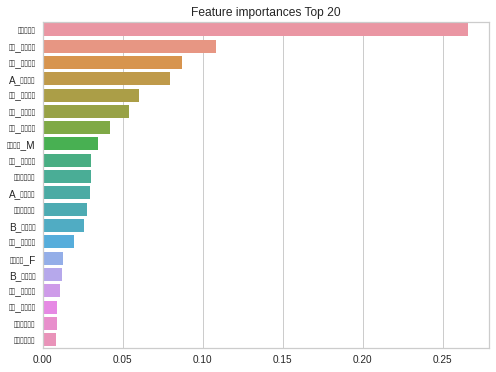

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show() 

## decicion tree 그림

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(max_depth=10)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_val)
acc = accuracy_score(y_val, pred)
print("결정 트리 예측 정확도: {0:.4f}".format(acc))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print("DecisionTreeClassifier 기본 하이퍼 파라미터:\n", dt_clf.get_params())

결정 트리 예측 정확도: 0.6585
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [ ]:
pip install Graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
targets_name = ['증가' , '감소']

In [ ]:
# export_graphviz()의 결과로 out_file로 지정된 tree.dot 파일을 생성
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file="tree.dot", feature_names=features.columns, impurity=True, filled=True)

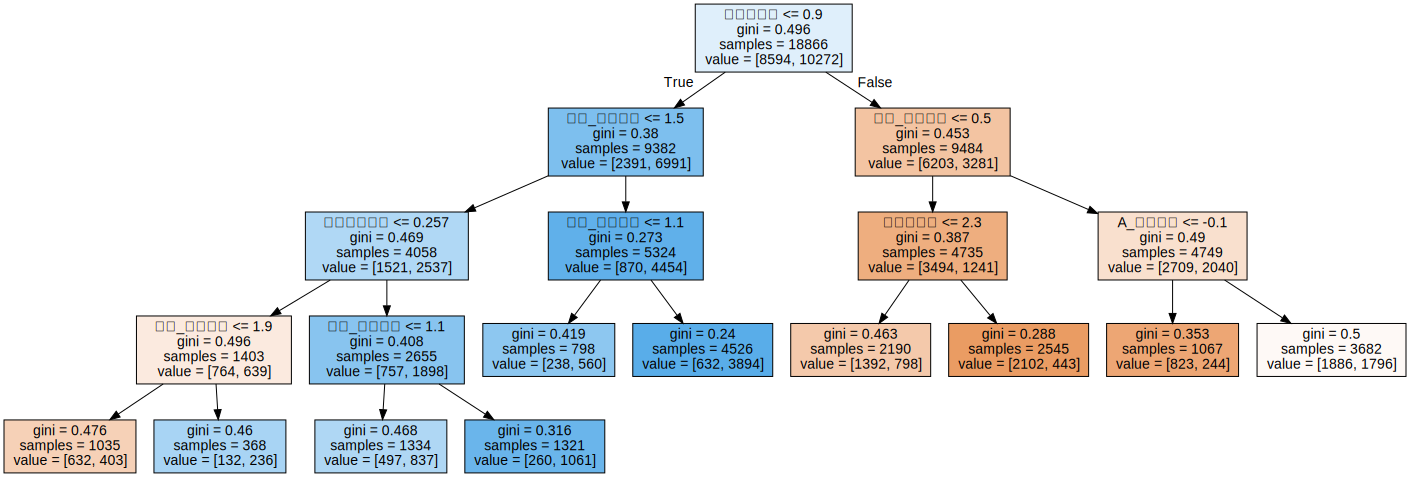

In [ ]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
dt_clf = DecisionTreeClassifier(min_samples_leaf= 10,
                                min_samples_split=6,
                                max_features=10,
                                max_depth=10,
                                max_leaf_nodes=10)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_val)
acc = accuracy_score(y_val, pred)
print("결정 트리 예측 정확도: {0:.4f}".format(acc))

결정 트리 예측 정확도: 0.6649


In [ ]:
# export_graphviz()의 결과로 out_file로 지정된 tree.dot 파일을 생성
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file="tree.dot",\
                feature_names=features.columns, impurity=True, filled=True)

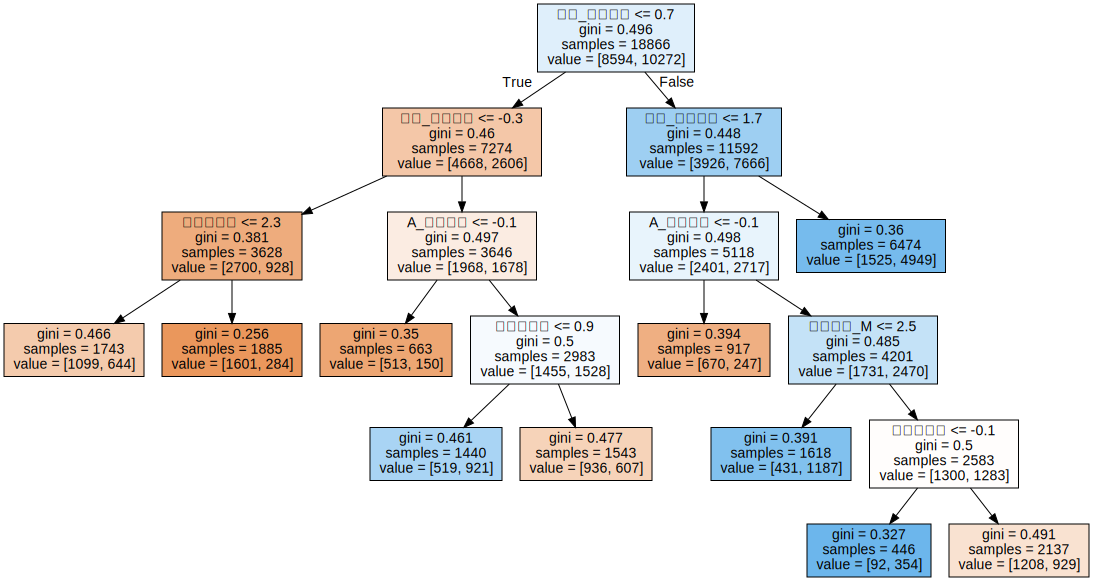

In [ ]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
dt_clf.feature_importances_ 

array([5.84875402e-04, 6.30309701e-03, 4.28309137e-03, 0.00000000e+00,
       7.93549151e-04, 3.50925241e-04, 6.00839493e-03, 1.69279967e-02,
       7.18711765e-02, 4.64525707e-01, 8.79692765e-03, 1.40070735e-02,
       1.18336050e-02, 1.71819966e-03, 5.92475077e-02, 1.72168068e-02,
       1.53786089e-02, 4.20095026e-03, 2.33045599e-02, 1.93543603e-02,
       1.77282721e-02, 2.06624968e-02, 2.19860552e-02, 1.86060101e-02,
       1.34473487e-02, 1.59379733e-02, 4.70987450e-02, 1.00926526e-02,
       1.18517172e-02, 1.97706803e-02, 1.56353641e-02, 1.69873795e-02,
       1.18235614e-02, 1.16643310e-02])

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

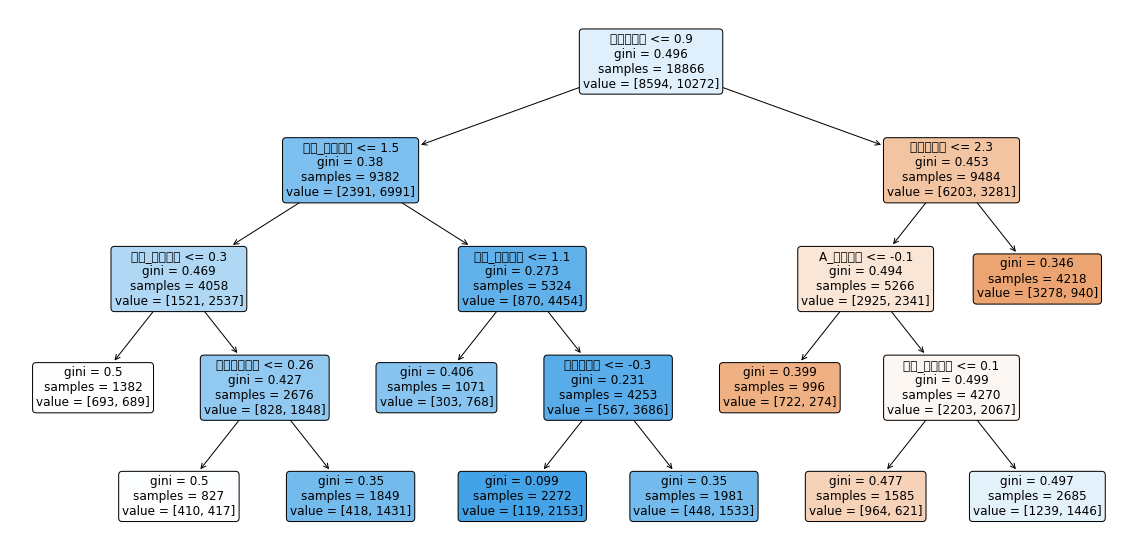

In [ ]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dt_clf = DecisionTreeClassifier(min_samples_leaf= 10,
                                min_samples_split=6,
                                max_features=10,
                                max_depth=10,
                                max_leaf_nodes=10)
dt_clf.fit(X_train,y_train)
w_preds = dt_clf.predict(X_test)
w_preds_proba = dt_clf.predict_proba(X_test)[:,1]
plt.figure(figsize=(20,10))
tree.plot_tree(dt_clf, filled=True,
              feature_names=X_train.columns,             
              rounded=True, fontsize=12)
plt.show()
plt.close()

### XGB

In [ ]:
# early_stopping_round 추가
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_train, y_train), (X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, 
                early_stopping_rounds=50, 
                eval_metric="logloss", 
                eval_set=evals, 
                verbose=False) 

XGBClassifier(learning_rate=0.05, n_estimators=400)

In [ ]:
ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws50_preds, ws50_pred_proba) 

오차 행렬
[[3402 1894]
 [1047 3090]]
정확도: 0.6882, 정밀도: 0.6200, 재현율: 0.7469,    F1: 0.6776, AUC:0.7761


### LGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
lgbm_clf = LGBMClassifier(n_estimators=100)

eval_set=[(X_train, y_train), (X_val, y_val)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.820752	training's binary_logloss: 0.65972	valid_1's auc: 0.764445	valid_1's binary_logloss: 0.687138
[2]	training's auc: 0.82436	training's binary_logloss: 0.635557	valid_1's auc: 0.772284	valid_1's binary_logloss: 0.667742
[3]	training's auc: 0.829874	training's binary_logloss: 0.615072	valid_1's auc: 0.773716	valid_1's binary_logloss: 0.652613
[4]	training's auc: 0.832343	training's binary_logloss: 0.597848	valid_1's auc: 0.775644	valid_1's binary_logloss: 0.640142
[5]	training's auc: 0.833878	training's binary_logloss: 0.583185	valid_1's auc: 0.776651	valid_1's binary_logloss: 0.629863
[6]	training's auc: 0.835905	training's binary_logloss: 0.570586	valid_1's auc: 0.777996	valid_1's binary_logloss: 0.621399
[7]	training's auc: 0.837258	training's binary_logloss: 0.559812	valid_1's auc: 0.778197	valid_1's binary_logloss: 0.614919
[8]	training's auc: 0.838864	training's binary_logloss: 0.550244	valid_1's auc: 0.779499	valid_1's binary_logloss: 0.609076
[9]	traini

###  HyperOpt


In [ ]:
pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   } 

In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK} 

In [ ]:
xgb_clf = XGBClassifier(n_estimators=400, max_depth=20,
                        min_child_weight=3,
                        learning_rate=0.126,
                        colsample_bytree=0.54
                       )
xgb_clf.fit(X_train, y_train)
pred = xgb_clf.predict(X_test)
accuracy_score(y_test, pred)

0.6905544365525284

In [ ]:
# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_val, y_val)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {np.round(xgb_roc_score, 4)}')

In [ ]:
preds = xgb_clf.predict(X_test)
accuracy_score(y_test, preds)

0.6886462419166755

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=100)

eval_set=[(X_train, y_train), (X_val, y_val)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.820752	training's binary_logloss: 0.65972	valid_1's auc: 0.764445	valid_1's binary_logloss: 0.687138
[2]	training's auc: 0.82436	training's binary_logloss: 0.635557	valid_1's auc: 0.772284	valid_1's binary_logloss: 0.667742
[3]	training's auc: 0.829874	training's binary_logloss: 0.615072	valid_1's auc: 0.773716	valid_1's binary_logloss: 0.652613
[4]	training's auc: 0.832343	training's binary_logloss: 0.597848	valid_1's auc: 0.775644	valid_1's binary_logloss: 0.640142
[5]	training's auc: 0.833878	training's binary_logloss: 0.583185	valid_1's auc: 0.776651	valid_1's binary_logloss: 0.629863
[6]	training's auc: 0.835905	training's binary_logloss: 0.570586	valid_1's auc: 0.777996	valid_1's binary_logloss: 0.621399
[7]	training's auc: 0.837258	training's binary_logloss: 0.559812	valid_1's auc: 0.778197	valid_1's binary_logloss: 0.614919
[8]	training's auc: 0.838864	training's binary_logloss: 0.550244	valid_1's auc: 0.779499	valid_1's binary_logloss: 0.609076
[9]	traini

In [ ]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [ ]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [ ]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [ ]:
from lightgbm import LGBMClassifier

evals = [(X_test, y_test)]
lgb_wrapper = LGBMClassifier(n_estimators=10)

# 조기중단 수행
lgb_wrapper.fit(X_train,y_train, early_stopping_rounds=10,eval_set=evals, \
                eval_metric='logloss',verbose=True)
w_preds = lgb_wrapper.predict(X_test)
w_preds_proba = lgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)
w_preds = lgbm_clf.predict(X_test)
w_preds_proba = lgbm_clf.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC AUC는 pred 대신 pred_proba
    roc_score=roc_auc_score(y_test,pred_proba) # pred_proba

    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, \
    f1 score:{3:.4f}, ROC AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_score))
get_clf_eval(y_test, w_preds, w_preds_proba)

오차행렬
[[3166 2196]
 [1063 3008]]
정확도:0.6545, 정밀도:0.5780, 재현율:0.7389,     f1 score:0.6486, ROC AUC:0.7215


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 3, 4, 5, 10, 20, 30],  
         'min_samples_split': [1, 2, 3, 4, 5, 6, 10]}

grid_dtree = GridSearchCV(dt_clf, param_grid= params, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)   

print('GCV 최적 하이퍼 파라미터:', grid_dtree.best_params_)   # 최적의 파라미터
print('GCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_)) 

# esitimator = grid_dtree.best_estimator_ 
best_dtree = grid_dtree.best_estimator_  # 베스트 params가 적용된 estimator

dtpred = grid_dtree.predict(X_test)
accuracy = accuracy_score(y_test, dtpred) # 실제데이터와 비교 (정확도 확인)
print('DT 정확도:{0:.4f}'.format(accuracy)) 

GCV 최적 하이퍼 파라미터: {'max_depth': 10, 'min_samples_split': 3}
GCV 최고 정확도:0.7179
DT 정확도:0.5939


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=3)
dt_clf.fit(X_train, y_train)
w_preds = dt_clf.predict(X_test)
w_preds_proba = dt_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, w_preds, w_preds_proba)

오차행렬
[[3147 2215]
 [1047 3024]]
정확도:0.6542, 정밀도:0.5772, 재현율:0.7428,     f1 score:0.6496, ROC AUC:0.7192


## 상관관계 확인

비대칭도가 1 이상인 피처만 로그 변환

In [ ]:
from scipy.stats import skew

# 숫자형 피처 컬럼 index 
features_index = features.dtypes[features.dtypes != 'category'].index

# 피처(열)별로 왜곡도 산출
skew_features = features[features_index].apply(lambda x : skew(x), axis=0)

# 왜곡도가 1 이상
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

주거구매비중    5.045125
D_구매지수    4.422215
취미구매비중    3.686780
D_방문지수    3.514989
경쟁사이용     1.585362
C_구매지수    1.276294
패션구매비중    1.239280
B_구매지수    1.196808
B_방문지수    1.108920
거주지역      1.017620
dtype: float64


In [ ]:
# 피처 로그 변환
features[skew_features_top.index] = np.log1p(features[skew_features_top.index])

In [ ]:
features.corr()

,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,총구매지수,...,취미구매비중,주거구매비중,식품_구매지수,패션_구매지수,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수
성별,1.000000,-0.029738,0.044307,0.002938,-0.012955,0.034641,0.016423,-0.005487,0.009430,-0.002918,...,-0.053838,0.014464,0.003592,0.006016,-0.010098,0.012191,-0.009748,0.018669,-0.000482,0.008734
거주지역,-0.029738,1.000000,-0.099575,0.005065,-0.019461,0.022397,0.000325,-0.016768,-0.014316,0.006514,...,0.074212,0.007337,-0.004369,-0.005948,-0.001052,0.004588,-0.017851,-0.016367,0.007404,0.016462
연령대,0.044307,-0.099575,1.000000,-0.199531,-0.011554,-0.169031,0.020899,0.044911,0.092815,-0.003761,...,-0.207376,0.102678,0.001247,-0.011146,-0.000808,0.028772,-0.037273,-0.013284,-0.031328,0.014666
멤버십유무,0.002938,0.005065,-0.199531,1.000000,-0.005106,0.181254,-0.000074,-0.092370,-0.069788,0.004837,...,0.090246,-0.015236,-0.011801,0.028737,-0.006104,-0.002108,0.022081,0.035132,0.003074,0.024679
경쟁사이용,-0.012955,-0.019461,-0.011554,-0.005106,1.000000,-0.018903,-0.065067,0.037620,0.177844,0.004369,...,0.063718,0.027805,0.031160,0.039179,0.039590,0.057325,-0.002485,0.044440,0.033713,0.000962
온라인유무,0.034641,0.022397,-0.169031,0.181254,-0.018903,1.000000,0.024732,-0.129120,-0.046883,0.009869,...,0.097746,-0.011750,-0.028404,0.046924,-0.018384,0.002563,0.013348,0.055117,0.005419,0.032945
Recency_R,0.016423,0.000325,0.020899,-0.000074,-0.065067,0.024732,1.000000,0.130578,-0.213619,-0.068677,...,-0.129928,-0.037305,0.057384,-0.000733,-0.022320,-0.043395,0.157701,0.007089,0.011817,0.045751
구매횟수_F,-0.005487,-0.016768,0.044911,-0.092370,0.037620,-0.129120,0.130578,1.000000,0.267040,0.016543,...,-0.054231,0.005407,-0.067339,-0.069388,-0.001828,-0.010185,-0.079965,-0.104615,-0.014663,-0.012678
구매금액_M,0.009430,-0.014316,0.092815,-0.069788,0.177844,-0.046883,-0.213619,0.267040,1.000000,-0.025380,...,0.189885,0.168043,0.101619,0.070052,0.163397,0.206341,-0.075898,0.066045,0.109980,0.051359
총구매지수,-0.002918,0.006514,-0.003761,0.004837,0.004369,0.009869,-0.068677,0.016543,-0.025380,1.000000,...,0.008508,0.013202,-0.482900,-0.341590,-0.188306,-0.213020,-0.422449,-0.336900,-0.206021,-0.235722


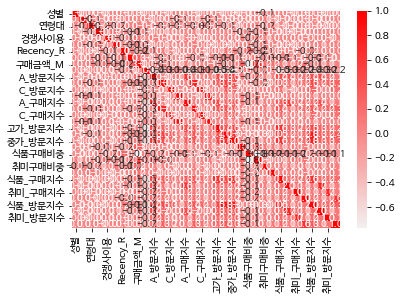

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 피처 상관관계
# corr = X_features.corr()
corr = features.corr()

sns.heatmap(corr, 
            cmap = sns.light_palette("red", as_cmap=True), 
            annot=True, 
            fmt='.1f')

plt.show()

In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
x_data = X

x_data1 = sm.add_constant(x_data, has_constant = "add")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data1.values, i) for i in range(x_data1.shape[1])]
vif["features"] = x_data1.columns
vif.sort_values(ascending=False, by='VIF Factor')

MissingDataError: ignored

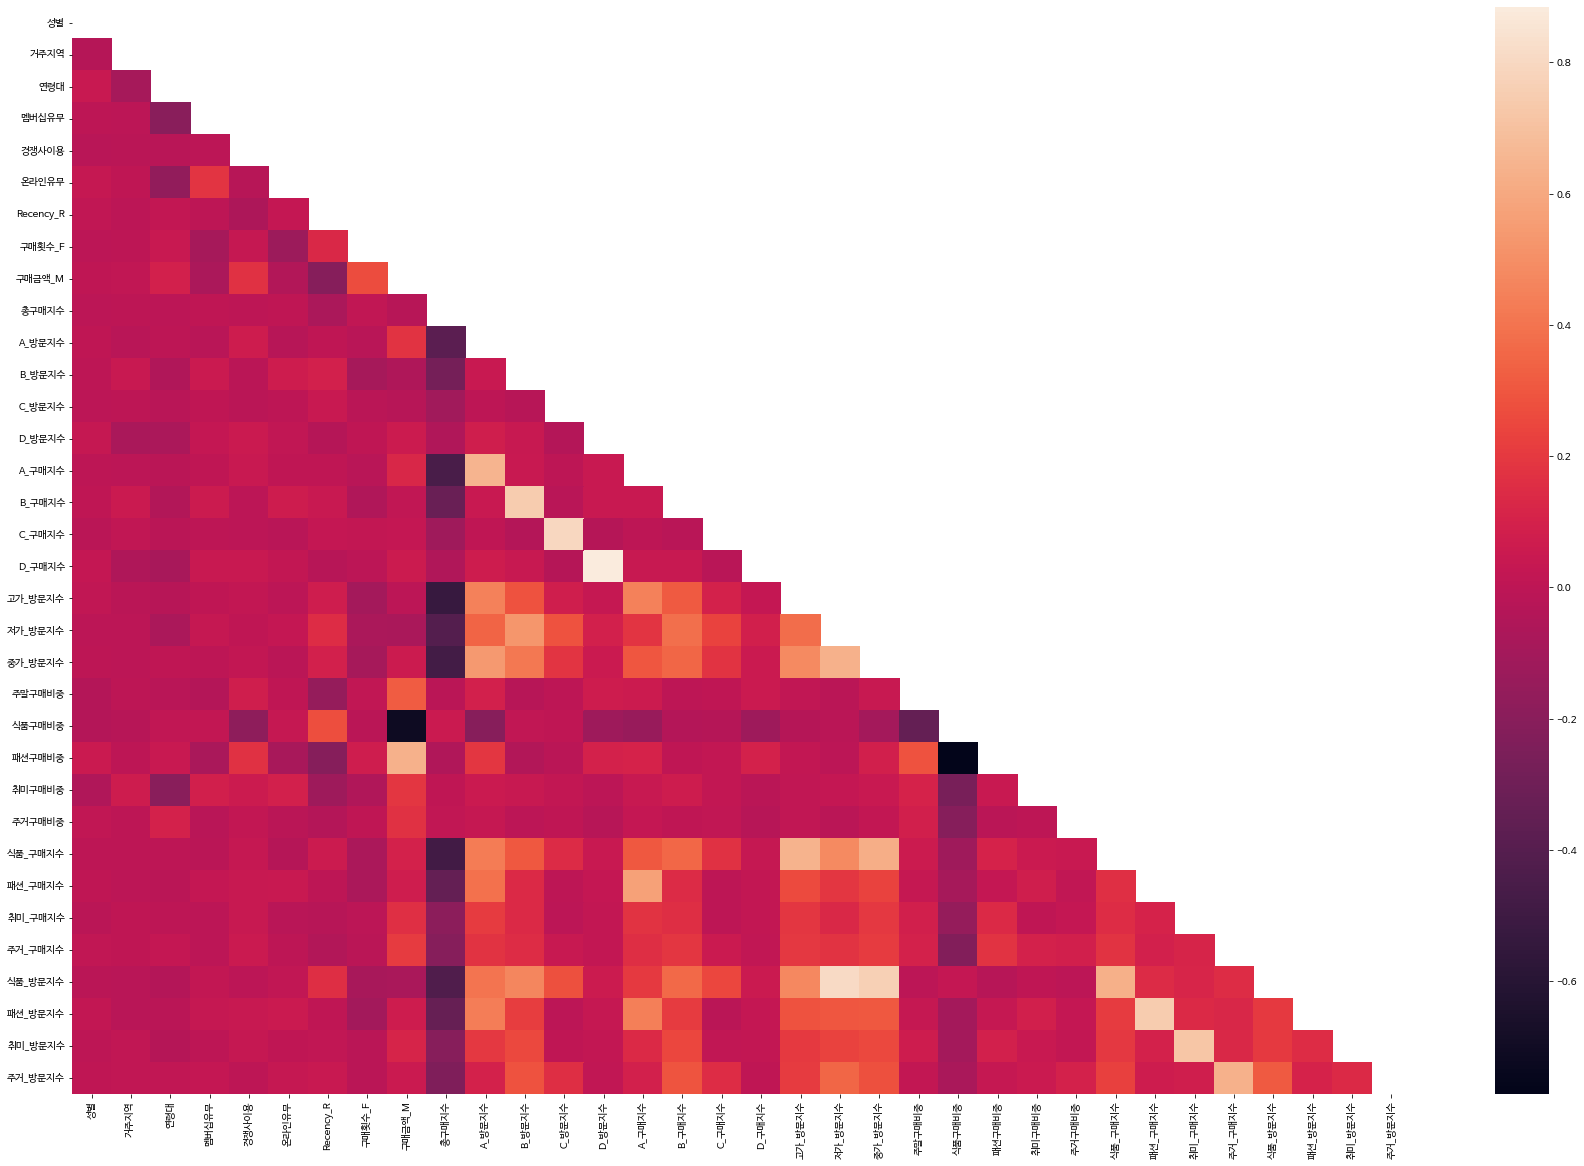

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

corr = features.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
plt.figure(figsize=(30,20))
sns.heatmap(corr, mask=mask, annot=False)

In [ ]:
feature2 = features.drop(columns=['식품_방문지수', 'D_방문지수', 'D_구매지수', '식품구매비중'], axis=1)
feature2

,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,총구매지수,...,패션구매비중,취미구매비중,주거구매비중,식품_구매지수,패션_구매지수,취미_구매지수,주거_구매지수,패션_방문지수,취미_방문지수,주거_방문지수
고객번호,,,,,,,,,,,,,,,,,,,,,
1,0,1,6,0,3,0,1,5,5,1.0,...,0.379806,0.010177,0.083182,0.0,1.4,4.2,1.8,1.4,1.6,2.6
2,0,2,6,0,3,0,1,5,5,1.4,...,0.169182,0.021948,0.084830,-3.0,-0.2,0.8,0.0,2.6,2.4,-2.2
3,0,1,6,0,0,0,2,3,1,0.0,...,0.032180,0.000000,0.014356,0.4,0.8,0.0,0.8,0.4,0.0,1.2
4,1,1,6,0,2,0,4,2,3,0.6,...,0.258539,0.001814,0.076637,3.0,4.4,1.2,10.2,3.2,1.2,4.4
6,1,4,6,0,0,0,4,5,4,-0.2,...,0.111862,0.004740,0.191566,-1.8,3.4,0.2,0.8,6.6,1.8,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,1,0,2,1,0,1,5,5,1,0.4,...,0.010845,0.018486,0.000817,2.0,-0.6,-2.4,0.0,-0.6,-4.2,1.2
19334,0,7,3,1,3,0,1,4,3,3.0,...,0.015557,0.015574,0.044860,1.2,1.4,4.6,4.2,2.0,5.8,4.8
19335,1,14,3,1,0,0,2,3,3,-2.2,...,0.056053,0.062581,0.024764,5.2,4.4,0.8,2.2,5.0,1.8,0.8


In [ ]:
test_set2 = test_set.drop(columns=['식품_방문지수', 'D_방문지수', 'D_구매지수', '식품구매비중'], axis=1)
X_test = test_set2.iloc[ : ,  : -1]
y_test = test_set2.iloc[ : , -1]
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=100)

params = {'num_leaves': [32,64,128],
          'min_child_samples' : [64,128,256],
          'max_depth':[4,8,16,32,64]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(feature2, y_train)
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

GridSearchCV 최적 파라미터: {'max_depth': 4, 'min_child_samples': 128, 'num_leaves': 32}


In [ ]:
#최적 파라미터 max_depth:16, min_child_samples: 128 num_leaves : 64 튜닝 후
lgb_wrapper = LGBMClassifier(n_estimators=100,max_depth=4,min_child_samples=128,num_leaves=32)
evals = [(X_test, y_test)]

# 조기중단 수행
lgb_wrapper.fit(feature2, 
                y_train, early_stopping_rounds=10,eval_set=evals, \
                eval_metric='acc',verbose=True)
w_preds = lgb_wrapper.predict(X_test)
w_preds_proba = lgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_preds_proba)

[1]	valid_0's binary_logloss: 0.68722
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.669093
[3]	valid_0's binary_logloss: 0.654049
[4]	valid_0's binary_logloss: 0.641817
[5]	valid_0's binary_logloss: 0.631533
[6]	valid_0's binary_logloss: 0.622995
[7]	valid_0's binary_logloss: 0.615496
[8]	valid_0's binary_logloss: 0.609695
[9]	valid_0's binary_logloss: 0.605066
[10]	valid_0's binary_logloss: 0.600873
[11]	valid_0's binary_logloss: 0.597807
[12]	valid_0's binary_logloss: 0.594444
[13]	valid_0's binary_logloss: 0.592512
[14]	valid_0's binary_logloss: 0.590356
[15]	valid_0's binary_logloss: 0.588567
[16]	valid_0's binary_logloss: 0.587008
[17]	valid_0's binary_logloss: 0.585466
[18]	valid_0's binary_logloss: 0.58479
[19]	valid_0's binary_logloss: 0.58399
[20]	valid_0's binary_logloss: 0.58394
[21]	valid_0's binary_logloss: 0.583597
[22]	valid_0's binary_logloss: 0.583946
[23]	valid_0's binary_logloss: 0.584083
[24]	valid_0's binary_logloss: 

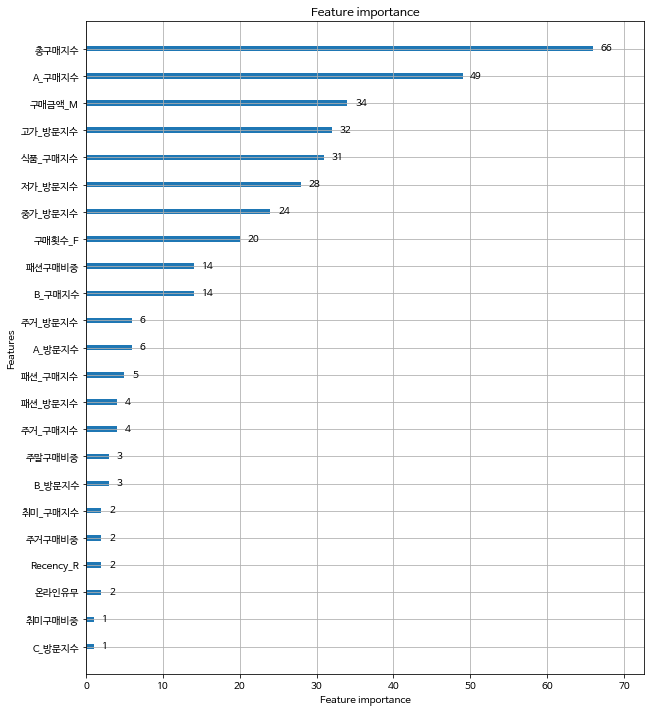

In [ ]:
#Feature_importance 출력
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize = (10,12))
plot_importance(lgb_wrapper, ax=ax)

In [ ]:
feature3 = features[['총구매지수', 'A_구매지수', '고가_방문지수', '식품_구매지수', '저가_방문지수', '중가_방문지수', 
                     '패션구매비중', 'B_구매지수', '주거_방문지수', 'A_방문지수', '패션_구매지수', '패션_방문지수', '주거_구매지수', '주말구매비중', 'B_방문지수',
                     '취미_구매지수',]]
feature3

,총구매지수,A_구매지수,고가_방문지수,식품_구매지수,저가_방문지수,중가_방문지수,패션구매비중,B_구매지수,주거_방문지수,A_방문지수,패션_구매지수,패션_방문지수,주거_구매지수,주말구매비중,B_방문지수,취미_구매지수
고객번호,,,,,,,,,,,,,,,,
1,1.0,0.4,-0.2,0.0,0.6,1.6,0.379806,1.2,2.6,-0.2,1.4,1.4,1.8,0.283251,0.8,4.2
2,1.4,0.6,-0.6,-3.0,-0.2,-3.0,0.169182,0.4,-2.2,-0.6,-0.2,2.6,0.0,0.351225,0.4,0.8
3,0.0,0.4,-0.2,0.4,1.4,0.2,0.032180,0.0,1.2,0.0,0.8,0.4,0.8,0.154793,0.4,0.0
4,0.6,0.8,4.0,3.0,2.6,3.2,0.258539,3.4,4.4,2.0,4.4,3.2,10.2,0.213483,3.8,1.2
6,-0.2,1.4,0.6,-1.8,0.2,-1.2,0.111862,-0.8,4.0,0.4,3.4,6.6,0.8,0.164330,-0.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0.4,-0.2,1.2,2.0,-0.8,0.4,0.010845,-0.2,1.2,-1.2,-0.6,-0.6,0.0,0.352512,0.6,-2.4
19334,3.0,0.0,5.4,1.2,4.0,1.6,0.015557,1.0,4.8,0.0,1.4,2.0,4.2,0.254207,1.6,4.6
19335,-2.2,3.0,2.8,5.2,6.8,4.6,0.056053,3.4,0.8,2.0,4.4,5.0,2.2,0.255032,5.0,0.8


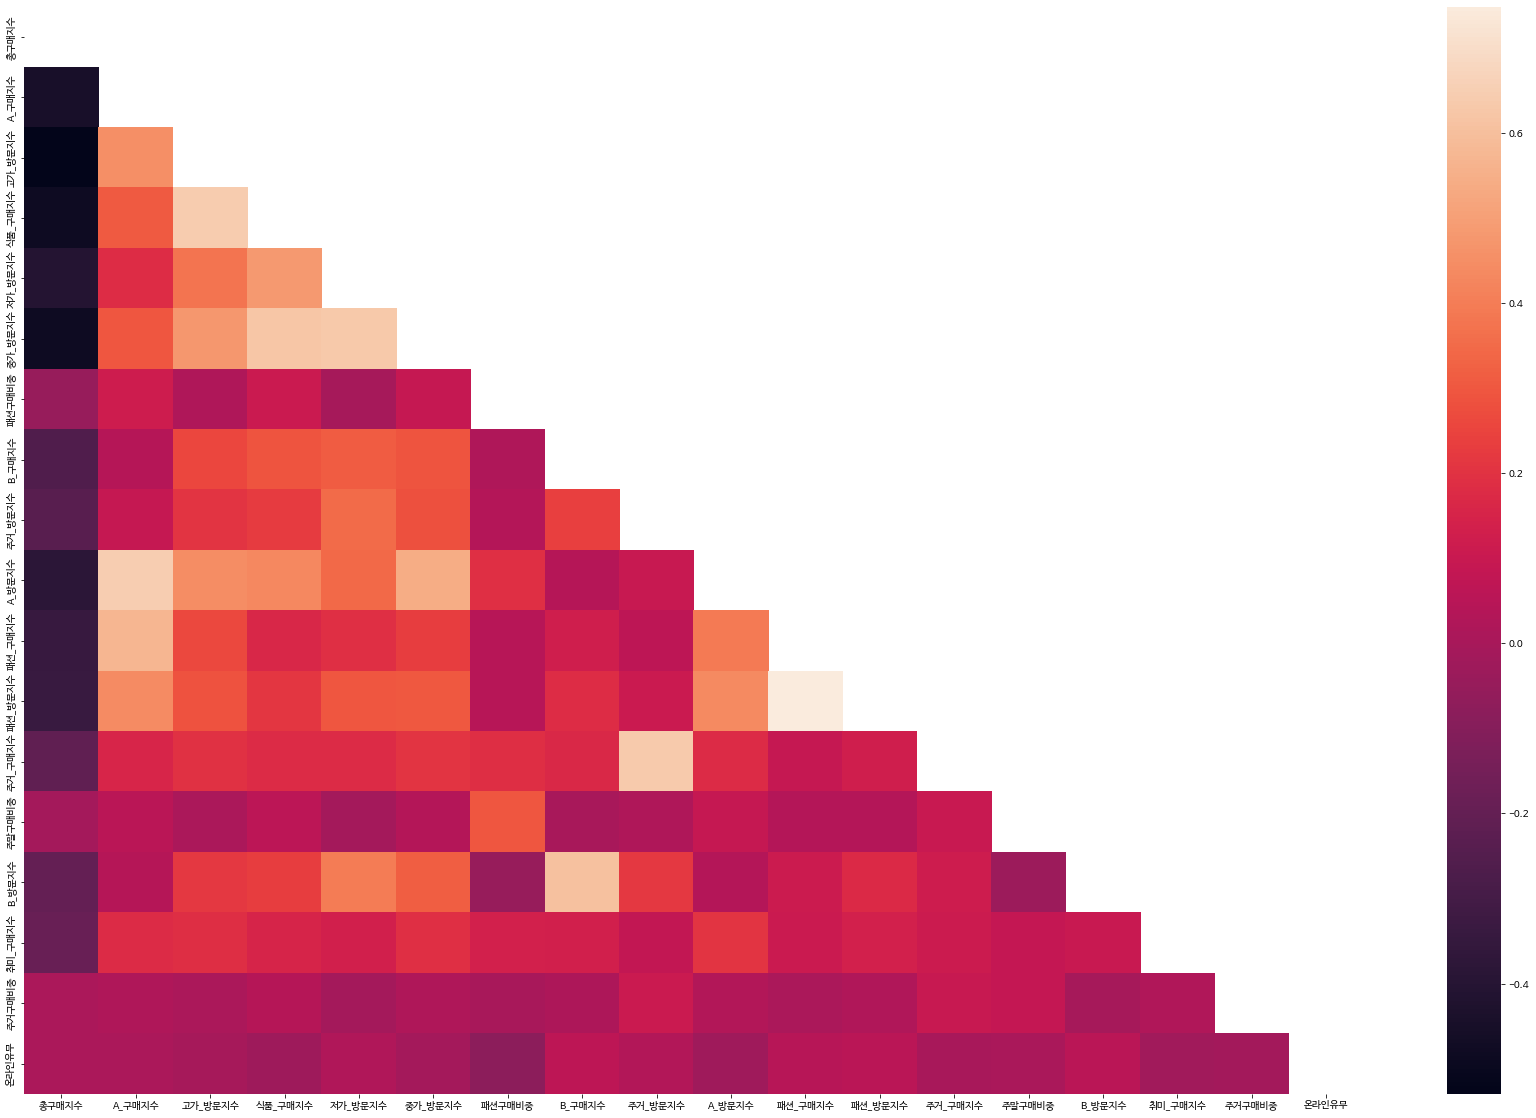

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

corr = feature3.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
plt.figure(figsize=(30,20))
sns.heatmap(corr, mask=mask, annot=False)

In [ ]:
test_set3 = test_set[['총구매지수', 'A_구매지수',  '고가_방문지수', '식품_구매지수', '저가_방문지수', '중가_방문지수', 
                     '패션구매비중', 'B_구매지수', '주거_방문지수', 'A_방문지수', '패션_구매지수', '패션_방문지수', '주거_구매지수', '주말구매비중', 'B_방문지수',
                     '취미_구매지수', 'target']]
X_test = test_set3.iloc[ : ,  : -1]
y_test = test_set3.iloc[ : , -1]
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=100)

params = {'num_leaves': [32,64,128],
          'min_child_samples' : [64,128,256],
          'max_depth':[4,8,16,32,64]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(feature3, y_train)
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

KeyboardInterrupt: ignored

In [ ]:
#최적 파라미터 적용
lgb_wrapper = LGBMClassifier(n_estimators=100, max_depth=4, min_child_samples=256, num_leaves=32)
evals = [(X_test, y_test)]

# 조기중단 수행
lgb_wrapper.fit(feature3, 
                y_train, early_stopping_rounds=10, eval_set=evals, \
                eval_metric='acc',verbose=True)
w_preds = lgb_wrapper.predict(X_test)
w_preds_proba = lgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_preds_proba)

[1]	valid_0's binary_logloss: 0.686679
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.668514
[3]	valid_0's binary_logloss: 0.653871
[4]	valid_0's binary_logloss: 0.641164
[5]	valid_0's binary_logloss: 0.630488
[6]	valid_0's binary_logloss: 0.622065
[7]	valid_0's binary_logloss: 0.6156
[8]	valid_0's binary_logloss: 0.609632
[9]	valid_0's binary_logloss: 0.604481
[10]	valid_0's binary_logloss: 0.599801
[11]	valid_0's binary_logloss: 0.596452
[12]	valid_0's binary_logloss: 0.593461
[13]	valid_0's binary_logloss: 0.590581
[14]	valid_0's binary_logloss: 0.588842
[15]	valid_0's binary_logloss: 0.58746
[16]	valid_0's binary_logloss: 0.586222
[17]	valid_0's binary_logloss: 0.585197
[18]	valid_0's binary_logloss: 0.585064
[19]	valid_0's binary_logloss: 0.583897
[20]	valid_0's binary_logloss: 0.583764
[21]	valid_0's binary_logloss: 0.583834
[22]	valid_0's binary_logloss: 0.583756
[23]	valid_0's binary_logloss: 0.583594
[24]	valid_0's binary_logloss:

8분기 구매감소 예측 라벨로 예측되는 고객만 따로 군집화해서 특징 추출 -> 특징 몇개씩 파악해서 마케팅

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(max_depth=10)
dt_clf.fit(feature3, y_train)
pred = dt_clf.predict(X_val)
acc = accuracy_score(y_val, pred)
print("결정 트리 예측 정확도: {0:.4f}".format(acc))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print("DecisionTreeClassifier 기본 하이퍼 파라미터:\n", dt_clf.get_params())

결정 트리 예측 정확도: 0.6663
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
# 위에서 확인한 최적 파라미터를 이용해서 랜덤포레스트 학습
rf_clf1 = RandomForestClassifier(n_estimators=100,  min_samples_leaf=8, max_depth=8,
                                 min_samples_split=16)
rf_clf1.fit(feature3 , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.6848


In [ ]:
pred

array([0, 1, 1, ..., 0, 0, 1])

# 피처 중요도 높은 것만

1. 연평균 증가율 기준으로 라벨 설정한 데이터를 모델링하여 prediction1 도출 -> accuracy는 증가했으나 강사님이 공통된 변수가 들어가면 안 된다고 해서 변수 조정 필요
2. 변수가 많기 때문에 20개 이하로 축소하라고 하셨음
3. 여러 모델을 돌렸을 때 피처 중요도가 공통적으로 높은 피처를 설정
4. 피처 중요도로 파악한 변동변수 10개 + 속성변수(군집화 후 고객특성 파악을 위해) 6개 -> 16개 피처 설정하면 어떨까 합니다



'A_구매지수', '총구매지수', '식품구매비중', '패션구매비중', '주말구매비중', '저가_방문지수', '식품_구매지수', '중가_방문지수', '주거구매비중', 'B_구매지수', '고가_방문지수', '식품_방문지수'

'성별',	'거주지역',	'연령대', '멤버십유무', 	'경쟁사이용',	'온라인유무',	'Recency_R'	,'구매횟수_F',	'구매금액_M'




In [ ]:
train_set = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/new_train_set.csv').set_index('고객번호')
test_set = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/new_test_set.csv').set_index('고객번호')

In [ ]:
train_set.columns

Index(['성별', '거주지역', '연령대', '멤버십유무', '경쟁사이용', '온라인유무', 'Recency_R', '구매횟수_F',
       '구매금액_M', '총구매지수', 'A_방문지수', 'B_방문지수', 'C_방문지수', 'D_방문지수', 'A_구매지수',
       'B_구매지수', 'C_구매지수', 'D_구매지수', '고가_방문지수', '저가_방문지수', '중가_방문지수', '주말구매비중',
       '식품구매비중', '패션구매비중', '취미구매비중', '주거구매비중', '식품_구매지수', '패션_구매지수', '취미_구매지수',
       '주거_구매지수', '식품_방문지수', '패션_방문지수', '취미_방문지수', '주거_방문지수', 'target'],
      dtype='object')

In [ ]:
train_set = train_set[['A_구매지수', '총구매지수', '식품구매비중', '패션구매비중', '주말구매비중',
                      '저가_방문지수', '식품_구매지수', '중가_방문지수', '주거구매비중', 'B_구매지수', 
                      '고가_방문지수', '식품_방문지수', '성별', '거주지역', '연령대', '멤버십유무', '경쟁사이용', 
                      '온라인유무', 'Recency_R', '구매횟수_F', '구매금액_M', 'target']]
features = X_train = X = train_set.iloc[ : ,  : -1]
targets = y_train = y = train_set.iloc[ : , -1]
features

,A_구매지수,총구매지수,식품구매비중,패션구매비중,주말구매비중,저가_방문지수,식품_구매지수,중가_방문지수,주거구매비중,B_구매지수,...,식품_방문지수,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M
고객번호,,,,,,,,,,,,,,,,,,,,,
1,0.4,1.0,0.155665,0.379806,0.283251,0.6,0.0,1.6,0.083182,1.2,...,1.2,0,1,6,0,3,0,1,5,5
2,0.6,1.4,0.163732,0.169182,0.351225,-0.2,-3.0,-3.0,0.084830,0.4,...,-2.4,0,2,6,0,3,0,1,5,5
3,0.4,0.0,0.826279,0.032180,0.154793,1.4,0.4,0.2,0.014356,0.0,...,0.8,0,1,6,0,0,0,2,3,1
4,0.8,0.6,0.377934,0.258539,0.213483,2.6,3.0,3.2,0.076637,3.4,...,3.0,1,1,6,0,2,0,4,2,3
6,1.4,-0.2,0.350055,0.111862,0.164330,0.2,-1.8,-1.2,0.191566,-0.8,...,-0.4,1,4,6,0,0,0,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,-0.2,0.4,0.915767,0.010845,0.352512,-0.8,2.0,0.4,0.000817,-0.2,...,0.8,1,0,2,1,0,1,5,5,1
19334,0.0,3.0,0.786155,0.015557,0.254207,4.0,1.2,1.6,0.044860,1.0,...,2.4,0,7,3,1,3,0,1,4,3
19335,3.0,-2.2,0.429227,0.056053,0.255032,6.8,5.2,4.6,0.024764,3.4,...,4.6,1,14,3,1,0,0,2,3,3


In [ ]:
test_set = test_set[['A_구매지수', '총구매지수', '식품구매비중', '패션구매비중', '주말구매비중',
                      '저가_방문지수', '식품_구매지수', '중가_방문지수', '주거구매비중', 'B_구매지수', 
                      '고가_방문지수', '식품_방문지수', '성별', '거주지역', '연령대', '멤버십유무', '경쟁사이용', 
                      '온라인유무', 'Recency_R', '구매횟수_F', '구매금액_M', 'target']]
X_test = test_set.iloc[ : ,  : -1]
y_test = test_set.iloc[ : , -1]
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
X_test

,A_구매지수,총구매지수,식품구매비중,패션구매비중,주말구매비중,저가_방문지수,식품_구매지수,중가_방문지수,주거구매비중,B_구매지수,...,식품_방문지수,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M
고객번호,,,,,,,,,,,,,,,,,,,,,
10857,2.2,3.4,0.695406,0.184545,0.183872,1.8,5.4,4.2,0.032351,0.0,...,3.6,1,2,5,0,0,0,3,2,2
13175,1.8,0.2,0.834980,0.016459,0.295905,9.4,4.2,5.0,0.008687,0.0,...,9.0,1,13,4,1,1,1,3,2,1
17876,-1.8,5.4,0.549285,0.231497,0.186941,-1.2,-3.4,-4.0,0.004724,0.4,...,-2.4,1,1,4,0,0,0,3,1,3
12304,-2.0,4.0,0.521689,0.125874,0.392368,3.8,1.2,3.2,0.173949,0.4,...,3.4,1,2,4,1,0,1,3,2,1
12079,1.2,2.0,0.313061,0.283235,0.339605,3.2,1.6,5.0,0.060830,1.2,...,4.2,1,1,5,0,0,0,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10916,2.4,2.6,0.710667,0.067387,0.348117,1.8,0.2,-0.8,0.025755,2.6,...,0.4,1,15,4,0,0,0,3,3,1
5920,1.2,-0.4,0.792219,0.011404,0.293638,0.4,5.2,4.4,0.030235,3.4,...,3.0,1,9,4,0,1,0,2,1,2
9844,1.2,4.4,0.276734,0.296068,0.514841,1.8,5.0,3.4,0.005009,-1.2,...,4.8,1,2,3,1,3,0,3,1,3


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
lgbm_clf = LGBMClassifier(n_estimators=100)

eval_set=[(X_train, y_train), (X_val, y_val)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.820565	training's binary_logloss: 0.659738	valid_1's auc: 0.762666	valid_1's binary_logloss: 0.686074
[2]	training's auc: 0.824177	training's binary_logloss: 0.635598	valid_1's auc: 0.769273	valid_1's binary_logloss: 0.666817
[3]	training's auc: 0.829375	training's binary_logloss: 0.6152	valid_1's auc: 0.771947	valid_1's binary_logloss: 0.651906
[4]	training's auc: 0.832089	training's binary_logloss: 0.597949	valid_1's auc: 0.773814	valid_1's binary_logloss: 0.639641
[5]	training's auc: 0.83345	training's binary_logloss: 0.583313	valid_1's auc: 0.774161	valid_1's binary_logloss: 0.629743
[6]	training's auc: 0.835231	training's binary_logloss: 0.570769	valid_1's auc: 0.775292	valid_1's binary_logloss: 0.621582
[7]	training's auc: 0.836578	training's binary_logloss: 0.560064	valid_1's auc: 0.775757	valid_1's binary_logloss: 0.615039
[8]	training's auc: 0.838008	training's binary_logloss: 0.550566	valid_1's auc: 0.776535	valid_1's binary_logloss: 0.609489
[9]	trainin

In [ ]:
preds = lgbm_clf.predict(X_test)
accuracy_score(y_test, preds)

0.6905544365525284

# 연평균 성장률 추가

In [ ]:
import pandas as pd
total=pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/total_final.csv', index_col=0)

In [ ]:
train_set = train_set[['A_구매지수', '총구매지수', '식품구매비중', '패션구매비중', '주말구매비중',
                      '저가_방문지수', '식품_구매지수', '중가_방문지수', '주거구매비중', 'B_구매지수', 
                      '고가_방문지수', '식품_방문지수', '성별', '거주지역', '연령대', '멤버십유무', '경쟁사이용', 
                      '온라인유무', 'Recency_R', '구매횟수_F', '구매금액_M', 'target']]

In [ ]:
test_set = test_set[['A_구매지수', '총구매지수', '식품구매비중', '패션구매비중', '주말구매비중',
                      '저가_방문지수', '식품_구매지수', '중가_방문지수', '주거구매비중', 'B_구매지수', 
                      '고가_방문지수', '식품_방문지수', '성별', '거주지역', '연령대', '멤버십유무', '경쟁사이용', 
                      '온라인유무', 'Recency_R', '구매횟수_F', '구매금액_M', 'target']]

In [ ]:
df2 = total.groupby(['고객번호','분기'])[['구매금액']].sum().reset_index()
df3=df2.pivot('고객번호','분기','구매금액')
df3=df3.reset_index()
df4=df3[df3.isna( ).any(axis=1)]
cus_list=df4.고객번호.unique()
cus_list=cus_list.tolist()
df3=df3[~df3['고객번호'].isin(cus_list)]

In [ ]:
df3

분기,고객번호,1,2,3,4,5,6,7,8
0,1,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0
1,2,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0
2,3,302782.0,548433.0,648188.0,394366.0,279310.0,312970.0,421017.0,258101.0
3,4,1309643.0,3732463.0,2434410.0,1823100.0,1737292.0,1919645.0,2127112.0,1610145.0
5,6,2166006.0,3115284.0,3163273.0,2950816.0,3619234.0,2769821.0,3518094.0,3203889.0
...,...,...,...,...,...,...,...,...,...
19332,19333,613130.0,913988.0,578210.0,455450.0,850690.0,553590.0,252010.0,520430.0
19333,19334,834049.0,2705917.0,2575628.0,2819868.0,1699930.0,767309.0,484920.0,465910.0
19334,19335,937734.0,2783122.0,2320105.0,2042511.0,2199423.0,2852695.0,1553645.0,2011244.0
19335,19336,449600.0,3321870.0,3160370.0,5886390.0,2896520.0,3625250.0,6322150.0,4948690.0


In [ ]:
a_7=df3[7].sum()
a_1=df3[1].sum()

year=(((a_7/a_1)**(1/6))-1)*100
year

0.10581232193580536

In [ ]:
import numpy as np

df3['연평균성장률']=(((df3[7]/df3[1])**(1/6))-1)*100
df3['target']=np.where(df3['연평균성장률']>year,1,0)
df4=df3[['고객번호','target','연평균성장률']]

#train_set.drop('target', axis=1, inplace=True)
train_set_2 = pd.merge(train_set, df4)
train_set_2

In [ ]:
train_set_2[train_set_2['target'] == 0]

NameError: ignored

In [ ]:
# test
df3['연평균성장률']=(((df3[8]/df3[1])**(1/7))-1)*100
df5=df3.copy()
df5['target']=np.where(df5['연평균성장률']>year,1,0)
df6=df5[['고객번호','target','연평균성장률']]
df6

#test_set.drop('target',axis=1,inplace=True)
test_set_2=pd.merge(test_set,df6)

In [ ]:
year

3.2417776700593093

In [ ]:
test_set_2[test_set_2['target'] == 0]

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,식품_구매지수,패션_구매지수,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률
0,1,0,1,6,0,3,0,1,5,5,...,-2.4,0.8,0.0,-3.6,0.6,1.4,0.4,0.2,0,-7.502160
1,2,0,2,6,0,3,0,2,4,5,...,-1.0,2.8,6.8,0.0,-2.4,4.6,6.4,3.8,0,-2.299292
2,3,0,1,6,0,0,0,1,2,1,...,0.4,0.8,0.0,1.8,0.8,0.4,0.0,4.2,0,-2.255071
3,4,1,1,6,0,2,0,4,3,3,...,2.4,3.2,4.2,11.2,4.0,3.2,5.2,7.4,0,2.994968
8,10,1,1,6,0,0,0,3,5,3,...,-0.6,2.6,2.2,1.2,0.0,4.6,4.2,-1.8,0,-5.188924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18854,19325,1,12,4,0,0,0,2,3,3,...,0.0,4.0,5.8,-1.8,2.8,4.6,4.4,1.8,0,-20.746720
18855,19327,0,1,5,1,0,0,1,5,1,...,0.8,0.0,-0.8,2.2,-2.2,0.0,2.4,4.2,0,-24.611422
18860,19332,1,13,3,0,0,0,4,5,3,...,3.4,0.0,1.6,6.2,0.6,0.0,3.2,4.4,0,-7.649983
18861,19333,1,0,2,1,0,1,2,4,1,...,1.4,-0.6,-2.4,0.0,-1.0,-0.6,-4.2,1.2,0,-2.314531


In [ ]:
features = X_train = X = train_set_2.iloc[ : ,  : -2]
targets = y_train = y = train_set_2.iloc[ : , -2:-1]

In [ ]:
targets

,target
0,0
1,0
2,1
3,1
4,1
...,...
18861,0
18862,0
18863,1
18864,1


In [ ]:
from sklearn.model_selection import train_test_split
X_test = test_set_2.iloc[ : ,  : -2]
y_test = test_set_2.iloc[ : , -2:-1]
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
lgbm_clf = LGBMClassifier(n_estimators=100)

eval_set=[(X_train, y_train), (X_val, y_val)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.821301	training's binary_logloss: 0.659193	valid_1's auc: 0.770875	valid_1's binary_logloss: 0.686688
Training until validation scores don't improve for 100 rounds.
[2]	training's auc: 0.824561	training's binary_logloss: 0.635041	valid_1's auc: 0.777043	valid_1's binary_logloss: 0.667175
[3]	training's auc: 0.828996	training's binary_logloss: 0.61464	valid_1's auc: 0.778918	valid_1's binary_logloss: 0.651271
[4]	training's auc: 0.831895	training's binary_logloss: 0.597606	valid_1's auc: 0.780358	valid_1's binary_logloss: 0.638865
[5]	training's auc: 0.833692	training's binary_logloss: 0.582945	valid_1's auc: 0.781486	valid_1's binary_logloss: 0.628248
[6]	training's auc: 0.835963	training's binary_logloss: 0.570275	valid_1's auc: 0.78237	valid_1's binary_logloss: 0.619693
[7]	training's auc: 0.836956	training's binary_logloss: 0.559533	valid_1's auc: 0.782934	valid_1's binary_logloss: 0.612784
[8]	training's auc: 0.838519	training's binary_logloss: 0.549935	valid_

In [ ]:
preds = lgbm_clf.predict(X_test)
accuracy_score(y_test, preds)

0.6791052687374112

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(max_depth=10)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_val)
acc = accuracy_score(y_val, pred)
print("결정 트리 예측 정확도: {0:.4f}".format(acc))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print("DecisionTreeClassifier 기본 하이퍼 파라미터:\n", dt_clf.get_params())

결정 트리 예측 정확도: 0.6653
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


## 군집화할 감소고객 추리기

In [ ]:
import pandas as pd
pred=pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/prediction1.csv')
pred 

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률,Label,Score
0,1,0,1,6,0,3,0,1,5,5,...,0.0,-3.6,0.6,1.4,0.4,0.2,0,-2.596810,0,0.72
1,2,0,2,6,0,3,0,2,4,5,...,6.8,0.0,-2.4,4.6,6.4,3.8,0,-0.334226,0,0.53
2,3,0,1,6,0,0,0,1,2,1,...,0.0,1.8,0.8,0.4,0.0,4.2,0,5.648077,1,0.80
3,4,1,1,6,0,2,0,4,3,3,...,4.2,11.2,4.0,3.2,5.2,7.4,0,8.419210,1,0.87
4,6,1,4,6,0,0,0,4,5,4,...,1.2,1.8,0.6,6.6,1.8,8.0,1,8.419641,1,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,...,-2.4,0.0,-1.0,-0.6,-4.2,1.2,0,-13.772816,0,0.63
18862,19334,0,7,3,1,3,0,1,3,2,...,7.6,3.6,0.6,0.8,4.6,4.2,0,-8.642034,1,0.51
18863,19335,1,14,3,1,0,0,3,3,3,...,0.8,1.6,4.6,3.2,2.8,0.8,1,8.779073,1,0.87
18864,19336,1,1,3,0,0,0,1,1,4,...,8.6,0.0,2.6,7.6,4.0,0.0,1,55.360192,1,0.97


In [ ]:
prediction=pred.iloc[:,:10]
prediction

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M
0,1,0,1,6,0,3,0,1,5,5
1,2,0,2,6,0,3,0,2,4,5
2,3,0,1,6,0,0,0,1,2,1
3,4,1,1,6,0,2,0,4,3,3
4,6,1,4,6,0,0,0,4,5,4
...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1
18862,19334,0,7,3,1,3,0,1,3,2
18863,19335,1,14,3,1,0,0,3,3,3
18864,19336,1,1,3,0,0,0,1,1,4


In [ ]:
pred.columns

Index(['고객번호', '성별', '거주지역', '연령대', '멤버십유무', '경쟁사이용', '온라인유무', 'Recency_R',
       '구매횟수_F', '구매금액_M', '총구매지수', 'A_방문지수', 'B_방문지수', 'C_방문지수', 'D_방문지수',
       'A_구매지수', 'B_구매지수', 'C_구매지수', 'D_구매지수', '고가_방문지수', '저가_방문지수', '중가_방문지수',
       '주말구매비중', '식품구매비중', '패션구매비중', '취미구매비중', '주거구매비중', '식품_구매지수', '패션_구매지수',
       '취미_구매지수', '주거_구매지수', '식품_방문지수', '패션_방문지수', '취미_방문지수', '주거_방문지수',
       'target', '연평균성장률', 'Label', 'Score'],
      dtype='object')

In [ ]:
cuslist=pred[pred['Label']==0]['고객번호'].values.tolist()

In [ ]:
cluster=pred[pred['고객번호'].isin(cuslist)]
cluster.reset_index(inplace=True,drop=True)
cluster

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률,Label,Score
0,1,0,1,6,0,3,0,1,5,5,...,0.0,-3.6,0.6,1.4,0.4,0.2,0,-2.596810,0,0.72
1,2,0,2,6,0,3,0,2,4,5,...,6.8,0.0,-2.4,4.6,6.4,3.8,0,-0.334226,0,0.53
2,7,1,1,6,0,1,1,2,2,5,...,5.0,1.2,-1.4,0.4,0.0,1.4,1,-17.638567,0,0.74
3,8,0,1,6,0,2,0,4,4,5,...,10.2,10.2,3.2,5.8,7.0,1.8,1,3.297967,0,0.50
4,10,1,1,6,0,0,0,3,5,3,...,2.2,1.2,0.0,4.6,4.2,-1.8,0,-2.592876,0,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,19307,1,2,4,0,3,0,2,3,2,...,0.0,-0.6,-0.2,1.2,0.0,0.0,1,-1.948156,0,0.57
8652,19314,1,1,4,1,0,0,1,3,5,...,0.4,6.8,-0.2,0.4,1.0,1.2,0,-11.946349,0,0.95
8653,19325,1,12,4,0,0,0,2,3,3,...,5.8,-1.8,2.8,4.6,4.4,1.8,0,-9.067570,0,0.59
8654,19327,0,1,5,1,0,0,1,5,1,...,-0.8,2.2,-2.2,0.0,2.4,4.2,0,-9.532850,0,0.69


In [ ]:
cluster.columns

Index(['고객번호', '성별', '거주지역', '연령대', '멤버십유무', '경쟁사이용', '온라인유무', 'Recency_R',
       '구매횟수_F', '구매금액_M', '총구매지수', 'A_방문지수', 'B_방문지수', 'C_방문지수', 'D_방문지수',
       'A_구매지수', 'B_구매지수', 'C_구매지수', 'D_구매지수', '고가_방문지수', '저가_방문지수', '중가_방문지수',
       '주말구매비중', '식품구매비중', '패션구매비중', '취미구매비중', '주거구매비중', '식품_구매지수', '패션_구매지수',
       '취미_구매지수', '주거_구매지수', '식품_방문지수', '패션_방문지수', '취미_방문지수', '주거_방문지수',
       'target', '연평균성장률', 'Label', 'Score'],
      dtype='object')

In [ ]:
cluster2=cluster[['고객번호', '성별', '연령대','Recency_R',
       '구매횟수_F', '구매금액_M', '총구매지수','A_구매지수']]
cluster2

,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,총구매지수,A_구매지수
0,1,0,6,1,5,5,1.0,0.4
1,2,0,6,2,4,5,0.8,1.6
2,7,1,6,2,2,5,4.6,0.8
3,8,0,6,4,4,5,0.4,1.0
4,10,1,6,3,5,3,1.8,1.0
...,...,...,...,...,...,...,...,...
8651,19307,1,4,2,3,2,1.8,0.6
8652,19314,1,4,1,3,5,0.0,0.0
8653,19325,1,4,2,3,3,5.8,2.2
8654,19327,0,5,1,5,1,1.2,0.0


## total 재분류

In [ ]:
total = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/total_final.csv',index_col=0)
total

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
0,1,101,A010101,일용잡화,위생세제,일상용품,2757986,15148,10,20140920,20,1000,1,5,2.0,2014,저가,3,A
1,1,101,A010101,일용잡화,위생세제,일상용품,1878938,15148,10,20140505,19,15000,1,5,2.0,2014,저가,2,A
2,1,101,A010101,일용잡화,위생세제,일상용품,3436437,15148,10,20150102,16,9900,1,5,2.0,2015,저가,5,A
3,1,101,A010103,일용잡화,뷰티상품,일상용품,1385676,15148,10,20140215,17,7000,1,5,2.0,2014,저가,1,A
4,1,101,A010103,일용잡화,뷰티상품,일상용품,1547466,15148,10,20140315,19,21000,1,5,2.0,2014,중가,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,8,802,D080204,아이메이크업,아이섀도우,일상용품,229784,18799,24,20150805,15,9900,1,2,1.0,2015,저가,7,D
28593026,8,803,D080301,립메이크업,립스틱/립라이너,일상용품,230365,18799,24,20151203,16,11200,1,2,1.0,2015,저가,8,D
28593027,8,803,D080302,립메이크업,립글로즈/틴트,일상용품,229653,18799,24,20150618,16,7200,1,2,1.0,2015,저가,6,D
28593028,8,803,D080302,립메이크업,립글로즈/틴트,일상용품,229670,18799,24,20150625,14,9000,1,2,1.0,2015,저가,6,D


In [ ]:
total['대분류']=total['대분류'].replace(['가공식품','신선식품'],'식품')
total['대분류']=total['대분류'].replace(['의류','패션잡화'],'의류')
total['대분류']=total['대분류'].replace(['전문스포츠/레저','교육/문화용품'],'취미')
total['대분류']=total['대분류'].replace(['디지털/가전','가구/인테리어'],'주거')
total['대분류'].unique()

array(['일상용품', '식품', '취미', '의류', '주거', '음식점', '의약품/의료기기', '기타'],
      dtype=object)

In [ ]:
cluster_total=total[total['고객번호'].isin(cuslist)]
cluster_total

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
1240,1,101,A010101,일용잡화,위생세제,일상용품,2757988,2043,10,20140920,13,3950,1,5,2.0,2014,저가,3,A
1241,1,101,A010101,일용잡화,위생세제,일상용품,2574375,2043,10,20140821,14,9400,1,5,2.0,2014,저가,3,A
1242,1,101,A010101,일용잡화,위생세제,일상용품,1951719,2043,10,20140516,14,1000,1,5,2.0,2014,저가,2,A
1243,1,101,A010101,일용잡화,위생세제,일상용품,2274939,2043,10,20140704,14,10600,1,5,2.0,2014,저가,3,A
1244,1,101,A010101,일용잡화,위생세제,일상용품,2548153,2043,10,20140816,14,5000,1,5,2.0,2014,저가,3,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28592700,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883509,18839,306,20140621,14,3000,1,5,NaN,2014,저가,2,C
28592701,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882271,18839,306,20140407,10,1000,1,5,NaN,2014,저가,2,C
28592702,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882525,18839,306,20140423,11,2000,1,5,NaN,2014,저가,2,C
28592703,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883328,18839,306,20140611,14,2000,1,5,NaN,2014,저가,2,C


In [ ]:
cluster_total.columns

Index(['대분류코드', '중분류코드', '소분류코드', '중분류명', '소분류명', '대분류', '영수증번호', '고객번호',
       '점포코드', '구매일자', '구매시간', '구매금액', '성별', '연령대', '거주지역', '년도', '분류', '분기',
       '제휴사'],
      dtype='object')

In [ ]:
cluster_total=cluster_total[['고객번호','대분류코드', '중분류코드', '소분류코드', '중분류명', '소분류명', '대분류', '영수증번호', 
       '점포코드', '구매일자', '구매시간', '구매금액', '성별', '연령대', '거주지역', '년도', '분류', '분기',
       '제휴사']]
cluster_total

,고객번호,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
1240,2043,1,101,A010101,일용잡화,위생세제,일상용품,2757988,10,20140920,13,3950,1,5,2.0,2014,저가,3,A
1241,2043,1,101,A010101,일용잡화,위생세제,일상용품,2574375,10,20140821,14,9400,1,5,2.0,2014,저가,3,A
1242,2043,1,101,A010101,일용잡화,위생세제,일상용품,1951719,10,20140516,14,1000,1,5,2.0,2014,저가,2,A
1243,2043,1,101,A010101,일용잡화,위생세제,일상용품,2274939,10,20140704,14,10600,1,5,2.0,2014,저가,3,A
1244,2043,1,101,A010101,일용잡화,위생세제,일상용품,2548153,10,20140816,14,5000,1,5,2.0,2014,저가,3,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28592700,18839,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883509,306,20140621,14,3000,1,5,NaN,2014,저가,2,C
28592701,18839,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882271,306,20140407,10,1000,1,5,NaN,2014,저가,2,C
28592702,18839,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882525,306,20140423,11,2000,1,5,NaN,2014,저가,2,C
28592703,18839,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883328,306,20140611,14,2000,1,5,NaN,2014,저가,2,C


In [ ]:
cluster_total.sort_values('고객번호',inplace=True)
cluster_total

,고객번호,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
3025686,1,2,203,A020302,화장품,기초 화장품,일상용품,1402508,12,20140218,15,133950,0,6,1.0,2014,고가,1,A
3026083,1,3,302,C030202,과채류,고추,식품,10972931,318,20141009,15,1990,0,6,1.0,2014,저가,4,C
3026084,1,3,302,C030202,과채류,고추,식품,5846388,96,20150216,21,5990,0,6,1.0,2015,중가,5,C
3026085,1,3,302,C030204,과채류,오이,식품,5847354,96,20150609,21,1580,0,6,1.0,2015,저가,6,C
3026086,1,3,302,C030204,과채류,오이,식품,5847498,96,20150624,10,2490,0,6,1.0,2015,저가,6,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11549177,19333,1,105,A010521,수산품,수산단기행사,식품,2014102,3,20140525,13,5000,1,2,NaN,2014,저가,2,A
11549176,19333,1,105,A010521,수산품,수산단기행사,식품,1974627,3,20140519,13,10000,1,2,NaN,2014,중가,2,A
11549175,19333,1,105,A010508,수산품,멸치류,식품,3542431,3,20150118,19,5000,1,2,NaN,2015,저가,5,A
11549185,19333,1,105,A010521,수산품,수산단기행사,식품,2004977,3,20140524,13,11000,1,2,NaN,2014,중가,2,A


In [ ]:
cluster_total.reset_index(inplace=True,drop=True)

# 군집화
cluster_total 데이터 기반으로 군집화 후 특성 파악

## 1. 데이터 로드

In [ ]:
# 구매 감소 고객만 total 데이터에서 추출
cluster_total = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/cluster_total.csv')
# 7분기까지만 필터링
cluster_total = cluster_total.query('구매일자 <= 20150930')
cluster_total

,Unnamed: 0,고객번호,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
0,0,1,2,203,A020302,화장품,기초 화장품,일상용품,1402508,12,20140218,15,133950,0,6,1.0,2014,고가,1,A
1,1,1,3,302,C030202,과채류,고추,식품,10972931,318,20141009,15,1990,0,6,1.0,2014,저가,4,C
2,2,1,3,302,C030202,과채류,고추,식품,5846388,96,20150216,21,5990,0,6,1.0,2015,중가,5,C
3,3,1,3,302,C030204,과채류,오이,식품,5847354,96,20150609,21,1580,0,6,1.0,2015,저가,6,C
4,4,1,3,302,C030204,과채류,오이,식품,5847498,96,20150624,10,2490,0,6,1.0,2015,저가,6,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12275294,12275294,19333,1,105,A010521,수산품,수산단기행사,식품,2014102,3,20140525,13,5000,1,2,NaN,2014,저가,2,A
12275295,12275295,19333,1,105,A010521,수산품,수산단기행사,식품,1974627,3,20140519,13,10000,1,2,NaN,2014,중가,2,A
12275296,12275296,19333,1,105,A010508,수산품,멸치류,식품,3542431,3,20150118,19,5000,1,2,NaN,2015,저가,5,A
12275297,12275297,19333,1,105,A010521,수산품,수산단기행사,식품,2004977,3,20140524,13,11000,1,2,NaN,2014,중가,2,A


In [ ]:
cluster_total['분기'].unique()

array([1, 4, 5, 6, 3, 2, 7])

## 2. 군집화
7개 피처로 군집화

In [ ]:
cluster_original = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/cluster_orignal.csv')
cluster_original

,Unnamed: 0,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,총구매지수,A_구매지수
0,0,1,0,6,1,5,5,1.0,0.4
1,1,2,0,6,2,4,5,0.8,1.6
2,2,7,1,6,2,2,5,4.6,0.8
3,3,8,0,6,4,4,5,0.4,1.0
4,4,10,1,6,3,5,3,1.8,1.0
...,...,...,...,...,...,...,...,...,...
8651,8651,19307,1,4,2,3,2,1.8,0.6
8652,8652,19314,1,4,1,3,5,0.0,0.0
8653,8653,19325,1,4,2,3,3,5.8,2.2
8654,8654,19327,0,5,1,5,1,1.2,0.0


In [ ]:
X = cluster_original.iloc[:,2:]
X

,성별,연령대,Recency_R,구매횟수_F,구매금액_M,총구매지수,A_구매지수
0,0,6,1,5,5,1.0,0.4
1,0,6,2,4,5,0.8,1.6
2,1,6,2,2,5,4.6,0.8
3,0,6,4,4,5,0.4,1.0
4,1,6,3,5,3,1.8,1.0
...,...,...,...,...,...,...,...
8651,1,4,2,3,2,1.8,0.6
8652,1,4,1,3,5,0.0,0.0
8653,1,4,2,3,3,5.8,2.2
8654,0,5,1,5,1,1.2,0.0


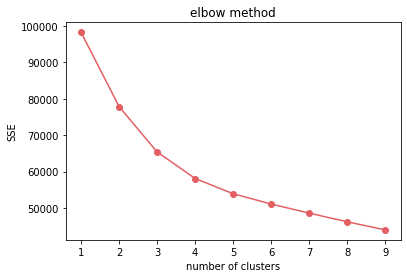

In [ ]:
from sklearn.cluster import KMeans
# 엘보우 기법 (오차제곱합의 값이 최소가 되도록 결정하는 방법)
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, color='#e35f62', marker='o')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(X, 10)

In [ ]:
visualize_silhouette([2,3,4,5], X)
visualize_kmeans_plot_multi([2,3,4,5], X) 

NameError: ignored

In [ ]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(X) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(X) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

          0         1         2         3         4         5         6
0  0.819557  4.253917  2.484063  3.641005  4.506213  1.571691  0.627012
1  0.830045  4.033736  3.249204  2.782941  1.973584  2.503692  0.578676
2  0.818985  3.941501  2.275386  2.853753  3.235099  5.400221 -0.146909
[0 0 2 0 0 0 0 2 2 0]


In [ ]:
clust_df = cluster_original.copy()
clust_df['clust'] = pred
clust_df[['고객번호', 'clust']]

,고객번호,clust
0,1,0
1,2,0
2,7,2
3,8,0
4,10,0
...,...,...
8651,19307,1
8652,19314,0
8653,19325,2
8654,19327,1


In [ ]:
df = clust_df.groupby('clust')[['고객번호']].count()
df = df.rename(columns={'고객번호':'사람수'})
df

,사람수
clust,
0,3142
1,1814
2,3700


In [ ]:
cluster_mean= clust_df.groupby('clust').mean()
cluster_mean

,Unnamed: 0,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,총구매지수,A_구매지수
clust,,,,,,,,,
0,4976.811903,10456.494908,0.830363,4.033418,3.246976,2.780713,1.973902,2.503055,0.579885
1,4543.548512,9474.984013,0.818633,3.942668,2.278942,2.858324,3.234840,5.399008,-0.148622
2,3670.189189,7585.544595,0.819459,4.253784,2.484324,3.641081,4.506757,1.570757,0.627243


## 3. total 데이터와 merge

In [ ]:
total_clust = pd.merge(cluster_total, clust_df[['고객번호', 'clust']], on='고객번호')
total_clust.to_csv('/content/drive/MyDrive/KDT/2차프로젝트/cv_data_train.csv')

In [ ]:
total_clust

,Unnamed: 0,고객번호,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,점포코드,...,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사,clust
0,0,1,2,203,A020302,화장품,기초 화장품,일상용품,1402508,12,...,15,133950,0,6,1.0,2014,고가,1,A,2
1,1,1,3,302,C030202,과채류,고추,식품,10972931,318,...,15,1990,0,6,1.0,2014,저가,4,C,2
2,2,1,3,302,C030202,과채류,고추,식품,5846388,96,...,21,5990,0,6,1.0,2015,중가,5,C,2
3,3,1,3,302,C030204,과채류,오이,식품,5847354,96,...,21,1580,0,6,1.0,2015,저가,6,C,2
4,4,1,3,302,C030204,과채류,오이,식품,5847498,96,...,10,2490,0,6,1.0,2015,저가,6,C,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10924591,12275294,19333,1,105,A010521,수산품,수산단기행사,식품,2014102,3,...,13,5000,1,2,NaN,2014,저가,2,A,0
10924592,12275295,19333,1,105,A010521,수산품,수산단기행사,식품,1974627,3,...,13,10000,1,2,NaN,2014,중가,2,A,0
10924593,12275296,19333,1,105,A010508,수산품,멸치류,식품,3542431,3,...,19,5000,1,2,NaN,2015,저가,5,A,0
10924594,12275297,19333,1,105,A010521,수산품,수산단기행사,식품,2004977,3,...,13,11000,1,2,NaN,2014,중가,2,A,0


## clust 특징 찾기
고객별로 먼저 묶고 다시 clust로 묶기

In [ ]:
# 대분류별 구매금액 평균
df1 = total_clust.groupby(['고객번호', '대분류']).agg({'clust':'mean', '구매금액':'sum'})
df1 = df1.groupby(['clust','대분류'])[['구매금액']].mean().unstack(level=1)
df1

구매금액                                                           \
대분류              기타            식품            음식점            의류      의약품/의료기기   
clust                                                                          
0.0    3.960599e+05  6.239332e+06  119080.082680  1.327585e+06  47931.646558   
1.0    9.669590e+05  9.267021e+06  128682.056721  6.796001e+06  49754.572271   
2.0    2.883490e+06  1.271472e+07  109718.898028  2.557349e+07  52720.810373   

                                                 
대분류            일상용품            주거            취미  
clust                                            
0.0    2.230469e+06  3.523595e+05  3.909933e+05  
1.0    6.047095e+06  1.117124e+06  1.175865e+06  
2.0    1.616581e+07  3.135353e+06  2.802149e+06

In [ ]:
# 총 구매금액 평균
df2 = total_clust.groupby(['고객번호']).agg({'clust' :'mean', '구매금액':'sum'})
df2 = df2.groupby(['clust'])[['구매금액']].mean()
df2

,구매금액
clust,
0.0,1.085942e+07
1.0,2.510905e+07
2.0,6.285683e+07


In [ ]:
# 연령, 성별 평균
df3 = total_clust.groupby(['고객번호'])[['연령대', '성별','clust']].mean()
df3 = df3.groupby(['clust'])[['연령대', '성별']].mean()
df3

,연령대,성별
clust,,
0.0,4.033418,0.830363
1.0,3.942668,0.818633
2.0,4.253784,0.819459


In [ ]:
# 금액 분류별 평균 구매금액, 평균 구매횟수
df4 = total_clust.groupby(['고객번호', '분류']).agg({'clust':'mean', '영수증번호':'count', '구매금액':'sum'})
df4 = df4.groupby(['clust','분류'])[['구매금액','영수증번호']].mean().unstack(level=1)
df4

구매금액                                   영수증번호               \
분류               고가            저가            중가          고가           저가   
clust                                                                      
0.0    3.173186e+06  3.513438e+06  4.184229e+06   59.281290  1006.800127   
1.0    1.518435e+07  3.400151e+06  6.524541e+06   94.702315   648.086549   
2.0    4.615276e+07  4.264047e+06  1.244002e+07  178.721892   561.918108   

                   
분류             중가  
clust              
0.0    387.359121  
1.0    366.520397  
2.0    434.111081

In [ ]:
# 데이터 합산
total2 = pd.merge(pd.merge(pd.merge(pd.merge(df, df2, on='clust'), df3, on='clust'), df1, on='clust'), df4, on='clust')
total2

,사람수,구매금액,연령대,성별,"(구매금액, 기타)","(구매금액, 식품)","(구매금액, 음식점)","(구매금액, 의류)","(구매금액, 의약품/의료기기)","(구매금액, 일상용품)","(구매금액, 주거)","(구매금액, 취미)","(구매금액, 고가)","(구매금액, 저가)","(구매금액, 중가)","(영수증번호, 고가)","(영수증번호, 저가)","(영수증번호, 중가)"
clust,,,,,,,,,,,,,,,,,,
0,3142,1.085942e+07,4.033418,0.830363,3.960599e+05,6.239332e+06,119080.082680,1.327585e+06,47931.646558,2.230469e+06,3.523595e+05,3.909933e+05,3.173186e+06,3.513438e+06,4.184229e+06,59.281290,1006.800127,387.359121
1,1814,2.510905e+07,3.942668,0.818633,9.669590e+05,9.267021e+06,128682.056721,6.796001e+06,49754.572271,6.047095e+06,1.117124e+06,1.175865e+06,1.518435e+07,3.400151e+06,6.524541e+06,94.702315,648.086549,366.520397
2,3700,6.285683e+07,4.253784,0.819459,2.883490e+06,1.271472e+07,109718.898028,2.557349e+07,52720.810373,1.616581e+07,3.135353e+06,2.802149e+06,4.615276e+07,4.264047e+06,1.244002e+07,178.721892,561.918108,434.111081


* RFM

In [ ]:
rfm = cluster_total[['고객번호', '영수증번호','구매일자']].drop_duplicates(['영수증번호'])
rfm = rfm.groupby('고객번호').agg({'구매일자':'max', '영수증번호':'count'})
rfm

,구매일자,영수증번호
고객번호,,
1,20150922,631
2,20150929,602
7,20150928,454
8,20150930,600
10,20150929,696
...,...,...
19307,20150928,495
19314,20150922,464
19325,20150929,469


In [ ]:
from datetime import datetime
date = datetime.strptime('20151001', '%Y%m%d') 
date

datetime.datetime(2015, 10, 1, 0, 0)

In [ ]:
rfm['구매일자'] = rfm['구매일자'].map(lambda x : date - datetime.strptime(str(x), '%Y%m%d'))
rfm

,구매일자,영수증번호
고객번호,,
1,9 days,631
2,2 days,602
7,3 days,454
8,1 days,600
10,2 days,696
...,...,...
19307,3 days,495
19314,9 days,464
19325,2 days,469


In [ ]:
rfm =  pd.merge(rfm, clust_df[['고객번호', 'clust']], on='고객번호')
rfm

,고객번호,구매일자,영수증번호,clust
0,1,9 days,631,2
1,2,2 days,602,2
2,7,3 days,454,1
3,8,1 days,600,2
4,10,2 days,696,2
...,...,...,...,...
8651,19307,3 days,495,0
8652,19314,9 days,464,2
8653,19325,2 days,469,1
8654,19327,10 days,747,0


In [ ]:
rfm['구매일자'] = rfm['구매일자'].map(lambda x: x.days)

In [ ]:
# 최근 구매일자, 구매 횟수 평균
rfm = rfm.groupby('clust')[['구매일자','영수증번호']].mean()
rfm

,구매일자,영수증번호
clust,,
0,2.965309,480.830363
1,6.214443,493.529768
2,3.953243,563.950270


In [ ]:
total3 = pd.merge(total2, rfm, on='clust')
total3

,사람수,구매금액,연령대,성별,"(구매금액, 기타)","(구매금액, 식품)","(구매금액, 음식점)","(구매금액, 의류)","(구매금액, 의약품/의료기기)","(구매금액, 일상용품)","(구매금액, 주거)","(구매금액, 취미)","(구매금액, 고가)","(구매금액, 저가)","(구매금액, 중가)","(영수증번호, 고가)","(영수증번호, 저가)","(영수증번호, 중가)",구매일자,영수증번호
clust,,,,,,,,,,,,,,,,,,,,
0,3142,1.085942e+07,4.033418,0.830363,3.960599e+05,6.239332e+06,119080.082680,1.327585e+06,47931.646558,2.230469e+06,3.523595e+05,3.909933e+05,3.173186e+06,3.513438e+06,4.184229e+06,59.281290,1006.800127,387.359121,2.965309,480.830363
1,1814,2.510905e+07,3.942668,0.818633,9.669590e+05,9.267021e+06,128682.056721,6.796001e+06,49754.572271,6.047095e+06,1.117124e+06,1.175865e+06,1.518435e+07,3.400151e+06,6.524541e+06,94.702315,648.086549,366.520397,6.214443,493.529768
2,3700,6.285683e+07,4.253784,0.819459,2.883490e+06,1.271472e+07,109718.898028,2.557349e+07,52720.810373,1.616581e+07,3.135353e+06,2.802149e+06,4.615276e+07,4.264047e+06,1.244002e+07,178.721892,561.918108,434.111081,3.953243,563.950270


* 제휴사별

In [ ]:
# 제휴사별 구매금액 평균
df6 = total_clust.groupby(['고객번호', '제휴사']).agg({'clust':'mean', '구매금액':'sum'})
df6 = df6.groupby(['clust','제휴사'])[['구매금액']].mean().unstack(level=1)
df6

구매금액                                           
제휴사               A             B             C              D
clust                                                         
0.0    3.209435e+06  5.359202e+06  2.908625e+06  312323.161017
1.0    1.769816e+07  6.215982e+06  2.150995e+06  128849.807074
2.0    5.691211e+07  4.508948e+06  2.298707e+06   81668.601637

In [ ]:
total4 = pd.merge(total3, df6, on='clust')
total4

,사람수,구매금액,연령대,성별,"(구매금액, 기타)","(구매금액, 식품)","(구매금액, 음식점)","(구매금액, 의류)","(구매금액, 의약품/의료기기)","(구매금액, 일상용품)",...,"(구매금액, 중가)","(영수증번호, 고가)","(영수증번호, 저가)","(영수증번호, 중가)",구매일자,영수증번호,"(구매금액, A)","(구매금액, B)","(구매금액, C)","(구매금액, D)"
clust,,,,,,,,,,,,,,,,,,,,,
0,3142,1.085942e+07,4.033418,0.830363,3.960599e+05,6.239332e+06,119080.082680,1.327585e+06,47931.646558,2.230469e+06,...,4.184229e+06,59.281290,1006.800127,387.359121,2.965309,480.830363,3.209435e+06,5.359202e+06,2.908625e+06,312323.161017
1,1814,2.510905e+07,3.942668,0.818633,9.669590e+05,9.267021e+06,128682.056721,6.796001e+06,49754.572271,6.047095e+06,...,6.524541e+06,94.702315,648.086549,366.520397,6.214443,493.529768,1.769816e+07,6.215982e+06,2.150995e+06,128849.807074
2,3700,6.285683e+07,4.253784,0.819459,2.883490e+06,1.271472e+07,109718.898028,2.557349e+07,52720.810373,1.616581e+07,...,1.244002e+07,178.721892,561.918108,434.111081,3.953243,563.950270,5.691211e+07,4.508948e+06,2.298707e+06,81668.601637


In [ ]:
total4.to_csv('/content/drive/MyDrive/KDT/2차프로젝트/cluster.csv')

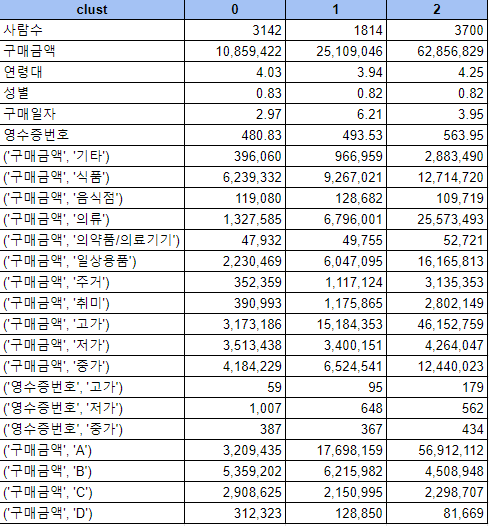

- 0번군집: 1810명
 - 40대:40%,30대:27%,50대:22%
 - 주요제휴사 A
 - 고가 61% 중가 25% 저가 12% (전체고가물품 매출중 7%구매)
 - 식품 35% 의류 27% 일상용품 24%
 - 첫분기 대비 마지막분기 구매건수감소 48607
 - 구매비율 주말 37% 평일 62%
 
- 1번군집: 3703명
 - 40대:40%,50대:30%,30대:20%
 - 주요제휴사 A
 - 고가 74% 중가 19% 저가6% (전체고가물품 매출중 46%)
 - 의류 41% 일상용품 25% 식품18%
 - 첫분기 대비 마지막분기 구매건수감소 10378
 - 구매비율 주말 39% 평일 60%

- 2번군집: 3143명
 - 40대:43%,50대:25%,30대:21%
 - 주요제휴사 B
 - 고가 30% 중가 38% 저가 31% (전체고가물품 매출중 2%)
 - 식품 56% 일상용품 20% 의류 12%
 - 첫분기 대비 마지막분기 구매건수감소 16428
 - 구매비율 주말 31% 평일 68%

## decicion tree 그림

In [ ]:
pred = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/prediction1.csv')
pred

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률,Label,Score
0,1,0,1,6,0,3,0,1,5,5,...,0.0,-3.6,0.6,1.4,0.4,0.2,0,-2.596810,0,0.72
1,2,0,2,6,0,3,0,2,4,5,...,6.8,0.0,-2.4,4.6,6.4,3.8,0,-0.334226,0,0.53
2,3,0,1,6,0,0,0,1,2,1,...,0.0,1.8,0.8,0.4,0.0,4.2,0,5.648077,1,0.80
3,4,1,1,6,0,2,0,4,3,3,...,4.2,11.2,4.0,3.2,5.2,7.4,0,8.419210,1,0.87
4,6,1,4,6,0,0,0,4,5,4,...,1.2,1.8,0.6,6.6,1.8,8.0,1,8.419641,1,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,1,0,2,1,0,1,2,4,1,...,-2.4,0.0,-1.0,-0.6,-4.2,1.2,0,-13.772816,0,0.63
18862,19334,0,7,3,1,3,0,1,3,2,...,7.6,3.6,0.6,0.8,4.6,4.2,0,-8.642034,1,0.51
18863,19335,1,14,3,1,0,0,3,3,3,...,0.8,1.6,4.6,3.2,2.8,0.8,1,8.779073,1,0.87
18864,19336,1,1,3,0,0,0,1,1,4,...,8.6,0.0,2.6,7.6,4.0,0.0,1,55.360192,1,0.97


In [ ]:
cuslist=pred[pred['Label']==0]['고객번호'].values.tolist()

In [ ]:
cluster=pred[pred['고객번호'].isin(cuslist)]
cluster.reset_index(inplace=True,drop=True)
cluster[cluster['Label']==0]

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률,Label,Score
0,1,0,1,6,0,3,0,1,5,5,...,0.0,-3.6,0.6,1.4,0.4,0.2,0,-2.596810,0,0.72
1,2,0,2,6,0,3,0,2,4,5,...,6.8,0.0,-2.4,4.6,6.4,3.8,0,-0.334226,0,0.53
2,7,1,1,6,0,1,1,2,2,5,...,5.0,1.2,-1.4,0.4,0.0,1.4,1,-17.638567,0,0.74
3,8,0,1,6,0,2,0,4,4,5,...,10.2,10.2,3.2,5.8,7.0,1.8,1,3.297967,0,0.50
4,10,1,1,6,0,0,0,3,5,3,...,2.2,1.2,0.0,4.6,4.2,-1.8,0,-2.592876,0,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,19307,1,2,4,0,3,0,2,3,2,...,0.0,-0.6,-0.2,1.2,0.0,0.0,1,-1.948156,0,0.57
8652,19314,1,1,4,1,0,0,1,3,5,...,0.4,6.8,-0.2,0.4,1.0,1.2,0,-11.946349,0,0.95
8653,19325,1,12,4,0,0,0,2,3,3,...,5.8,-1.8,2.8,4.6,4.4,1.8,0,-9.067570,0,0.59
8654,19327,0,1,5,1,0,0,1,5,1,...,-0.8,2.2,-2.2,0.0,2.4,4.2,0,-9.532850,0,0.69


In [ ]:
clust2 = clust_df[clust_df['clust']==2]['고객번호'].values.tolist()
len(clust2)

1809

In [ ]:
cluster2 = pred[pred['고객번호'].isin(clust2)]
cluster2.reset_index(inplace=True,drop=True)

In [ ]:
cluster2

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M,...,취미_구매지수,주거_구매지수,식품_방문지수,패션_방문지수,취미_방문지수,주거_방문지수,target,연평균성장률,Label,Score
0,7,1,1,6,0,1,1,2,2,5,...,5.0,1.2,-1.4,0.4,0.0,1.4,1,-17.638567,0,0.74
1,15,1,1,6,0,1,0,4,5,4,...,0.8,0.4,-0.8,-1.0,2.8,-0.8,0,-13.084923,0,0.71
2,18,1,3,6,0,0,0,2,3,5,...,2.0,2.6,0.2,0.6,0.4,-4.4,0,-42.620398,0,0.76
3,22,1,0,6,0,0,0,3,1,5,...,0.0,0.0,0.2,0.8,0.0,0.0,1,-22.276775,0,0.86
4,47,1,1,6,0,0,0,1,2,4,...,-1.2,0.8,-1.4,3.0,-2.0,0.4,0,-16.627098,0,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,19282,1,3,5,0,0,0,1,2,3,...,2.4,3.6,-3.8,1.8,2.4,3.2,0,-14.525763,0,0.93
1805,19286,1,2,3,1,0,0,4,3,3,...,-0.4,7.0,-3.4,2.4,-0.8,0.2,0,-9.541894,0,0.88
1806,19290,1,2,4,1,0,0,1,1,2,...,-0.2,-3.0,-3.4,1.4,-1.8,0.2,0,-18.140560,0,0.85
1807,19297,1,1,3,1,0,0,1,2,3,...,3.2,2.8,2.0,1.0,1.6,2.0,0,-11.076330,0,0.76


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(max_depth=10)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_val)
acc = accuracy_score(y_val, pred)
print("결정 트리 예측 정확도: {0:.4f}".format(acc))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print("DecisionTreeClassifier 기본 하이퍼 파라미터:\n", dt_clf.get_params())

결정 트리 예측 정확도: 0.6585
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [ ]:
pip install Graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
targets_name = ['증가' , '감소']

In [ ]:
# export_graphviz()의 결과로 out_file로 지정된 tree.dot 파일을 생성
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file="tree.dot", feature_names=features.columns, impurity=True, filled=True)

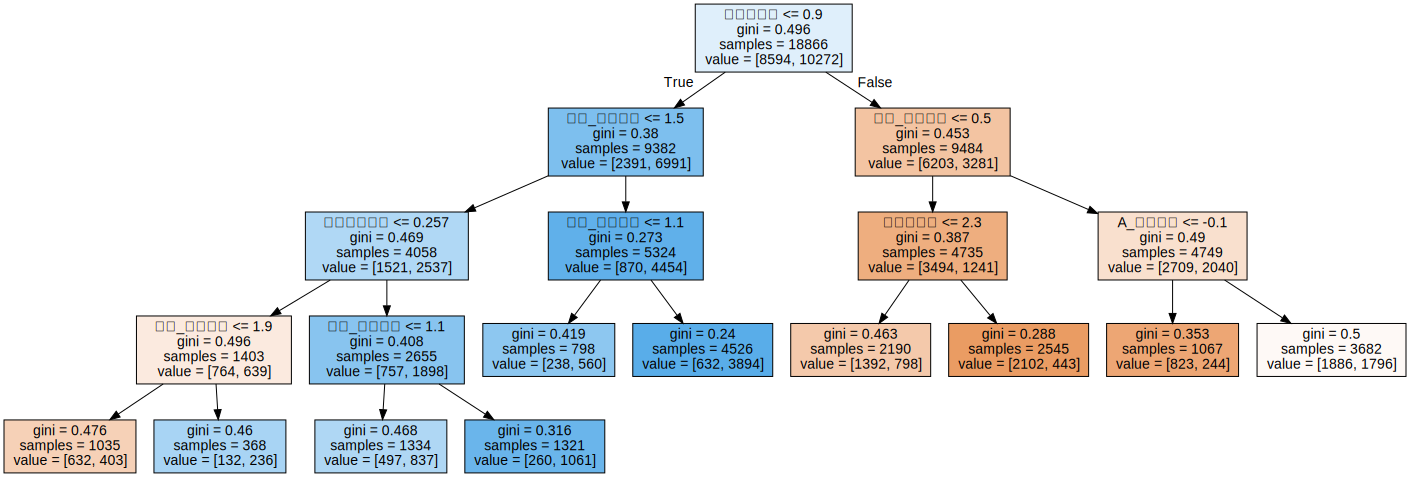

In [ ]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
dt_clf = DecisionTreeClassifier(min_samples_leaf= 10,
                                min_samples_split=6,
                                max_features=10,
                                max_depth=10,
                                max_leaf_nodes=10)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_val)
acc = accuracy_score(y_val, pred)
print("결정 트리 예측 정확도: {0:.4f}".format(acc))

결정 트리 예측 정확도: 0.6649


In [ ]:
# export_graphviz()의 결과로 out_file로 지정된 tree.dot 파일을 생성
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file="tree.dot",\
                feature_names=features.columns, impurity=True, filled=True)

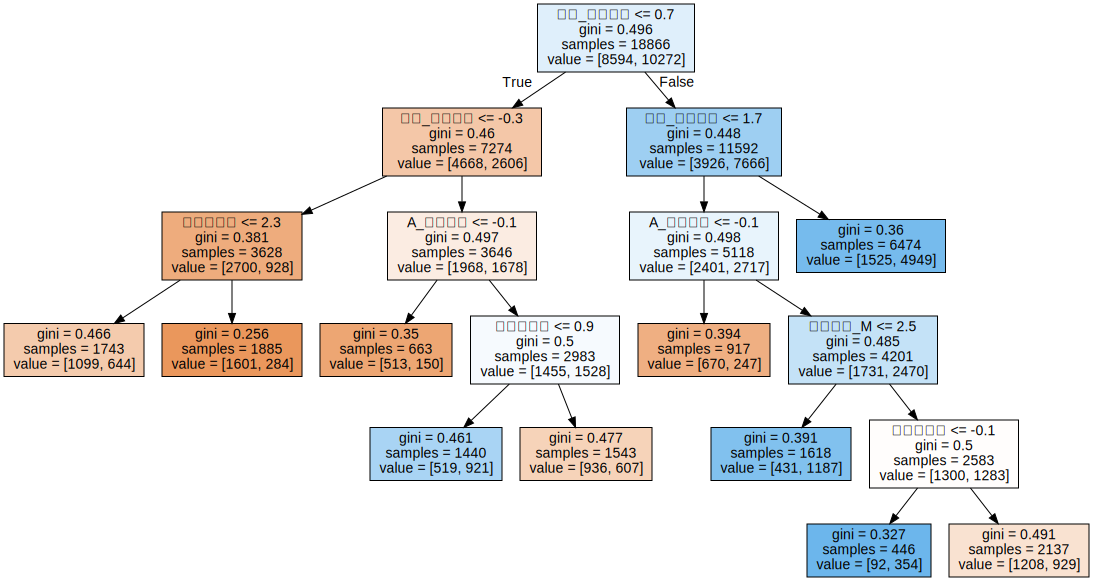

In [ ]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
clust_new = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/bc_total.csv')

In [ ]:
c3 = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/abc.csv')

In [ ]:
clust_new

,Unnamed: 0,고객번호,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,점포코드,...,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사,유형
0,0,1,3,308,C030808,나물류,파래,식품,5846089,96,...,11,1000,0,6,1.0,2015,저가,5,C,1
1,1,1,1,106,A010603,가공식품,서양델리,식품,2580495,12,...,17,13000,0,6,1.0,2014,중가,3,A,1
2,2,1,1,106,A010603,가공식품,서양델리,식품,2580494,12,...,17,12000,0,6,1.0,2014,중가,3,A,1
3,3,1,1,106,A010603,가공식품,서양델리,식품,2541458,12,...,13,6500,0,6,1.0,2014,중가,3,A,1
4,4,1,1,106,A010603,가공식품,서양델리,식품,2454072,12,...,19,10000,0,6,1.0,2014,중가,3,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10924591,10924591,19333,1,106,A010607,가공식품,제과제빵,식품,2045112,26,...,20,8000,1,2,NaN,2014,중가,2,A,0
10924592,10924592,19333,1,106,A010607,가공식품,제과제빵,식품,1902248,2,...,18,10000,1,2,NaN,2014,중가,2,A,0
10924593,10924593,19333,1,106,A010607,가공식품,제과제빵,식품,1957198,1,...,20,7000,1,2,NaN,2014,중가,2,A,0
10924594,10924594,19333,1,106,A010603,가공식품,서양델리,식품,2014079,3,...,14,5000,1,2,NaN,2014,저가,2,A,0


In [ ]:
clust_new.groupby('유형').mean()

,Unnamed: 0,고객번호,대분류코드,중분류코드,영수증번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분기
유형,,,,,,,,,,,,,,
0,4.574553e+06,7791.347615,14.272496,1431.098805,5.467649e+06,54.360448,2.014482e+07,16.006496,53108.883423,0.810147,4.270312,4.653064,2014.421793,3.973760
1,6.228310e+06,10643.493479,24.970998,2500.740083,7.618136e+06,68.975959,2.014471e+07,16.945684,8800.735263,0.822514,4.013328,4.877947,2014.411296,3.911891
2,5.713836e+06,9753.497164,14.618859,1465.322514,6.127697e+06,125.694686,2.014477e+07,16.893160,13454.887905,0.815533,4.068322,4.938010,2014.417349,3.947350
3,5.614247e+06,9574.291553,14.884065,1492.085171,5.944008e+06,85.591587,2.014405e+07,16.491807,32642.267990,0.826254,4.019914,5.265047,2014.346512,3.630558
4,4.544646e+06,7731.043966,12.486111,1252.474223,5.194155e+06,51.355995,2.014515e+07,16.201345,66190.404220,0.844169,4.189381,5.068563,2014.453462,4.133009


In [ ]:
c3

,Unnamed: 0,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,식품_구매지수,연평균성장률,A_구매지수,유형,실루엣계수
0,0,1,0,6,1,5,5,-2.4,-0.259681,0.4,3,0.206964
1,1,2,0,6,2,4,5,-1.0,-0.033423,1.6,0,0.201205
2,2,7,1,6,2,2,5,0.2,-1.763857,0.8,0,0.229214
3,3,8,0,6,4,4,5,0.0,0.329797,1.0,2,0.141752
4,4,10,1,6,3,5,3,-0.6,-0.259288,1.0,2,0.253469
...,...,...,...,...,...,...,...,...,...,...,...,...
8651,8651,19307,1,4,2,3,2,0.2,-0.194816,0.6,1,0.203918
8652,8652,19314,1,4,1,3,5,5.8,-1.194635,0.0,4,0.462464
8653,8653,19325,1,4,2,3,3,0.0,-0.906757,2.2,0,0.051092
8654,8654,19327,0,5,1,5,1,0.8,-0.953285,0.0,2,0.052596


In [ ]:
c3.groupby('유형').mean()

,Unnamed: 0,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,식품_구매지수,연평균성장률,A_구매지수,실루엣계수
유형,,,,,,,,,,,
0,3670.671782,7592.289604,0.812871,4.276733,1.881683,3.367822,4.389109,1.211980,-0.730716,0.547030,0.238177
1,5061.779678,10637.187626,0.826459,3.973843,2.628270,1.705734,1.929074,0.213280,-0.695965,0.416298,0.202868
2,4581.425348,9580.081613,0.818051,4.083053,4.025444,4.228036,2.845895,0.303217,-0.546942,0.626116,0.211821
3,4437.984375,9248.169531,0.825781,4.003125,2.074219,3.382031,3.562500,-2.326719,-1.621312,-0.099219,0.178003
4,3702.362646,7651.612451,0.840467,4.199222,2.694163,3.162646,4.323735,4.902101,-0.641989,0.594086,0.344207


In [ ]:
df = clust_new.groupby('고객번호').agg({'유형':'mean', '고객번호':'mean'})
df = df.groupby('유형')[['고객번호']].count()
df = df.rename(columns={'고객번호':'사람수'})
df

,사람수
유형,
0.0,2020
1.0,1988
2.0,2083
3.0,1280
4.0,1285


In [ ]:
# 대분류별 구매금액 평균
df1 = clust_new.groupby(['고객번호', '대분류']).agg({'유형':'mean', '구매금액':'sum'})
df1 = df1.groupby(['유형','대분류'])[['구매금액']].mean().unstack(level=1)
df1

구매금액                                                           \
대분류            기타            식품            음식점            의류      의약품/의료기기   
유형                                                                           
0.0  2.798011e+06  1.260983e+07  114557.289328  2.317482e+07  48811.088235   
1.0  4.918240e+05  5.580915e+06  115991.455260  1.464611e+06  51174.501372   
2.0  8.801999e+05  9.685000e+06  131571.104981  5.669767e+06  52713.050616   
3.0  1.429914e+06  1.160828e+07  121160.478166  1.312263e+07  51006.341991   
4.0  2.873742e+06  9.229302e+06   87624.759690  2.601309e+07  42544.591549   

                                               
대분류          일상용품            주거            취미  
유형                                             
0.0  1.421606e+07  2.946577e+06  2.397625e+06  
1.0  2.337867e+06  3.631935e+05  4.539478e+05  
2.0  6.136154e+06  8.798663e+05  8.992837e+05  
3.0  9.361239e+06  1.828600e+06  1.948184e+06  
4.0  1.530200e+07  3.046564e+06  2.884701e+06

In [ ]:
# 총 구매금액 평균
df2 = clust_new.groupby(['고객번호']).agg({'유형' :'mean', '구매금액':'sum'})
df2 = df2.groupby(['유형'])[['구매금액']].mean()
df2

,구매금액
유형,
0.0,5.766110e+07
1.0,1.066637e+07
2.0,2.362788e+07
3.0,3.876550e+07
4.0,5.892723e+07


In [ ]:
# 연령, 성별 평균
df3 = clust_new.groupby(['고객번호'])[['연령대', '성별','유형']].mean()
df3 = df3.groupby(['유형'])[['연령대', '성별']].mean()
df3

,연령대,성별
유형,,
0.0,4.276733,0.812871
1.0,3.973843,0.826459
2.0,4.083053,0.818051
3.0,4.003125,0.825781
4.0,4.199222,0.840467


In [ ]:
# 금액 분류별 평균 구매금액, 평균 구매횟수
df4 = clust_new.groupby(['고객번호', '분류']).agg({'유형':'mean', '영수증번호':'count', '구매금액':'sum'})
df4 = df4.groupby(['유형','분류'])[['구매금액','영수증번호']].mean().unstack(level=1)
df4

구매금액                                   영수증번호               \
분류             고가            저가            중가          고가           저가   
유형                                                                       
0.0  4.205929e+07  3.974860e+06  1.162696e+07  169.769307   503.445545   
1.0  3.385750e+06  3.205595e+06  4.094117e+06   57.148635   802.440141   
2.0  1.256751e+07  4.343676e+06  6.716698e+06  100.156505  1168.665386   
3.0  2.648903e+07  3.782372e+06  8.494093e+06  125.464062   666.160938   
4.0  4.397447e+07  3.651997e+06  1.130076e+07  150.611673   403.785992   

                 
분류           중가  
유형               
0.0  412.500000  
1.0  352.862607  
2.0  487.259722  
3.0  395.960938  
4.0  335.870817

In [ ]:
# 데이터 합산
total2 = pd.merge(pd.merge(pd.merge(pd.merge(df, df2, on='유형'), df3, on='유형'), df1, on='유형'), df4, on='유형')
total2

,사람수,구매금액,연령대,성별,"(구매금액, 기타)","(구매금액, 식품)","(구매금액, 음식점)","(구매금액, 의류)","(구매금액, 의약품/의료기기)","(구매금액, 일상용품)","(구매금액, 주거)","(구매금액, 취미)","(구매금액, 고가)","(구매금액, 저가)","(구매금액, 중가)","(영수증번호, 고가)","(영수증번호, 저가)","(영수증번호, 중가)"
유형,,,,,,,,,,,,,,,,,,
0.0,2020,5.766110e+07,4.276733,0.812871,2.798011e+06,1.260983e+07,114557.289328,2.317482e+07,48811.088235,1.421606e+07,2.946577e+06,2.397625e+06,4.205929e+07,3.974860e+06,1.162696e+07,169.769307,503.445545,412.500000
1.0,1988,1.066637e+07,3.973843,0.826459,4.918240e+05,5.580915e+06,115991.455260,1.464611e+06,51174.501372,2.337867e+06,3.631935e+05,4.539478e+05,3.385750e+06,3.205595e+06,4.094117e+06,57.148635,802.440141,352.862607
2.0,2083,2.362788e+07,4.083053,0.818051,8.801999e+05,9.685000e+06,131571.104981,5.669767e+06,52713.050616,6.136154e+06,8.798663e+05,8.992837e+05,1.256751e+07,4.343676e+06,6.716698e+06,100.156505,1168.665386,487.259722
3.0,1280,3.876550e+07,4.003125,0.825781,1.429914e+06,1.160828e+07,121160.478166,1.312263e+07,51006.341991,9.361239e+06,1.828600e+06,1.948184e+06,2.648903e+07,3.782372e+06,8.494093e+06,125.464062,666.160938,395.960938
4.0,1285,5.892723e+07,4.199222,0.840467,2.873742e+06,9.229302e+06,87624.759690,2.601309e+07,42544.591549,1.530200e+07,3.046564e+06,2.884701e+06,4.397447e+07,3.651997e+06,1.130076e+07,150.611673,403.785992,335.870817


* RFM

In [ ]:
rfm = clust_new[['고객번호', '영수증번호','구매일자']].drop_duplicates(['영수증번호'])
rfm = rfm.groupby('고객번호').agg({'구매일자':'max', '영수증번호':'count'})
rfm

,구매일자,영수증번호
고객번호,,
1,20150922,631
2,20150929,602
7,20150928,454
8,20150930,600
10,20150929,696
...,...,...
19307,20150928,495
19314,20150922,464
19325,20150929,469


In [ ]:
from datetime import datetime
date = datetime.strptime('20151001', '%Y%m%d') 
date

datetime.datetime(2015, 10, 1, 0, 0)

In [ ]:
rfm['구매일자'] = rfm['구매일자'].map(lambda x : date - datetime.strptime(str(x), '%Y%m%d'))
rfm

,구매일자,영수증번호
고객번호,,
1,9 days,631
2,2 days,602
7,3 days,454
8,1 days,600
10,2 days,696
...,...,...
19307,3 days,495
19314,9 days,464
19325,2 days,469


In [ ]:
rfm =  pd.merge(rfm, c3[['고객번호', '유형']], on='고객번호')
rfm

,고객번호,구매일자,영수증번호,유형
0,1,9 days,631,3
1,2,2 days,602,0
2,7,3 days,454,0
3,8,1 days,600,2
4,10,2 days,696,2
...,...,...,...,...
8651,19307,3 days,495,1
8652,19314,9 days,464,4
8653,19325,2 days,469,0
8654,19327,10 days,747,2


In [ ]:
rfm['구매일자'] = rfm['구매일자'].map(lambda x: x.days)

In [ ]:
# 최근 구매일자, 구매 횟수 평균
rfm = rfm.groupby('유형')[['구매일자','영수증번호']].mean()
rfm

,구매일자,영수증번호
유형,,
0,5.247525,533.045545
1,4.353119,390.392857
2,1.314450,619.664906
3,6.779687,537.127344
4,3.538521,514.793774


In [ ]:
total3 = pd.merge(total2, rfm, on='유형')
total3

,사람수,구매금액,연령대,성별,"(구매금액, 기타)","(구매금액, 식품)","(구매금액, 음식점)","(구매금액, 의류)","(구매금액, 의약품/의료기기)","(구매금액, 일상용품)","(구매금액, 주거)","(구매금액, 취미)","(구매금액, 고가)","(구매금액, 저가)","(구매금액, 중가)","(영수증번호, 고가)","(영수증번호, 저가)","(영수증번호, 중가)",구매일자,영수증번호
유형,,,,,,,,,,,,,,,,,,,,
0.0,2020,5.766110e+07,4.276733,0.812871,2.798011e+06,1.260983e+07,114557.289328,2.317482e+07,48811.088235,1.421606e+07,2.946577e+06,2.397625e+06,4.205929e+07,3.974860e+06,1.162696e+07,169.769307,503.445545,412.500000,5.247525,533.045545
1.0,1988,1.066637e+07,3.973843,0.826459,4.918240e+05,5.580915e+06,115991.455260,1.464611e+06,51174.501372,2.337867e+06,3.631935e+05,4.539478e+05,3.385750e+06,3.205595e+06,4.094117e+06,57.148635,802.440141,352.862607,4.353119,390.392857
2.0,2083,2.362788e+07,4.083053,0.818051,8.801999e+05,9.685000e+06,131571.104981,5.669767e+06,52713.050616,6.136154e+06,8.798663e+05,8.992837e+05,1.256751e+07,4.343676e+06,6.716698e+06,100.156505,1168.665386,487.259722,1.314450,619.664906
3.0,1280,3.876550e+07,4.003125,0.825781,1.429914e+06,1.160828e+07,121160.478166,1.312263e+07,51006.341991,9.361239e+06,1.828600e+06,1.948184e+06,2.648903e+07,3.782372e+06,8.494093e+06,125.464062,666.160938,395.960938,6.779687,537.127344
4.0,1285,5.892723e+07,4.199222,0.840467,2.873742e+06,9.229302e+06,87624.759690,2.601309e+07,42544.591549,1.530200e+07,3.046564e+06,2.884701e+06,4.397447e+07,3.651997e+06,1.130076e+07,150.611673,403.785992,335.870817,3.538521,514.793774


* 제휴사별

In [ ]:
# 제휴사별 구매금액 평균
df6 = clust_new.groupby(['고객번호', '제휴사']).agg({'유형':'mean', '구매금액':'sum'})
df6 = df6.groupby(['유형','제휴사'])[['구매금액']].mean().unstack(level=1)
df6

구매금액                                           
제휴사             A             B             C              D
유형                                                          
0.0  5.153498e+07  4.965620e+06  2.077876e+06   72475.844156
1.0  3.599653e+06  6.673003e+06  8.615043e+05  440021.627907
2.0  1.508877e+07  4.385901e+06  5.183620e+06   87401.352542
3.0  3.101500e+07  6.477414e+06  2.475120e+06  108601.737089
4.0  5.551665e+07  3.146613e+06  8.521553e+05   81592.813765

In [ ]:
total4 = pd.merge(total3, df6, on='유형')
total4

,사람수,구매금액,연령대,성별,"(구매금액, 기타)","(구매금액, 식품)","(구매금액, 음식점)","(구매금액, 의류)","(구매금액, 의약품/의료기기)","(구매금액, 일상용품)",...,"(구매금액, 중가)","(영수증번호, 고가)","(영수증번호, 저가)","(영수증번호, 중가)",구매일자,영수증번호,"(구매금액, A)","(구매금액, B)","(구매금액, C)","(구매금액, D)"
유형,,,,,,,,,,,,,,,,,,,,,
0.0,2020,5.766110e+07,4.276733,0.812871,2.798011e+06,1.260983e+07,114557.289328,2.317482e+07,48811.088235,1.421606e+07,...,1.162696e+07,169.769307,503.445545,412.500000,5.247525,533.045545,5.153498e+07,4.965620e+06,2.077876e+06,72475.844156
1.0,1988,1.066637e+07,3.973843,0.826459,4.918240e+05,5.580915e+06,115991.455260,1.464611e+06,51174.501372,2.337867e+06,...,4.094117e+06,57.148635,802.440141,352.862607,4.353119,390.392857,3.599653e+06,6.673003e+06,8.615043e+05,440021.627907
2.0,2083,2.362788e+07,4.083053,0.818051,8.801999e+05,9.685000e+06,131571.104981,5.669767e+06,52713.050616,6.136154e+06,...,6.716698e+06,100.156505,1168.665386,487.259722,1.314450,619.664906,1.508877e+07,4.385901e+06,5.183620e+06,87401.352542
3.0,1280,3.876550e+07,4.003125,0.825781,1.429914e+06,1.160828e+07,121160.478166,1.312263e+07,51006.341991,9.361239e+06,...,8.494093e+06,125.464062,666.160938,395.960938,6.779687,537.127344,3.101500e+07,6.477414e+06,2.475120e+06,108601.737089
4.0,1285,5.892723e+07,4.199222,0.840467,2.873742e+06,9.229302e+06,87624.759690,2.601309e+07,42544.591549,1.530200e+07,...,1.130076e+07,150.611673,403.785992,335.870817,3.538521,514.793774,5.551665e+07,3.146613e+06,8.521553e+05,81592.813765


In [ ]:
total4.to_excel('/content/drive/MyDrive/KDT/2차프로젝트/new.xlsx')

### 군집 상세히 보기

In [ ]:
clust_new[clust_new['유형']==4].sort_values(by='구매금액', ascending=False)[['고객번호','중분류명','대분류','구매시간','구매금액']][:20]

,고객번호,중분류명,대분류,구매시간,구매금액
8355711,14323,명품,의류,14,101330000
8355704,14323,명품,의류,14,101110000
8355722,14323,명품,의류,16,99960000
8355703,14323,명품,의류,15,72915000
2701969,4525,명품,의류,12,51352000
2701968,4525,명품,의류,12,50000000
8355706,14323,명품,의류,14,48540000
10015789,17348,명품,의류,15,47500000
9290872,15999,캐주얼,의류,16,40000500
9290957,15999,캐주얼,의류,15,40000000


In [ ]:
clust_new[clust_new['유형']==0].sort_values(by='구매금액', ascending=False)[['고객번호','중분류명','대분류','구매시간','구매금액']][:20]

,고객번호,중분류명,대분류,구매시간,구매금액
734610,1334,명품,의류,14,61640000
3894848,6454,준보석/시계,취미,20,55000000
1168937,2064,명품,의류,16,52000000
2299544,3890,주류,식품,16,51098000
1125355,2002,명품,의류,16,50210000
10880705,19180,명품,의류,14,50000000
10880713,19180,명품,의류,14,50000000
461446,863,명품,의류,11,47500000
5382048,8994,모피/피혁,의류,18,46796400
461437,863,명품,의류,14,46000000


In [ ]:
q_count = clust_new[clust_new['유형']==0].groupby(['고객번호','분기'])[['영수증번호']].nunique()
q_count.groupby('분기')[['영수증번호']].sum()

,영수증번호
분기,
1,151480
2,165928
3,154111
4,161031
5,146478
6,159091
7,138633


In [ ]:
q_count = clust_new[clust_new['유형']==4].groupby(['고객번호','분기'])[['영수증번호']].nunique()
q_count.groupby('분기')[['영수증번호']].sum()

,영수증번호
분기,
1,84096
2,97824
3,91787
4,97249
5,89979
6,103253
7,97322


In [ ]:
q_count = clust_new.groupby(['고객번호','유형','분기'])[['영수증번호']].nunique()
q_count = q_count.groupby(['유형','분기'])[['영수증번호']].sum().unstack(level=1)
q_count

영수증번호                                                
분기       1       2       3       4       5       6       7
유형                                                        
0   151480  165928  154111  161031  146478  159091  138633
1   115840  117236  115507  113710  105867  107974   99967
2   185304  192813  188118  185459  175907  184563  178598
3   115984  119013  108363  106360   91358   83674   62771
4    84096   97824   91787   97249   89979  103253   97322

## 새로운 군집2

In [ ]:
clust_new = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/cluster_total')

In [ ]:
c3 = pd.read_csv('/content/drive/MyDrive/KDT/2차프로젝트/cluster.csv')

In [ ]:
clust_new

,Unnamed: 0,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,...,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사,유형
0,0,1,101,A010101,일용잡화,위생세제,일상용품,1254647,177,31,...,17,8900,1,6,2.0,2014,저가,1,A,2
1,1,1,101,A010101,일용잡화,위생세제,일상용품,1404262,177,31,...,17,5900,1,6,2.0,2014,저가,1,A,2
2,2,1,101,A010101,일용잡화,위생세제,일상용품,3676115,177,31,...,14,3000,1,6,2.0,2015,저가,5,A,2
3,3,1,101,A010101,일용잡화,위생세제,일상용품,3425163,177,31,...,10,24000,1,6,2.0,2014,중가,4,A,2
4,4,1,101,A010103,일용잡화,뷰티상품,일상용품,4855699,177,31,...,15,2000,1,6,2.0,2015,저가,7,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11472387,11472387,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883509,18839,306,...,14,3000,1,5,NaN,2014,저가,2,C,3
11472388,11472388,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882271,18839,306,...,10,1000,1,5,NaN,2014,저가,2,C,3
11472389,11472389,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10882525,18839,306,...,11,2000,1,5,NaN,2014,저가,2,C,3
11472390,11472390,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,10883328,18839,306,...,14,2000,1,5,NaN,2014,저가,2,C,3


In [ ]:
clust_new.columns

Index(['Unnamed: 0', '대분류코드', '중분류코드', '소분류코드', '중분류명', '소분류명', '대분류', '영수증번호',
       '고객번호', '점포코드', '구매일자', '구매시간', '구매금액', '성별', '연령대', '거주지역', '년도', '분류',
       '분기', '제휴사', '유형'],
      dtype='object')

In [ ]:
clust_new['대분류']=clust_new['대분류'].replace(['가공식품','신선식품'],'식품')
clust_new['대분류']=clust_new['대분류'].replace(['의류','패션잡화'],'패션')
clust_new['대분류']=clust_new['대분류'].replace(['전문스포츠/레저','교육/문화용품'],'취미')
clust_new['대분류']=clust_new['대분류'].replace(['디지털/가전','가구/인테리어'],'주거')
clust_new['대분류'].unique()

array(['일상용품', '식품', '취미', '패션', '주거', '음식점', '기타', '의약품/의료기기'],
      dtype=object)

In [ ]:
clust_new.groupby('유형').mean()

,Unnamed: 0,대분류코드,중분류코드,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분기
유형,,,,,,,,,,,,,,
0,4.494442e+06,16.979712,1701.804543,6.079599e+06,8506.043062,63.691853,2.014531e+07,16.437564,35742.560740,0.816822,4.131580,4.753961,2014.470151,4.200788
1,7.434329e+06,25.576369,2561.295309,7.689647e+06,10535.316835,63.998529,2.014478e+07,16.932703,9078.461386,0.836085,4.043239,4.804242,2014.418289,3.941998
2,3.302618e+06,12.900410,1293.868982,5.117001e+06,7461.342030,48.883441,2.014477e+07,15.900518,65198.292733,0.821784,4.306862,4.783387,2014.417257,3.954360
3,5.727321e+06,17.056675,1709.337533,6.427441e+06,9992.676146,88.386731,2.014395e+07,16.584007,25373.672222,0.801223,3.940011,5.116419,2014.336687,3.585231
4,6.867435e+06,14.205819,1423.951332,6.149685e+06,10233.105931,137.583438,2.014473e+07,17.034982,9212.743383,0.823405,4.039343,5.107738,2014.413394,3.929496


In [ ]:
c3

,Unnamed: 0,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,연평균성장률,식품구매비중,식품_방문지수,고가_방문지수,유형,실루엣계수
0,0,1,0,6,1,5,5,-0.259681,0.148453,0.6,-0.2,2,0.335040
1,1,2,0,6,2,4,5,-0.033423,0.153350,-2.4,0.4,2,0.148630
2,2,7,1,6,2,2,5,-1.763857,0.111419,-1.4,0.0,2,0.185036
3,3,10,1,6,3,5,3,-0.259288,0.694089,0.0,0.6,4,0.216958
4,4,11,0,6,4,3,5,-1.869347,0.127777,0.4,-0.2,2,0.238485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9019,9019,19314,1,4,1,3,5,-1.194635,0.041125,-0.2,0.4,2,0.392426
9020,9020,19325,1,4,2,3,3,-0.906757,0.352661,2.8,1.6,0,0.198347
9021,9021,19327,0,5,1,5,1,-0.953285,0.878719,-2.2,1.6,4,0.123898
9022,9022,19333,1,2,2,4,1,-1.377282,0.919496,-1.0,1.2,4,0.201445


In [ ]:
c3.groupby('유형').mean()

,Unnamed: 0,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,연평균성장률,식품구매비중,식품_방문지수,고가_방문지수,실루엣계수
유형,,,,,,,,,,,,
0,4140.889602,8340.801027,0.820282,4.150193,3.029525,3.252246,3.757381,-0.548600,0.346824,3.285366,1.952632,0.174959
1,5155.781000,10472.190500,0.835500,4.002500,2.566500,1.598500,1.974500,-0.586267,0.551049,0.279500,0.830500,0.218279
2,3635.129598,7282.923867,0.825064,4.312660,2.042772,3.335329,4.563730,-0.843695,0.237846,0.446279,0.342258,0.230488
3,4840.343344,9792.915584,0.802760,3.896916,2.194805,3.205357,3.258117,-1.704834,0.457975,-2.176461,-1.555519,0.121159
4,5003.413502,10153.760549,0.824367,4.050105,3.942511,4.229430,2.474684,-0.514199,0.613080,0.062553,0.905274,0.267209


In [ ]:
df = clust_new.groupby('고객번호').agg({'유형':'mean', '고객번호':'mean'})
df = df.groupby('유형')[['고객번호']].count()
df = df.rename(columns={'고객번호':'사람수'})
df

,사람수
유형,
0.0,1558
1.0,2000
2.0,2338
3.0,1232
4.0,1896


In [ ]:
# 대분류별 구매금액 평균
df1 = clust_new.groupby(['고객번호', '대분류']).agg({'유형':'mean', '구매금액':'sum'})
df1 = df1.groupby(['유형','대분류'])[['구매금액']].mean().unstack(level=1)
df1

구매금액                                                           \
대분류            기타            식품            음식점      의약품/의료기기          일상용품   
유형                                                                           
0.0  1.850026e+06  9.436854e+06  131184.283052  49386.382253  9.838660e+06   
1.0  4.748528e+05  5.646632e+06  116128.063675  52060.294643  2.398514e+06   
2.0  3.209718e+06  1.225166e+07   91849.448177  61659.627072  1.756731e+07   
3.0  1.189447e+06  1.183577e+07  144770.354839  46900.000000  7.076153e+06   
4.0  4.756579e+05  8.218288e+06  119123.736064  52888.737705  3.859007e+06   

                                               
대분류            주거            취미            패션  
유형                                             
0.0  2.012913e+06  1.759994e+06  1.529494e+07  
1.0  3.795624e+05  4.680101e+05  1.535549e+06  
2.0  3.414574e+06  2.922965e+06  2.714799e+07  
3.0  1.291670e+06  1.678456e+06  9.351404e+06  
4.0  6.199943e+05  5.911359e+05  3.157926e+06

In [ ]:
# 총 구매금액 평균
df2 = clust_new.groupby(['고객번호']).agg({'유형' :'mean', '구매금액':'sum'})
df2 = df2.groupby(['유형'])[['구매금액']].mean()
df2

,구매금액
유형,
0.0,3.988581e+07
1.0,1.088861e+07
2.0,6.604855e+07
3.0,3.195513e+07
4.0,1.659345e+07


In [ ]:
# 연령, 성별 평균
df3 = clust_new.groupby(['고객번호'])[['연령대', '성별','유형']].mean()
df3 = df3.groupby(['유형'])[['연령대', '성별']].mean()
df3

,연령대,성별
유형,,
0.0,4.150193,0.820282
1.0,4.002500,0.835500
2.0,4.312660,0.825064
3.0,3.896916,0.802760
4.0,4.050105,0.824367


In [ ]:
# 금액 분류별 평균 구매금액, 평균 구매횟수
df4 = clust_new.groupby(['고객번호', '분류']).agg({'유형':'mean', '영수증번호':'count', '구매금액':'sum'})
df4 = df4.groupby(['유형','분류'])[['구매금액','영수증번호']].mean().unstack(level=1)
df4

구매금액                                   영수증번호               \
분류             고가            저가            중가          고가           저가   
유형                                                                       
0.0  2.701701e+07  3.805439e+06  9.080697e+06  127.054592   591.678434   
1.0  3.496505e+06  3.209970e+06  4.199970e+06   58.686087   785.882000   
2.0  4.954144e+07  3.992691e+06  1.251441e+07  179.086826   446.474765   
3.0  2.071589e+07  3.733629e+06  7.505617e+06  115.162338   733.646916   
4.0  6.889182e+06  4.197860e+06  5.513673e+06   80.313622  1251.307489   

                 
분류           중가  
유형               
0.0  397.267651  
1.0  355.263132  
2.0  387.479470  
3.0  410.572240  
4.0  469.604430

* RFM

In [ ]:
rfm = clust_new[['고객번호', '영수증번호','구매일자']].drop_duplicates(['영수증번호'])
rfm = rfm.groupby('고객번호').agg({'구매일자':'max', '영수증번호':'count'})
rfm

,구매일자,영수증번호
고객번호,,
1,20150922,631
2,20150929,602
7,20150928,454
10,20150929,696
11,20150930,502
...,...,...
19314,20150922,464
19325,20150929,469
19327,20150921,747


In [ ]:
from datetime import datetime
date = datetime.strptime('20151001', '%Y%m%d') 
date

datetime.datetime(2015, 10, 1, 0, 0)

In [ ]:
rfm['구매일자'] = rfm['구매일자'].map(lambda x : date - datetime.strptime(str(x), '%Y%m%d'))
rfm

,구매일자,영수증번호
고객번호,,
1,9 days,631
2,2 days,602
7,3 days,454
10,2 days,696
11,1 days,502
...,...,...
19314,9 days,464
19325,2 days,469
19327,10 days,747


In [ ]:
rfm =  pd.merge(rfm, c3[['고객번호', '유형']], on='고객번호')
rfm

,고객번호,구매일자,영수증번호,유형
0,1,9 days,631,2
1,2,2 days,602,2
2,7,3 days,454,2
3,10,2 days,696,4
4,11,1 days,502,2
...,...,...,...,...
9019,19314,9 days,464,2
9020,19325,2 days,469,0
9021,19327,10 days,747,4
9022,19333,3 days,563,4


In [ ]:
rfm['구매일자'] = rfm['구매일자'].map(lambda x: x.days)

In [ ]:
# 최근 구매일자, 구매 횟수 평균
rfm = rfm.groupby('유형')[['구매일자','영수증번호']].mean()
rfm

,구매일자,영수증번호
유형,,
0,2.783697,523.034660
1,4.382500,382.100500
2,4.913174,533.466638
3,7.213474,520.366883
4,1.410338,618.914030


In [ ]:
# 데이터 합산
total2 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df, df2, on='유형'), df3, on='유형'), rfm, on='유형'), df1, on='유형'), df4, on='유형')
total2

,사람수,구매금액,연령대,성별,구매일자,영수증번호,"(구매금액, 기타)","(구매금액, 식품)","(구매금액, 음식점)","(구매금액, 의약품/의료기기)","(구매금액, 일상용품)","(구매금액, 주거)","(구매금액, 취미)","(구매금액, 패션)","(구매금액, 고가)","(구매금액, 저가)","(구매금액, 중가)","(영수증번호, 고가)","(영수증번호, 저가)","(영수증번호, 중가)"
유형,,,,,,,,,,,,,,,,,,,,
0.0,1558,3.988581e+07,4.150193,0.820282,2.783697,523.034660,1.850026e+06,9.436854e+06,131184.283052,49386.382253,9.838660e+06,2.012913e+06,1.759994e+06,1.529494e+07,2.701701e+07,3.805439e+06,9.080697e+06,127.054592,591.678434,397.267651
1.0,2000,1.088861e+07,4.002500,0.835500,4.382500,382.100500,4.748528e+05,5.646632e+06,116128.063675,52060.294643,2.398514e+06,3.795624e+05,4.680101e+05,1.535549e+06,3.496505e+06,3.209970e+06,4.199970e+06,58.686087,785.882000,355.263132
2.0,2338,6.604855e+07,4.312660,0.825064,4.913174,533.466638,3.209718e+06,1.225166e+07,91849.448177,61659.627072,1.756731e+07,3.414574e+06,2.922965e+06,2.714799e+07,4.954144e+07,3.992691e+06,1.251441e+07,179.086826,446.474765,387.479470
3.0,1232,3.195513e+07,3.896916,0.802760,7.213474,520.366883,1.189447e+06,1.183577e+07,144770.354839,46900.000000,7.076153e+06,1.291670e+06,1.678456e+06,9.351404e+06,2.071589e+07,3.733629e+06,7.505617e+06,115.162338,733.646916,410.572240
4.0,1896,1.659345e+07,4.050105,0.824367,1.410338,618.914030,4.756579e+05,8.218288e+06,119123.736064,52888.737705,3.859007e+06,6.199943e+05,5.911359e+05,3.157926e+06,6.889182e+06,4.197860e+06,5.513673e+06,80.313622,1251.307489,469.604430


* 제휴사별

In [ ]:
# 제휴사별 구매금액 평균
df6 = clust_new.groupby(['고객번호', '제휴사']).agg({'유형':'mean', '구매금액':'sum'})
df6 = df6.groupby(['유형','제휴사'])[['구매금액']].mean().unstack(level=1)
df6

구매금액                                           
제휴사             A             B             C              D
유형                                                          
0.0  3.410503e+07  5.067626e+06  1.607036e+06  114790.043344
1.0  3.875804e+06  6.777461e+06  6.833760e+05  417994.809160
2.0  6.041022e+07  4.667694e+06  1.751659e+06   71446.645161
3.0  2.265035e+07  7.740999e+06  2.862472e+06  179421.621622
4.0  7.983954e+06  3.767337e+06  5.599359e+06   77204.545455

In [ ]:
total3 = pd.merge(total2, df6, on='유형')
total3

,사람수,구매금액,연령대,성별,구매일자,영수증번호,"(구매금액, 기타)","(구매금액, 식품)","(구매금액, 음식점)","(구매금액, 의약품/의료기기)",...,"(구매금액, 고가)","(구매금액, 저가)","(구매금액, 중가)","(영수증번호, 고가)","(영수증번호, 저가)","(영수증번호, 중가)","(구매금액, A)","(구매금액, B)","(구매금액, C)","(구매금액, D)"
유형,,,,,,,,,,,,,,,,,,,,,
0.0,1558,3.988581e+07,4.150193,0.820282,2.783697,523.034660,1.850026e+06,9.436854e+06,131184.283052,49386.382253,...,2.701701e+07,3.805439e+06,9.080697e+06,127.054592,591.678434,397.267651,3.410503e+07,5.067626e+06,1.607036e+06,114790.043344
1.0,2000,1.088861e+07,4.002500,0.835500,4.382500,382.100500,4.748528e+05,5.646632e+06,116128.063675,52060.294643,...,3.496505e+06,3.209970e+06,4.199970e+06,58.686087,785.882000,355.263132,3.875804e+06,6.777461e+06,6.833760e+05,417994.809160
2.0,2338,6.604855e+07,4.312660,0.825064,4.913174,533.466638,3.209718e+06,1.225166e+07,91849.448177,61659.627072,...,4.954144e+07,3.992691e+06,1.251441e+07,179.086826,446.474765,387.479470,6.041022e+07,4.667694e+06,1.751659e+06,71446.645161
3.0,1232,3.195513e+07,3.896916,0.802760,7.213474,520.366883,1.189447e+06,1.183577e+07,144770.354839,46900.000000,...,2.071589e+07,3.733629e+06,7.505617e+06,115.162338,733.646916,410.572240,2.265035e+07,7.740999e+06,2.862472e+06,179421.621622
4.0,1896,1.659345e+07,4.050105,0.824367,1.410338,618.914030,4.756579e+05,8.218288e+06,119123.736064,52888.737705,...,6.889182e+06,4.197860e+06,5.513673e+06,80.313622,1251.307489,469.604430,7.983954e+06,3.767337e+06,5.599359e+06,77204.545455


In [ ]:
total3.to_excel('/content/drive/MyDrive/KDT/2차프로젝트/new_cluster.xlsx')

### 군집 상세히 보기

In [ ]:
clust_new[clust_new['유형']==4].sort_values(by='구매금액', ascending=False)[['고객번호','중분류명','대분류','구매시간','구매금액']][:20]

,고객번호,중분류명,대분류,구매시간,구매금액
8355711,14323,명품,의류,14,101330000
8355704,14323,명품,의류,14,101110000
8355722,14323,명품,의류,16,99960000
8355703,14323,명품,의류,15,72915000
2701969,4525,명품,의류,12,51352000
2701968,4525,명품,의류,12,50000000
8355706,14323,명품,의류,14,48540000
10015789,17348,명품,의류,15,47500000
9290872,15999,캐주얼,의류,16,40000500
9290957,15999,캐주얼,의류,15,40000000


In [ ]:
clust_new[clust_new['유형']==0].sort_values(by='구매금액', ascending=False)[['고객번호','중분류명','대분류','구매시간','구매금액']][:20]

,고객번호,중분류명,대분류,구매시간,구매금액
734610,1334,명품,의류,14,61640000
3894848,6454,준보석/시계,취미,20,55000000
1168937,2064,명품,의류,16,52000000
2299544,3890,주류,식품,16,51098000
1125355,2002,명품,의류,16,50210000
10880705,19180,명품,의류,14,50000000
10880713,19180,명품,의류,14,50000000
461446,863,명품,의류,11,47500000
5382048,8994,모피/피혁,의류,18,46796400
461437,863,명품,의류,14,46000000


In [ ]:
q_count = clust_new.groupby(['고객번호','유형','분기'])[['영수증번호']].nunique()
q_count = q_count.groupby(['유형','분기'])[['영수증번호']].sum().unstack(level=1)
q_count

영수증번호                                                
분기       1       2       3       4       5       6       7
유형                                                        
0   151480  165928  154111  161031  146478  159091  138633
1   115840  117236  115507  113710  105867  107974   99967
2   185304  192813  188118  185459  175907  184563  178598
3   115984  119013  108363  106360   91358   83674   62771
4    84096   97824   91787   97249   89979  103253   97322

In [ ]:
gender_count = clust_new.groupby(['고객번호','유형','성별'])[['영수증번호']].nunique()
gender_count = gender_count.groupby(['유형','성별'])[['영수증번호']].count().unstack(level=1)
gender_count

영수증번호      
성별     0     1
유형            
0    280  1278
1    329  1671
2    409  1929
3    243   989
4    333  1563

In [ ]:
age_count = clust_new.groupby(['고객번호','유형','연령대'])[['영수증번호']].nunique()
age_count = age_count.groupby(['유형','연령대'])[['영수증번호']].count().unstack(level=1)
age_count

영수증번호                                   
연령대     1      2      3      4      5      6
유형                                          
0     NaN   51.0  358.0  592.0  420.0  137.0
1     1.0  124.0  435.0  851.0  487.0  102.0
2     NaN   40.0  427.0  882.0  740.0  249.0
3     2.0   71.0  339.0  509.0  262.0   49.0
4     2.0   65.0  422.0  830.0  501.0   76.0

In [ ]:
# 멤버십
member_count = clust_new.groupby(['고객번호','유형','멤버십유무'])[['영수증번호']].nunique()
#age_count = age_count.groupby(['유형','연령대'])[['영수증번호']].count().unstack(level=1)
member_count

KeyError: ignored

# 추천프로그램
2015년 데이터만 가지고 시뮬레이션 돌림

In [ ]:
# 데이터 불러오기
import pandas as pd
total = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/total_final.csv',index_col=0)

In [ ]:
total['대분류']=total['대분류'].replace(['가공식품','신선식품'],'식품')
total['대분류']=total['대분류'].replace(['의류','패션잡화'],'의류')
total['대분류']=total['대분류'].replace(['전문스포츠/레저','교육/문화용품'],'취미')
total['대분류']=total['대분류'].replace(['디지털/가전','가구/인테리어'],'주거')
total['대분류'].unique()

array(['일상용품', '식품', '취미', '의류', '주거', '음식점', '의약품/의료기기', '기타'],
      dtype=object)

In [ ]:
total1=total[total['대분류'].isin(['식품','일상용품'])].reset_index(drop=True)

In [ ]:
# 필요한 데이터 그룹화
df = total1.groupby(['고객번호','소분류코드','소분류명','구매일자'])['영수증번호'].nunique().reset_index()

In [ ]:
# 구매감소모델 돌린결과
pred = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/cluster.csv',index_col=0)
pred

,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,연평균성장률,식품구매비중,식품_방문지수,고가_방문지수,유형,실루엣계수
0,1,0,6,1,5,5,-0.259681,0.148453,0.6,-0.2,2,0.335040
1,2,0,6,2,4,5,-0.033423,0.153350,-2.4,0.4,2,0.148630
2,7,1,6,2,2,5,-1.763857,0.111419,-1.4,0.0,2,0.185036
3,10,1,6,3,5,3,-0.259288,0.694089,0.0,0.6,4,0.216958
4,11,0,6,4,3,5,-1.869347,0.127777,0.4,-0.2,2,0.238485
...,...,...,...,...,...,...,...,...,...,...,...,...
9019,19314,1,4,1,3,5,-1.194635,0.041125,-0.2,0.4,2,0.392426
9020,19325,1,4,2,3,3,-0.906757,0.352661,2.8,1.6,0,0.198347
9021,19327,0,5,1,5,1,-0.953285,0.878719,-2.2,1.6,4,0.123898
9022,19333,1,2,2,4,1,-1.377282,0.919496,-1.0,1.2,4,0.201445


In [ ]:
# 감소고객 고객번호
cus_id=pred.고객번호.tolist()

In [ ]:
# 감소고객을 대상으로 선정
df=df[df['고객번호'].isin(cus_id)]
df

,고객번호,소분류코드,소분류명,구매일자,영수증번호
0,1,A010101,위생세제,20140130,1
1,1,A010101,위생세제,20140228,1
2,1,A010101,위생세제,20140919,1
3,1,A010101,위생세제,20150327,1
4,1,A010101,위생세제,20151130,1
...,...,...,...,...,...
24922630,19334,C170206,종량제봉투,20151126,1
24922631,19334,C170427,여성헤어액세서리,20141108,1
24922632,19334,C170646,유아서적,20141112,1
24922633,19334,C170646,유아서적,20151112,1


In [ ]:
# 2015년 데이터만 추출
df=df.query('구매일자 > 20141231 and 구매일자 <20151232')
df

,고객번호,소분류코드,소분류명,구매일자,영수증번호
3,1,A010101,위생세제,20150327,1
4,1,A010101,위생세제,20151130,1
7,1,A010103,뷰티상품,20151230,1
8,1,A010104,일용잡화,20150327,1
11,1,A010106,단기행사,20150426,1
...,...,...,...,...,...
24922628,19334,C170206,종량제봉투,20151112,1
24922629,19334,C170206,종량제봉투,20151115,1
24922630,19334,C170206,종량제봉투,20151126,1
24922633,19334,C170646,유아서적,20151112,1


In [ ]:
df.reset_index(inplace=True,drop=True)

In [ ]:
# 11월 이전 이후로 데이터 나누기
df_year_round = df[df['구매일자'] < 20151001]
df_year_end = df[df['구매일자'] > 20150930]

In [ ]:
# 점수를 매기기위해 그룹화
uir_df=df_year_round.groupby(['고객번호','소분류명'])['영수증번호'].nunique().reset_index()
uir_df

,고객번호,소분류명,영수증번호
0,7,L/C 아웃도어,1
1,7,L/C골프의류,1
2,7,Local상추,1
3,7,N/B골프의류,1
4,7,NB구두,1
...,...,...,...
859644,19333,한식델리,2
859645,19333,햄,1
859646,19333,헬스건강,1
859647,19333,홈아이스,1


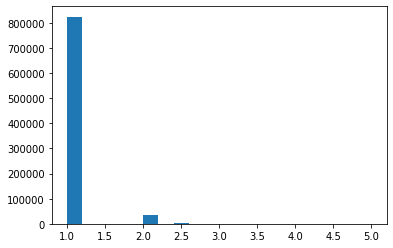

In [ ]:
# 정규화후 1~5 사이의 점수로 변환한다.
import numpy as np
uir_df['점수'] = uir_df['영수증번호'].apply(lambda x: np.log10(x)+1)
uir_df['점수'] = ((uir_df['점수'] - uir_df['점수'].min()) / 
                    (uir_df['점수'].max() - uir_df['점수'].min()) * 4) + 1
uir_df['점수'].hist(bins=20, grid=False)

In [ ]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626455 sha256=e4612005878e9e5614817b82beb8a1d57003d8a8b4c1e5344e5e6021a4e04dc1
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [ ]:
# 필요한 데이터 그룹화
#df = total.groupby(['고객번호','소분류코드','소분류명','구매일자'])['영수증번호'].nunique().reset_index()

In [ ]:
# 2015년 데이터만 추출
#df=df.query('구매일자 > 20141231 and 구매일자 <20151232')
#df

,고객번호,소분류코드,소분류명,구매일자,영수증번호
3,1,A010101,위생세제,20150327,1
4,1,A010101,위생세제,20151130,1
7,1,A010103,뷰티상품,20151230,1
8,1,A010104,일용잡화,20150327,1
11,1,A010106,단기행사,20150426,1
...,...,...,...,...,...
27742047,19383,D080204,아이섀도우,20151204,1
27742048,19383,D080204,아이섀도우,20151206,2
27742049,19383,D080205,메이크업세트,20150815,1
27742050,19383,D080302,립글로즈/틴트,20151206,2


In [ ]:
# 11월 이전 이후로 데이터 나누기
#df_year_round = df[df['구매일자'] < 20151101]
#f_year_end = df[df['구매일자'] > 20151031]

In [ ]:
#df11=df_year_round.groupby(['고객번호','소분류명'])['영수증번호'].nunique().reset_index()
#import numpy as np
#df11['점수'] = df11['영수증번호'].apply(lambda x: np.log10(x)+1)
#df11['점수'] = ((df11['점수'] - df11['점수'].min()) / 
                    #(df11['점수'].max() - df11['점수'].min()) * 4) + 1
#df11

,고객번호,소분류명,영수증번호,점수
0,1,Bag&Bag,1,1.00000
1,1,L.B,1,1.00000
2,1,L/C 아웃도어,1,1.00000
3,1,N.B,1,1.00000
4,1,VIC마켓피자,2,1.95925
...,...,...,...,...
3686159,19383,풋케어,1,1.00000
3686160,19383,하드캔디,1,1.00000
3686161,19383,핸드로션/크림,1,1.00000
3686162,19383,헤어에센스,1,1.00000


In [ ]:
#df11['점수'].max()

5.0

In [ ]:
# 모델 RMSE 평가
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df11[['고객번호', '소분류명', '점수']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

# SVD 모델학습
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()

predictions = model.test(test_data)
print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

RMSE of test dataset in SVD model:
RMSE: 0.2020


0.20202745609423575

In [ ]:
# 2015년 11월 이전 데이터를 trainset 
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['고객번호', '소분류명', '점수']], reader)
train_data = data.build_full_trainset()

# SVD 모델학습
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()


In [ ]:
# 이전에 구매하지 않았던 상품
test_data = train_data.build_anti_testset()
target_user_predictions = model.test(test_data)

In [ ]:
# 이전에 구매하지 않았던 상품 딕셔너리
new_order_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in new_order_prediction_dict:
        if stock_code in new_order_prediction_dict[customer_id]:
            pass
        else:
            new_order_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        new_order_prediction_dict[customer_id] = {}
        new_order_prediction_dict[customer_id][stock_code] = predicted_rating
                
print(str(new_order_prediction_dict)[:300] + "...")

{7: {'NB 여화': 1.0535863605832456, 'PB 계란': 1, 'PB바나나': 1.005150711640928, '가 방': 1, '가자미': 1, '가지': 1, '간장': 1, '감자스낵': 1.0621423180748613, '건강식품(홍삼)': 1.056082058504054, '건과': 1.013114916555096, '건다시마': 1, '건생선': 1.0073957107812321, '걸레/청소포': 1, '고구마': 1, '공병/공박스': 1.020817219158677, '과실주/담금주': 1, ...


In [ ]:
# 이전에 구매했었던 상품
test_data = train_data.build_testset()
target_user_predictions = model.test(test_data)

In [ ]:
# 이전에 구매했었던 상품 딕셔너리 
reorder_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in reorder_prediction_dict:
        if stock_code in reorder_prediction_dict[customer_id]:
            pass
        else:
            reorder_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        reorder_prediction_dict[customer_id] = {}
        reorder_prediction_dict[customer_id][stock_code] = predicted_rating
        
print(str(reorder_prediction_dict)[:300] + "...")

{7: {'L/C 아웃도어': 1, 'L/C골프의류': 1.3207840814898657, 'Local상추': 1, 'N/B골프의류': 1.1079894433142172, 'NB구두': 1.0244482734212492, 'NB돼지고기': 1.0304596887531814, 'OA용품': 1.0039573771280288, '가공우유': 1.001946662501806, '가정보수용품': 1, '가정용화장지': 1.0083147011375273, '간식용소시지': 1.001916002125409, '간이의자': 1, '감': 1.0...


In [ ]:
# 두 딕셔너리를 하나로 통합
total_prediction_dict = {}


for customer_id in new_order_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in new_order_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            

for customer_id in reorder_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in reorder_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            
print(str(total_prediction_dict)[:300] + "...")

{7: {'NB 여화': 1.0535863605832456, 'PB 계란': 1, 'PB바나나': 1.005150711640928, '가 방': 1, '가자미': 1, '가지': 1, '간장': 1, '감자스낵': 1.0621423180748613, '건강식품(홍삼)': 1.056082058504054, '건과': 1.013114916555096, '건다시마': 1, '건생선': 1.0073957107812321, '걸레/청소포': 1, '고구마': 1, '공병/공박스': 1.020817219158677, '과실주/담금주': 1, ...


In [ ]:
# 11월 이후의 데이터 -> 테스트로 활용
simulation_test_df = df_year_end.groupby('고객번호')['소분류명'].apply(set).reset_index()
simulation_test_df.columns = ['cus_id', 'RealOrdered']
simulation_test_df.head()

,cus_id,RealOrdered
0,7,"{에스닉푸드, 브랑제리, 단무지, 영플라자(기타), 우육, 한식델리, 두부류, 멸치..."
1,14,"{일반계란, 참기름, 브랑제리, 냉장면류, 즉석밥, 영플라자(기타), 감자스낵, 호..."
2,74,"{에스닉푸드, 주방잡화, 떡볶이, 케익류, 감자스낵, 네셔널, TGIF, 캐릭터 여..."
3,123,"{친환경열매채소, 느타리버섯, 진심한우, 메추리알, 칠레블루베리, 차별화계란, 대봉..."
4,138,"{주류, 프리미엄스낵, 디스커버리, 주방잡화, 훈제/로스트, 곤약, 한식델리, 미국..."


In [ ]:
#시뮬레이션 결과 추가
def add_predicted_stock_set(customer_id, prediction_dict):
    if customer_id in prediction_dict:
        predicted_stock_dict = prediction_dict[customer_id]
        sorted_stocks = sorted(predicted_stock_dict, key=lambda x : predicted_stock_dict[x], reverse=True)
        return sorted_stocks
    else:
        return None

# 상품 추천 시뮬레이션 결과를 추가
simulation_test_df['PredictedOrder(New)'] = simulation_test_df['cus_id']. \
                                            apply(lambda x: add_predicted_stock_set(x, new_order_prediction_dict))
simulation_test_df['PredictedOrder(Reorder)'] = simulation_test_df['cus_id']. \
                                            apply(lambda x: add_predicted_stock_set(x, reorder_prediction_dict))
simulation_test_df['PredictedOrder(Total)'] = simulation_test_df['cus_id']. \
                                            apply(lambda x: add_predicted_stock_set(x, total_prediction_dict))
simulation_test_df.head()                            

,cus_id,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total)
0,7,"{에스닉푸드, 브랑제리, 단무지, 영플라자(기타), 우육, 한식델리, 두부류, 멸치...","[색조 화장품, 바버 상품군, 유원시설, 커피용품, 컨템포러리, 스넥(부대), 헤지...","[기초 화장품, 수입식품, 일식델리, 수입주방, 직수입 골프의류, 청과, 서양델리,...","[기초 화장품, 색조 화장품, 수입식품, 바버 상품군, 일식델리, 유원시설, 수입주..."
1,14,"{일반계란, 참기름, 브랑제리, 냉장면류, 즉석밥, 영플라자(기타), 감자스낵, 호...","[커피용품, 바버 상품군, 유원시설, 수입주방, 생필(부대), 헤지스골프, 스포츠의...","[직수입 골프의류, 수입식품, 청과, 기초 화장품, L/C 아웃도어, 유제품, 일식...","[직수입 골프의류, 수입식품, 커피용품, 청과, 바버 상품군, 유원시설, 기초 화장..."
2,74,"{에스닉푸드, 주방잡화, 떡볶이, 케익류, 감자스낵, 네셔널, TGIF, 캐릭터 여...","[L/C골프의류, 유원시설, 직수입 골프의류, 생필(부대), 영플라자(기타), N/...","[기초 화장품, 수입식품, 수입주방, 유기농채소, 캐릭터 여화, 욕실용품, 제과제빵...","[L/C골프의류, 유원시설, 기초 화장품, 직수입 골프의류, 생필(부대), 영플라자..."
3,123,"{친환경열매채소, 느타리버섯, 진심한우, 메추리알, 칠레블루베리, 차별화계란, 대봉...","[L/C 아웃도어, 유원시설, 커피용품, 바버 상품군, 남성용클렌저, 헤지스골프, ...","[기초 화장품, 다이소, 일반화장품, 일반스낵, 감자스낵, 여성화장품, 유아브랜드,...","[L/C 아웃도어, 유원시설, 커피용품, 바버 상품군, 기초 화장품, 남성용클렌저,..."
4,138,"{주류, 프리미엄스낵, 디스커버리, 주방잡화, 훈제/로스트, 곤약, 한식델리, 미국...","[커피용품, 바버 상품군, 나이키골프, 시리즈, 수영복, 수입도자기, 에어컨, PA...","[L/C 아웃도어, 스포츠의류, 일식델리, 스포츠화, 수입주방, 직수입 골프의류, ...","[L/C 아웃도어, 스포츠의류, 일식델리, 커피용품, 스포츠화, 바버 상품군, 나이..."


In [ ]:
# 구매 예측의 상위 k개의 recall(재현율)
def calculate_recall(real_order, predicted_order, k):
    # 만약 추천 대상 상품이 없다면, 11월 이후에 상품을 처음 구매하는 고객
    if predicted_order is None:
        return None
    
    # SVD 모델에서 현재 유저의 Rating이 높은 상위 k개의 상품을 "구매 할 것으로 예측"
    predicted = predicted_order[:k]
    true_positive = 0
    for stock_code in predicted:
        if stock_code in real_order:
            true_positive += 1
    
    # 예측한 상품 중, 실제로 유저가 구매한 상품의 비율 계산
    recall = true_positive / len(predicted)
    return recall

In [ ]:
# 시뮬레이션 대상 유저에게 상품을 추천해준 결과를 평가
simulation_test_df['top_k_recall(Reorder)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Reorder)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(New)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(New)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(Total)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Total)'], 
                                                                                 5), axis=1)

In [ ]:
# 평가 결과
print(simulation_test_df['top_k_recall(Reorder)'].mean())
print(simulation_test_df['top_k_recall(New)'].mean())
print(simulation_test_df['top_k_recall(Total)'].mean())

0.4817548746518106
0.012186629526462395
0.1634401114206128


* 재주문 평균재현도 47%, 이전에 구매하지 않은 상품 1%


In [ ]:
simulation_test_df

,cus_id,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total),top_k_recall(Reorder),top_k_recall(New),top_k_recall(Total)
0,7,"{에스닉푸드, 브랑제리, 단무지, 영플라자(기타), 우육, 한식델리, 두부류, 멸치...","[색조 화장품, 바버 상품군, 유원시설, 커피용품, 컨템포러리, 스넥(부대), 헤지...","[기초 화장품, 수입식품, 일식델리, 수입주방, 직수입 골프의류, 청과, 서양델리,...","[기초 화장품, 색조 화장품, 수입식품, 바버 상품군, 일식델리, 유원시설, 수입주...",0.4,0.0,0.2
1,14,"{일반계란, 참기름, 브랑제리, 냉장면류, 즉석밥, 영플라자(기타), 감자스낵, 호...","[커피용품, 바버 상품군, 유원시설, 수입주방, 생필(부대), 헤지스골프, 스포츠의...","[직수입 골프의류, 수입식품, 청과, 기초 화장품, L/C 아웃도어, 유제품, 일식...","[직수입 골프의류, 수입식품, 커피용품, 청과, 바버 상품군, 유원시설, 기초 화장...",0.4,0.0,0.4
2,74,"{에스닉푸드, 주방잡화, 떡볶이, 케익류, 감자스낵, 네셔널, TGIF, 캐릭터 여...","[L/C골프의류, 유원시설, 직수입 골프의류, 생필(부대), 영플라자(기타), N/...","[기초 화장품, 수입식품, 수입주방, 유기농채소, 캐릭터 여화, 욕실용품, 제과제빵...","[L/C골프의류, 유원시설, 기초 화장품, 직수입 골프의류, 생필(부대), 영플라자...",0.8,0.0,0.2
3,123,"{친환경열매채소, 느타리버섯, 진심한우, 메추리알, 칠레블루베리, 차별화계란, 대봉...","[L/C 아웃도어, 유원시설, 커피용품, 바버 상품군, 남성용클렌저, 헤지스골프, ...","[기초 화장품, 다이소, 일반화장품, 일반스낵, 감자스낵, 여성화장품, 유아브랜드,...","[L/C 아웃도어, 유원시설, 커피용품, 바버 상품군, 기초 화장품, 남성용클렌저,...",0.6,0.0,0.0
4,138,"{주류, 프리미엄스낵, 디스커버리, 주방잡화, 훈제/로스트, 곤약, 한식델리, 미국...","[커피용품, 바버 상품군, 나이키골프, 시리즈, 수영복, 수입도자기, 에어컨, PA...","[L/C 아웃도어, 스포츠의류, 일식델리, 스포츠화, 수입주방, 직수입 골프의류, ...","[L/C 아웃도어, 스포츠의류, 일식델리, 커피용품, 스포츠화, 바버 상품군, 나이...",0.6,0.0,0.6
...,...,...,...,...,...,...,...,...
2867,19268,"{남성용스킨케어류, 헤어에센스, 캐릭터 여화, 커피음료, 밥류, 일반비타민, 건강보...","[정육세트, 유원시설, 남성용클렌저, 스넥(부대), 청과세트, 컨템포러리, 커피용품...","[일반스낵, 다이소, 커피음료, 냉장커피차음료, 국산맥주, 아이섀도우, 생수, 남성...","[정육세트, 유원시설, 남성용클렌저, 스넥(부대), 청과세트, 컨템포러리, 커피용품...",0.2,0.0,0.0
2868,19289,"{파리모기살충제, 냉장커피음료, 식빵, 소스, 케찹, NB돼지고기, 양배추, 즉석도...","[L/C 아웃도어, 커피용품, 바버 상품군, 색조 화장품, 유기농채소, 컨템포러리,...","[기초 화장품, 유원시설, 디저트류, 서양델리, 욕실용품, 종량제봉투, 일반화장품,...","[기초 화장품, L/C 아웃도어, 커피용품, 바버 상품군, 색조 화장품, 유기농채소...",0.0,0.0,0.0
2869,19293,"{하루견과, 소스, 식기세제, 호주산곡물비육, 연근, 건강미용차, 사이다, 냉장떡,...","[유기농채소, 유원시설, 직수입 골프의류, 기초 화장품, 커피용품, L/C 아웃도어...","[일반화장품, 여성화장품, 종량제봉투, 재사용봉투, 다이소, 중저가화장품기타, 여성...","[유기농채소, 유원시설, 직수입 골프의류, 기초 화장품, 커피용품, L/C 아웃도어...",0.8,0.0,0.0
2870,19304,"{에스닉푸드, 브랑제리, 주방잡화, 수입도자기, 우육, 식당가 레스토랑, 수입식품,...","[지방스넥(부대), 생필(부대), 유원시설, 수영복, 스넥(부대), 바버 상품군, ...","[기초 화장품, 유기농채소, 일식델리, 디저트류, 한식델리, 색조 화장품, 전문베이...","[기초 화장품, 지방스넥(부대), 유기농채소, 일식델리, 디저트류, 한식델리, 색조...",0.6,0.0,0.6


In [ ]:
# 추천 시뮬레이션 결과
k = 5
result_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].notnull()]
result_df['PredictedOrder(Reorder)'] = result_df['PredictedOrder(Reorder)'].\
                                        apply(lambda x: x[:k])
result_df = result_df[['cus_id', 'RealOrdered', 'PredictedOrder(Reorder)', 'top_k_recall(Reorder)']]

result_df=result_df.rename({"cus_id":"고객번호","RealOrdered":"실제주문","PredictedOrder(Reorder)":"추천주문5개","top_k_recall(Reorder)":"재현도"},axis=1)

result_df.sample(5).head()

,고객번호,실제주문,추천주문5개,재현도
518,4122,"{안주류, 캐릭터 여화, 수입식품, 뷰티상품, 건생선, 건강식품(비타민), 색조 화...","[기초 화장품, 색조 화장품, 일식델리, 수입주방, 서양델리]",0.6
2350,14679,"{즉석밥, 훈제/로스트, 모장갑, 롤티슈, 사이다, 냉장떡, 미국청포도, 치킨, 감...","[얼음, 파우치/즉석음료, 일반스낵, 종량제봉투, 일반우유]",0.6
1114,7380,"{친환경양념채소, 냉장면류, 깻잎, 탄산수, 도어락, 표고버섯, 소스, 감자스낵, ...","[유기농채소, 청과, 일반화장품, 유제품, 일식델리]",0.4
1766,10683,"{헤지스골프, 건과일, 캐주얼화, 마시는요구르트, 기능성껌, 감자스낵, 굴비류, 일...","[기초 화장품, 수입주방, L/C 아웃도어, 색조 화장품, 스포츠의류]",0.0
413,3456,"{냉장면류, 느타리버섯, 컵, 소스, 한우규격, 유부, 냉동식사HMR, 덴탈식품, ...","[L/C 아웃도어, 생필(부대), 색조 화장품, 일반화장품, 종량제봉투]",0.4


In [ ]:
result_df[result_df['고객번호'] == 14322]['추천주문5개']

6964    [일반화장품, 재사용봉투, 다이소, 일반스낵, 커피음료]
Name: 추천주문5개, dtype: object

In [ ]:
simulation_test_df.columns

Index(['cus_id', 'RealOrdered', 'PredictedOrder(New)',
       'PredictedOrder(Reorder)', 'PredictedOrder(Total)',
       'top_k_recall(Reorder)', 'top_k_recall(New)', 'top_k_recall(Total)'],
      dtype='object')

In [ ]:
result_df.columns

Index(['고객번호', '실제주문', '추천주문5개', '재현도'], dtype='object')

In [ ]:
product = pd.read_csv('/content/drive/MyDrive/lmemdata/상품분류.txt',sep = ",",  engine='python', encoding = "cp949")

## 재구매 상품 추천함수

In [ ]:
def find_sim_cus(df,cus_id,top_n):
  df11=df.iloc[:,:10]
  df11.reset_index(inplace=True,drop=True)
  
  simil=cosine_similarity(df11.iloc[:,1:],df11.iloc[:,1:])
  sim_sorted_ind = simil.argsort()[:,::-1]


  user_id = df[df['고객번호']==cus_id]

  user_id_index = user_id.index.values
  similar_indexes = sim_sorted_ind[user_id_index,:(top_n)]

  #print(similar_indexes)
  similar_indexes = similar_indexes.reshape(-1)

  return df.iloc[similar_indexes]

In [ ]:
def get_unpurchase(df,product,userid,select):
  # 입력값으로 들어온 고객번호에 해당하는 고객이 구매한 모든 상품을 리스트로 생성
  buy = df[df['고객번호']==userid]['소분류명'].tolist()

  # 모든 상품을 리스트로 생성
  total_product = product['소분류명'].tolist()

  # 모든 상품의 소분류명중 구매한 소분류를 제외루 리스트로 생성
  unbuy = [product for product in total_product if product not in buy]

  # 그동안 많이구매한상품 best 5 와 장바구니 비교해서 추천
  top_5 = df[df['고객번호']==userid]
  top_5 = top_5.sort_values(by=['점수'],ascending=False).head()
  top_5 = top_5['소분류명'].tolist()
  top_5_set = set(top_5)
  select_set = set(select)
  recommend=top_5_set.difference(select_set)


  # 유사고객이 많이구매한상품 best 10
  result=find_sim_cus(predict2,userid,5)
  result=result[~result['고객번호'].isin([userid])]
  similar_cus=result['고객번호'].reset_index(drop=True)
  similar_customer=similar_cus.loc[1]
  similar_top_10 = df[df['고객번호']==similar_customer]
  similar_top_10 = similar_top_10.sort_values(by=['점수'],ascending=False).head(10)
  similar_top_10 = similar_top_10['소분류명'].tolist()
  similar_top_10_set = set(similar_top_10)

  # 그동안 많이구매한상품 best 10
  top_10 = df[df['고객번호']==userid]
  top_10 = top_10.sort_values(by=['점수'],ascending=False).head(10)
  top_10 = top_10['소분류명'].tolist()
  top_10_set = set(top_10)
  
  # 유사고객과 비교해서 구매하지 않은 상품
  recommend2 = similar_top_10_set.difference(top_10_set)

  


  print('구매한 상품수:',len(buy),'추천대상 상품수',len(unbuy),'전체 상품수',len(total_product))
  print()
  #print('구매한 상품:',buy)
  print('장바구니에 담은 상품',select)
  print()
  #print('구매기록이없는 상품:',unbuy)
  #print()
  #print('전체 상품:',total_product)
  #print()
  print('추천상품:',recommend)
  print()
  print('추천상품2:',recommend2)
  return result
unbuy_product = get_unpurchase(df=df2,product=product,userid=19307,select=['고추','일반두유','일반스낵'])

구매한 상품수: 305 추천대상 상품수 3848 전체 상품수 4386

장바구니에 담은 상품 ['고추', '일반두유', '일반스낵']

추천상품: {'냉장치킨족발류', '콘아이스크림', '즉석밥'}

추천상품2: {'일반란', '미곡류', '인스턴트커피', '펫가공유', '호주산목초비육', '일반화장품', '여성화장품', '종량제봉투', '냉장음료', '감자스낵'}


In [ ]:
df2=df.groupby(['고객번호','소분류명'])['영수증번호'].nunique().reset_index()
# 정규화후 1~5 사이의 점수로 변환한다.
import numpy as np
df2['점수'] = df2['영수증번호'].apply(lambda x: np.log10(x)+1)
df2['점수'] = ((df2['점수'] - df2['점수'].min()) / 
                    (df2['점수'].max() - df2['점수'].min()) * 4) + 1
df2

,고객번호,소분류명,영수증번호,점수
0,1,Bag&Bag,1,1.000000
1,1,L/C 아웃도어,1,1.000000
2,1,PB바나나,1,1.000000
3,1,VIC피자,1,1.000000
4,1,가공우유,1,1.000000
...,...,...,...,...
5368045,19383,하드캔디,2,1.910681
5368046,19383,핸드로션/크림,1,1.000000
5368047,19383,핸드워시/손세정제,1,1.000000
5368048,19383,헤어에센스,1,1.000000


In [ ]:
df3 = df2.groupby('고객번호')['소분류명'].apply(list).reset_index()
df3

,고객번호,소분류명
0,1,"[Bag&Bag, L/C 아웃도어, VIC피자, 가공우유, 가방, 간편과일, 감자스..."
1,2,"[L/C골프의류, N/B골프의류, 가방, 건강식품, 건강식품(비타민), 건과, 건생..."
2,7,"[N/B골프의류, 가공우유, 가정용화장지, 가지, 간식용소시지, 감자, 건전지, 건..."
3,8,"[L/C 아웃도어, 가공행사, 건강식품, 건강식품(비타민), 건강식품(홍삼), 건과..."
4,10,"[Local깻잎, Local부추, Local상추, Local시금치, NB돼지고기, ..."
...,...,...
8651,19307,"[가공우유, 가공조미료, 가지, 각티슈/미용티슈, 간장, 감, 감자, 감자스낵, 갓..."
8652,19314,"[PECK Restaurant, 건강식품(비타민), 건강식품(홍삼), 건과, 공병,..."
8653,19325,"[L/C골프의류, Local상추, 간식용소시지, 감자, 감자스낵, 고구마, 고추, ..."
8654,19327,"[가공우유, 각티슈/미용티슈, 간장, 건오징어, 건홍합, 고등어, 골뱅이통조림, 과..."


## 유사고객 찾기

In [ ]:
predict = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/prediction1.csv',index_col=0)

In [ ]:
predict2=predict.iloc[:,:10]
predict2.reset_index(inplace=True,drop=True)

In [ ]:
predict=predict.reset_index()

In [ ]:
predict2.reset_index(inplace=True,drop=True)

In [ ]:
predict2

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M
0,1,0,1,6,0,3,0,1,5,5
1,2,0,2,6,0,3,0,2,4,5
2,7,1,1,6,0,1,1,2,2,5
3,10,1,1,6,0,0,0,3,5,3
4,11,0,2,6,1,1,0,4,3,5
...,...,...,...,...,...,...,...,...,...,...
9019,19314,1,1,4,1,0,0,1,3,5
9020,19325,1,12,4,0,0,0,2,3,3
9021,19327,0,1,5,1,0,0,1,5,1
9022,19333,1,0,2,1,0,1,2,4,1


In [ ]:
predict2=predict2[predict2['고객번호'].isin(cus_id)]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
simil=cosine_similarity(predict2.iloc[:,1:],predict2.iloc[:,1:])

In [ ]:
simil2=pd.DataFrame(simil)
simil2

,0,1,2,3,4,5,6,7,8,9,...,9014,9015,9016,9017,9018,9019,9020,9021,9022,9023
0,1.000000,0.984415,0.915047,0.902530,0.899786,0.930580,0.922292,0.908452,0.897345,0.845996,...,0.539499,0.554297,0.855066,0.918241,0.783357,0.911929,0.510385,0.856661,0.748341,0.672757
1,0.984415,1.000000,0.941606,0.905359,0.946291,0.922806,0.936894,0.946497,0.934059,0.886245,...,0.638017,0.636517,0.901589,0.947824,0.843504,0.912331,0.602334,0.828116,0.721205,0.740359
2,0.915047,0.941606,1.000000,0.897315,0.951786,0.932227,0.919801,0.980064,0.957768,0.959960,...,0.566200,0.541719,0.885841,0.853610,0.812693,0.939710,0.536420,0.764510,0.685680,0.594551
3,0.902530,0.905359,0.897315,1.000000,0.926731,0.981981,0.986600,0.904918,0.921364,0.853461,...,0.484643,0.606577,0.900181,0.875190,0.685793,0.892098,0.550309,0.937459,0.881917,0.601238
4,0.899786,0.946291,0.951786,0.926731,1.000000,0.921407,0.957664,0.980648,0.955533,0.909400,...,0.620110,0.668145,0.955792,0.882034,0.852624,0.922195,0.616553,0.808694,0.748705,0.679284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9019,0.911929,0.912331,0.939710,0.892098,0.922195,0.935414,0.902778,0.920976,0.950262,0.903540,...,0.550395,0.597552,0.870388,0.793988,0.776927,1.000000,0.553274,0.796296,0.745800,0.601113
9020,0.510385,0.602334,0.536420,0.550309,0.616553,0.548458,0.543214,0.534205,0.717835,0.635174,...,0.967297,0.973797,0.606770,0.646959,0.479070,0.553274,1.000000,0.523095,0.391159,0.922457
9021,0.856661,0.828116,0.764510,0.937459,0.808694,0.920566,0.888889,0.764878,0.816632,0.744092,...,0.442475,0.597552,0.754337,0.813838,0.503953,0.796296,0.523095,1.000000,0.874386,0.616141
9022,0.748341,0.721205,0.685680,0.881917,0.748705,0.866025,0.867956,0.672010,0.701068,0.565878,...,0.269771,0.515845,0.805823,0.744279,0.583212,0.745800,0.391159,0.874386,1.000000,0.480001


In [ ]:
def find_sim_cus(df,cus_id,top_n):
  
  simil=cosine_similarity(df.iloc[:,1:],df.iloc[:,1:])
  sim_sorted_ind = simil.argsort()[:,::-1]


  user_id = df[df['고객번호']==cus_id]

  user_id_index = user_id.index.values
  similar_indexes = sim_sorted_ind[user_id_index,:(top_n)]

  #print(similar_indexes)
  similar_indexes = similar_indexes.reshape(-1)

  return df.iloc[similar_indexes]

In [ ]:
sim_sorted_ind = simil.argsort()[:,::-1]

In [ ]:
result=find_sim_cus(predict2,sim_sorted_ind,1,5)

In [ ]:
similar_cus=result['고객번호'].reset_index(drop=True)
similar_customer=similar_cus.loc[1]

In [ ]:
similar_customer

559

In [ ]:
result=result[~result['고객번호'].isin([10])]

In [ ]:
similar_cus=result['고객번호'].reset_index(drop=True)
similar_customer=similar_cus.loc[0]

In [ ]:
similar_customer

15259

In [ ]:
result

,고객번호,성별,거주지역,연령대,멤버십유무,경쟁사이용,온라인유무,Recency_R,구매횟수_F,구매금액_M
0,1,0,1,6,0,3,0,1,5,5
271,559,0,1,6,0,3,0,1,4,5
5747,11966,0,1,5,0,3,0,1,4,5
1486,2916,0,1,5,0,3,0,1,5,4
124,268,1,1,6,0,3,0,1,5,5


In [ ]:
total1

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
0,1,101,A010101,일용잡화,위생세제,일상용품,2757986,15148,10,20140920,20,1000,1,5,2.0,2014,저가,3,A
1,1,101,A010101,일용잡화,위생세제,일상용품,1878938,15148,10,20140505,19,15000,1,5,2.0,2014,저가,2,A
2,1,101,A010101,일용잡화,위생세제,일상용품,3436437,15148,10,20150102,16,9900,1,5,2.0,2015,저가,5,A
3,1,101,A010103,일용잡화,뷰티상품,일상용품,1385676,15148,10,20140215,17,7000,1,5,2.0,2014,저가,1,A
4,1,101,A010103,일용잡화,뷰티상품,일상용품,1547466,15148,10,20140315,19,21000,1,5,2.0,2014,중가,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25587852,8,802,D080204,아이메이크업,아이섀도우,일상용품,229784,18799,24,20150805,15,9900,1,2,1.0,2015,저가,7,D
25587853,8,803,D080301,립메이크업,립스틱/립라이너,일상용품,230365,18799,24,20151203,16,11200,1,2,1.0,2015,저가,8,D
25587854,8,803,D080302,립메이크업,립글로즈/틴트,일상용품,229653,18799,24,20150618,16,7200,1,2,1.0,2015,저가,6,D
25587855,8,803,D080302,립메이크업,립글로즈/틴트,일상용품,229670,18799,24,20150625,14,9000,1,2,1.0,2015,저가,6,D


In [ ]:
predict=predict.reset_index()

In [ ]:
predict=predict[predict['온라인유무']==1]

In [ ]:
predict=predict[predict['Label']==0]

In [ ]:
predict=predict['고객번호'].tolist()

In [ ]:
total2=total1[total1['고객번호'].isin(predict)]

In [ ]:
total2.reset_index(inplace=True,drop=True)
total2

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
0,1,101,A010101,일용잡화,위생세제,일상용품,2757988,2043,10,20140920,13,3950,1,5,2.0,2014,저가,3,A
1,1,101,A010101,일용잡화,위생세제,일상용품,2574375,2043,10,20140821,14,9400,1,5,2.0,2014,저가,3,A
2,1,101,A010101,일용잡화,위생세제,일상용품,1951719,2043,10,20140516,14,1000,1,5,2.0,2014,저가,2,A
3,1,101,A010101,일용잡화,위생세제,일상용품,2274939,2043,10,20140704,14,10600,1,5,2.0,2014,저가,3,A
4,1,101,A010101,일용잡화,위생세제,일상용품,2548153,2043,10,20140816,14,5000,1,5,2.0,2014,저가,3,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895435,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,773311,8477,44,20150719,13,1000,1,3,12.0,2015,저가,7,C
3895436,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,774134,8477,44,20150904,9,1500,1,3,12.0,2015,저가,7,C
3895437,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,773081,8477,44,20150706,10,2000,1,3,12.0,2015,저가,7,C
3895438,17,1707,C170701,가정잡화,생활잡화균일가,일상용품,774555,8477,44,20150928,19,2000,1,3,12.0,2015,저가,7,C


In [ ]:
total2['구매금액'].sum()

60015924435

In [ ]:
len(total2['고객번호'].unique())

2873

In [ ]:
60015924435/2873

20889636.07205012

In [ ]:
total1

,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,성별,연령대,거주지역,년도,분류,분기,제휴사
0,1,101,A010101,일용잡화,위생세제,일상용품,2757986,15148,10,20140920,20,1000,1,5,2.0,2014,저가,3,A
1,1,101,A010101,일용잡화,위생세제,일상용품,1878938,15148,10,20140505,19,15000,1,5,2.0,2014,저가,2,A
2,1,101,A010101,일용잡화,위생세제,일상용품,3436437,15148,10,20150102,16,9900,1,5,2.0,2015,저가,5,A
3,1,101,A010103,일용잡화,뷰티상품,일상용품,1385676,15148,10,20140215,17,7000,1,5,2.0,2014,저가,1,A
4,1,101,A010103,일용잡화,뷰티상품,일상용품,1547466,15148,10,20140315,19,21000,1,5,2.0,2014,중가,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25587852,8,802,D080204,아이메이크업,아이섀도우,일상용품,229784,18799,24,20150805,15,9900,1,2,1.0,2015,저가,7,D
25587853,8,803,D080301,립메이크업,립스틱/립라이너,일상용품,230365,18799,24,20151203,16,11200,1,2,1.0,2015,저가,8,D
25587854,8,803,D080302,립메이크업,립글로즈/틴트,일상용품,229653,18799,24,20150618,16,7200,1,2,1.0,2015,저가,6,D
25587855,8,803,D080302,립메이크업,립글로즈/틴트,일상용품,229670,18799,24,20150625,14,9000,1,2,1.0,2015,저가,6,D


In [ ]:
# 필요한 데이터 그룹화
df = total2.groupby(['고객번호','소분류코드','소분류명','구매일자'])['영수증번호'].nunique().reset_index()

In [ ]:
df

,고객번호,소분류코드,소분류명,구매일자,영수증번호
0,7,A010101,위생세제,20151105,1
1,7,A010103,뷰티상품,20141201,1
2,7,A010201,우육,20141030,1
3,7,A010201,우육,20150114,1
4,7,A010201,우육,20150308,1
...,...,...,...,...,...
3808660,19333,D040109,쿠키,20150925,1
3808661,19333,D040201,생수,20150424,1
3808662,19333,D040201,생수,20151112,1
3808663,19333,D040209,기타기능성음료,20150123,1


추천 전체 16%

In [ ]:
total2['구매금액'].sum()

60015924435

In [ ]:
60015924435/3895440

15406.71257547286

In [ ]:
3895440*1.16

4518710.399999999

In [ ]:
4518710*15406

69615246260

In [ ]:
69615246260/60015924435

1.1599462461899843